In [1]:
# @title Set up magic commands
%load_ext autoreload
%autoreload 2
%matplotlib inline


In [110]:
import re

import torch
import gym
import numpy as np
import matplotlib.pyplot as plt

import render
import utils


RENDER_RGB = 'rgb_array'
RENDER_HUMAN = 'human'
RENDER_ANSI = 'ansi'

RENDER_MODE = {
  'CartPole-v0': RENDER_RGB,
  'FrozenLake-v0': RENDER_ANSI,
}

ENV = 'FrozenLake-v0'

def examine_env():
  env = gym.make('FrozenLake-v0')
  env.reset()
  frame = env.render(mode='human')
  env.render(close=True)
  obs, reward, done, info = env.step(0)
  print(env.observation_space)
  #help(env.observation_space)
examine_env()


[2017-09-10 23:46:27,417] Making new env: FrozenLake-v0



SFFF
FHFH
FFFH
HFFG
Discrete(16)


[2017-09-10 23:46:10,206] Making new env: FrozenLake-v0


1000 smoothed: 0.19938495229580824
2000 smoothed: 0.17724233680523127
3000 smoothed: 0.42681368792089625
4000 smoothed: 0.44728898513521204


[2017-09-10 23:46:15,661] Making new env: FrozenLake-v0


[[ 1.  3.  0.  3.]
 [ 0.  0.  2.  0.]
 [ 3.  1.  0.  0.]
 [ 0.  2.  1.  0.]]



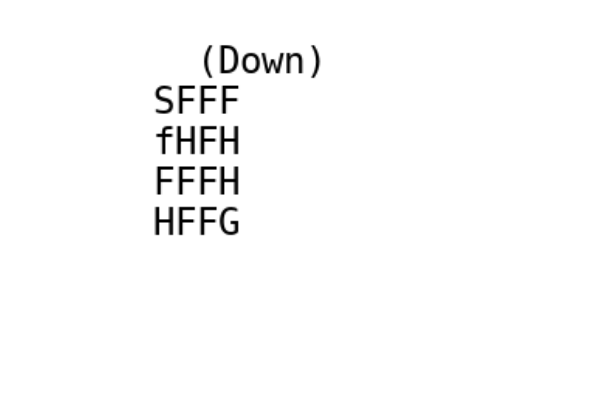
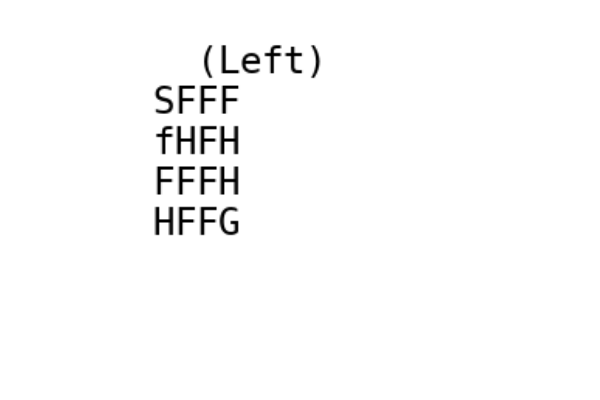
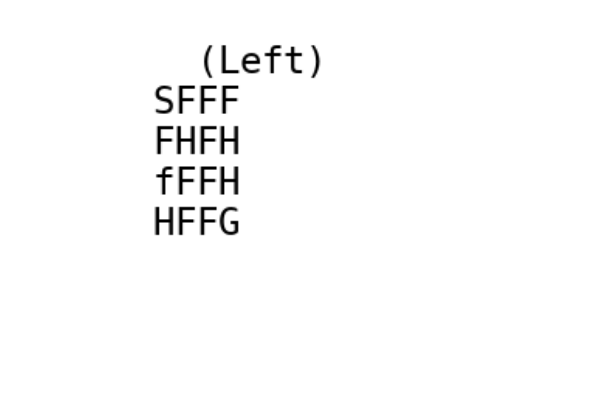
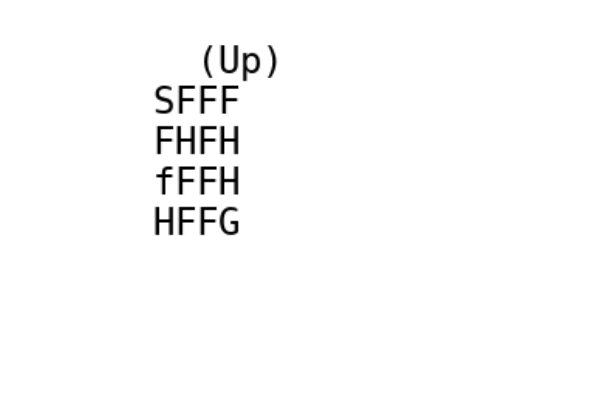
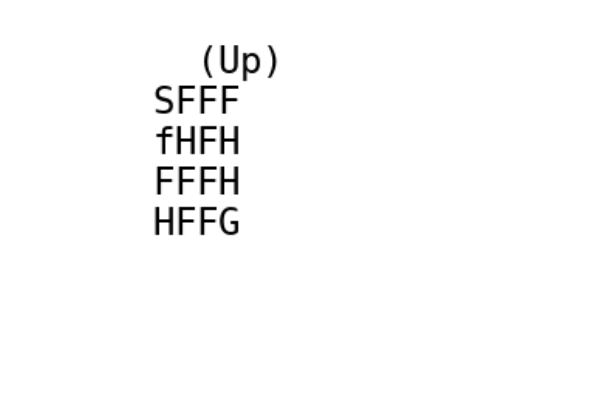
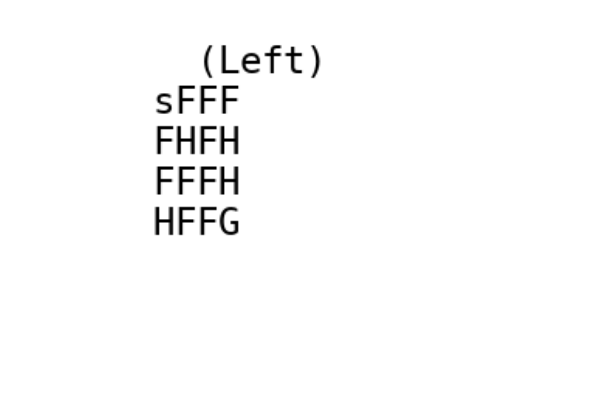
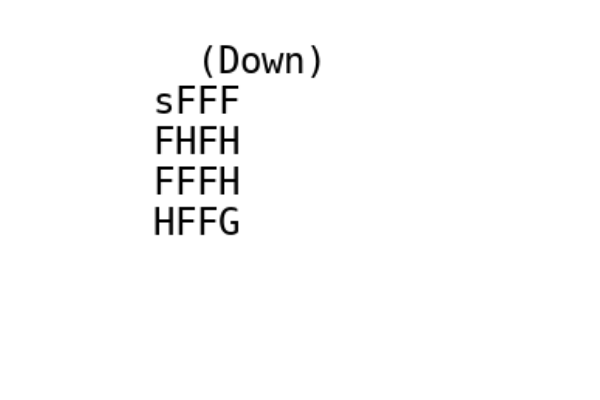
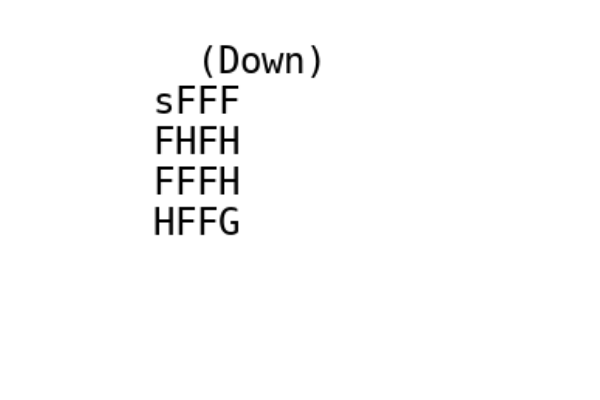
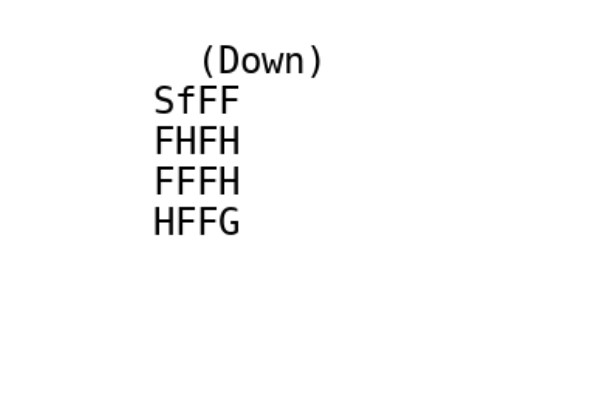
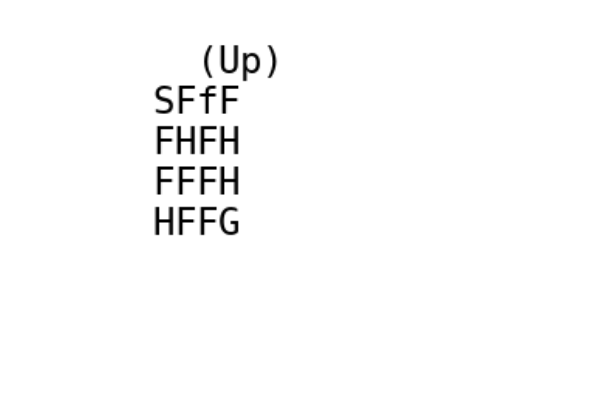
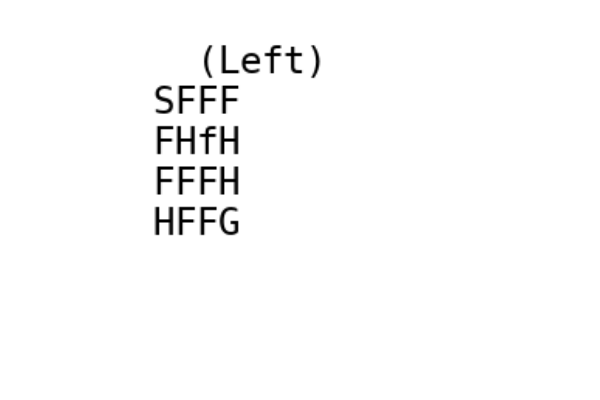
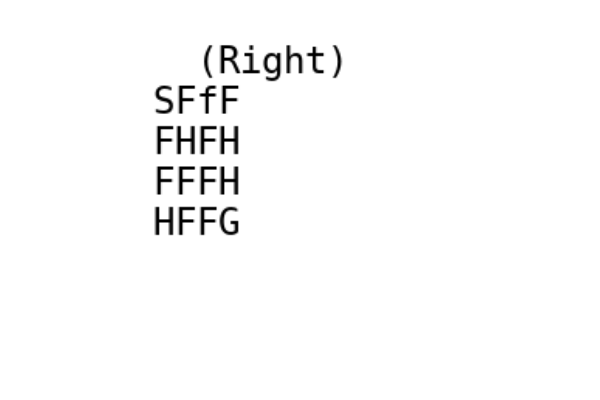
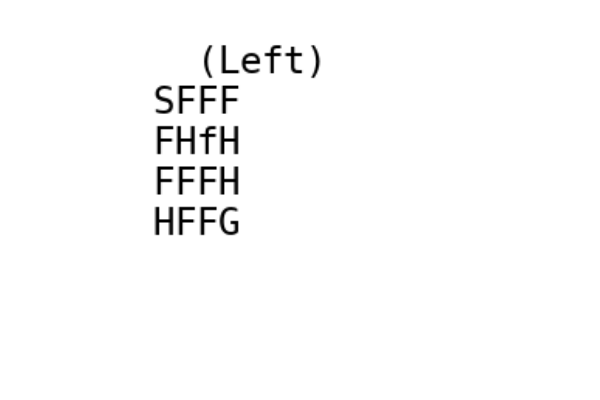
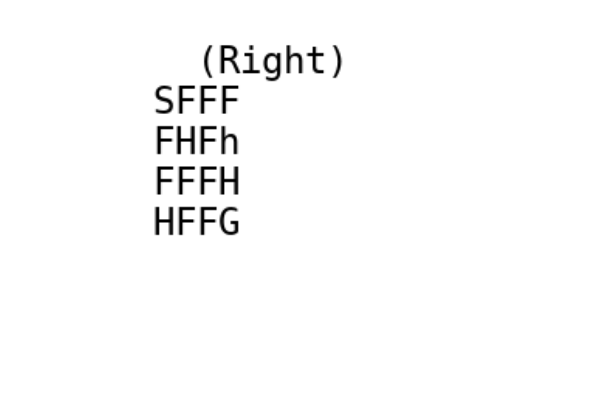
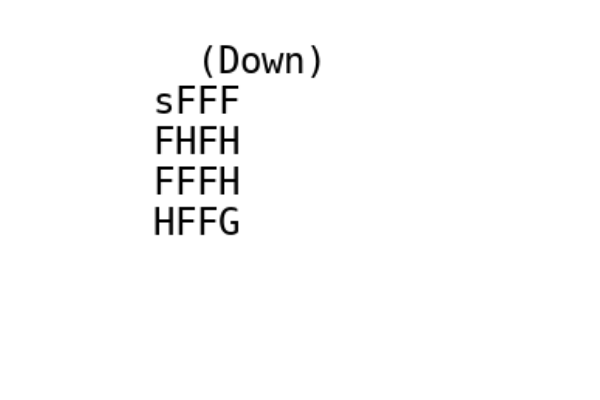
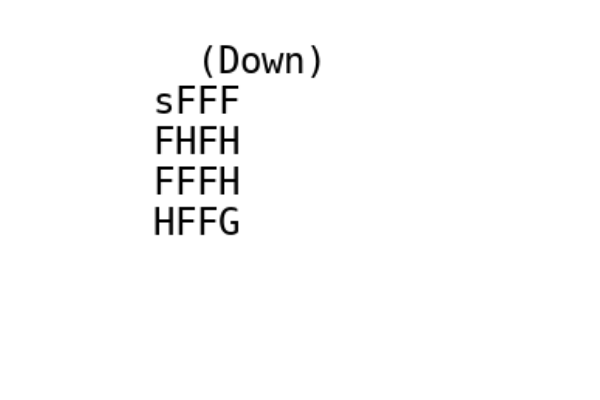
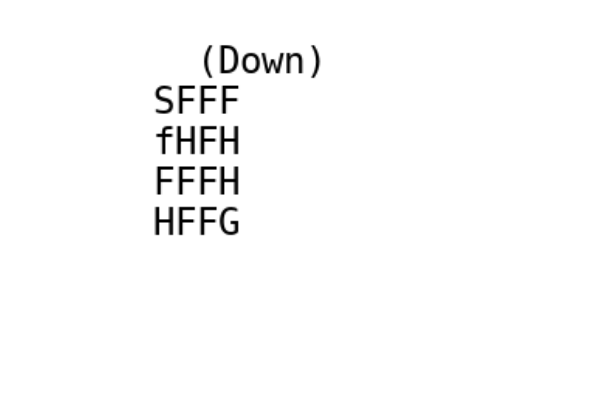
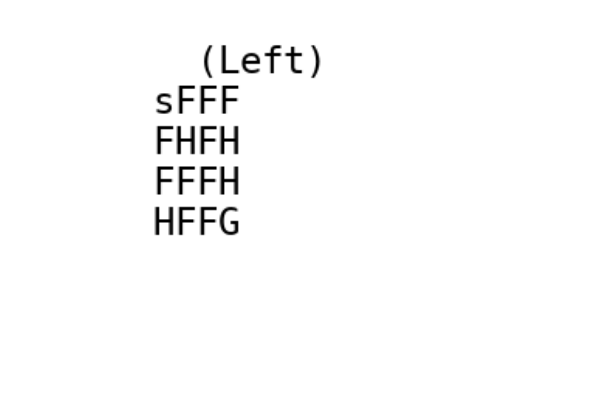
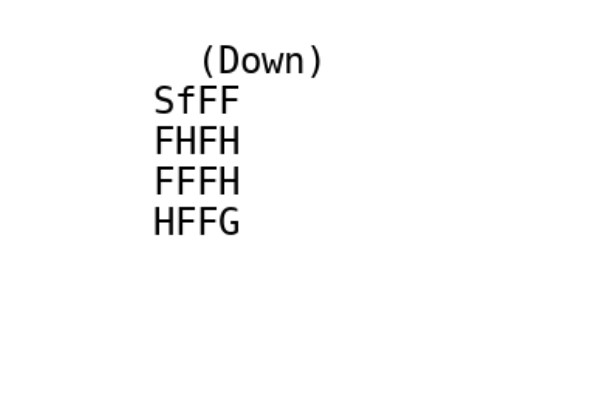
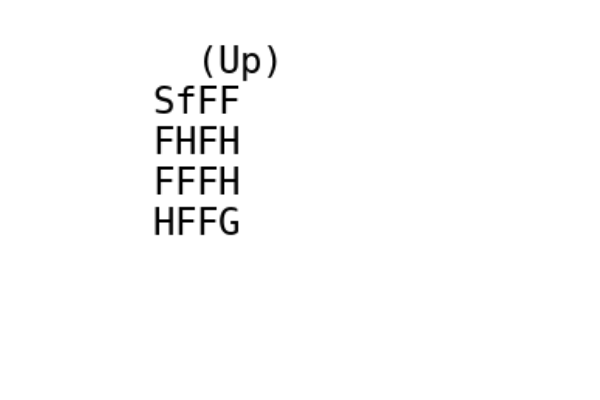
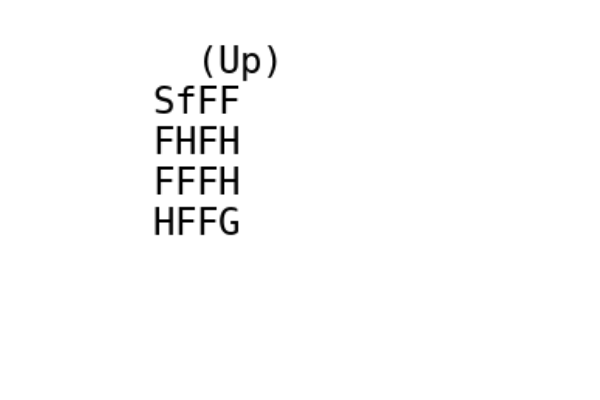
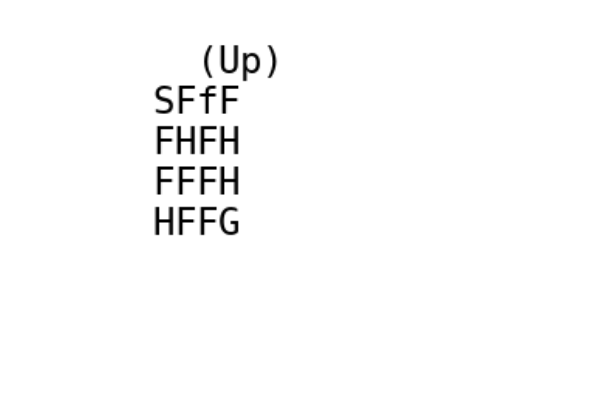
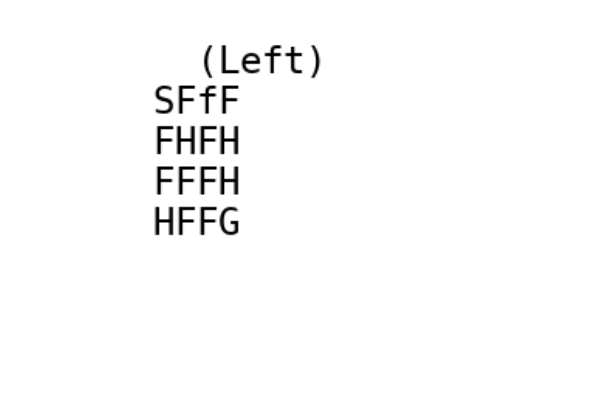
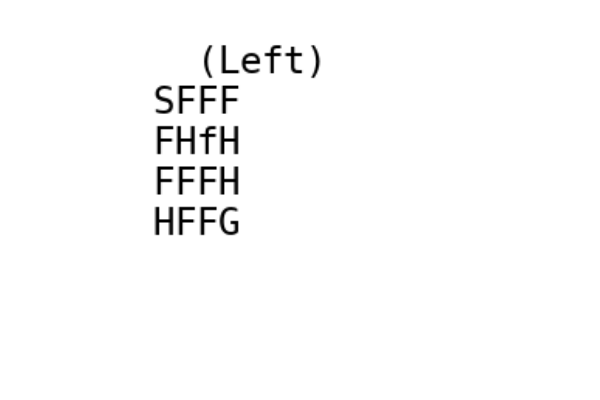
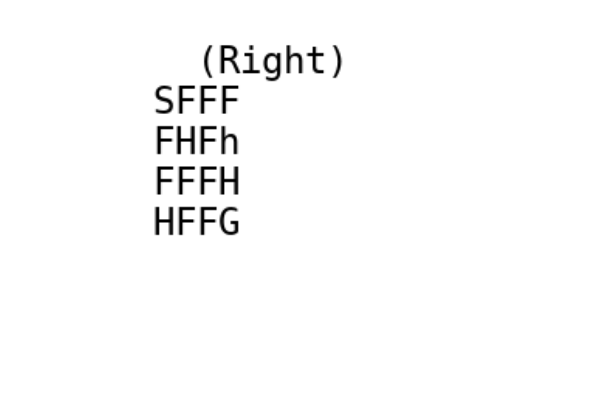
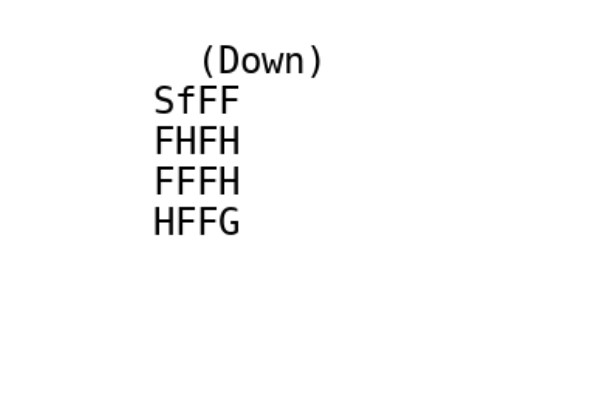
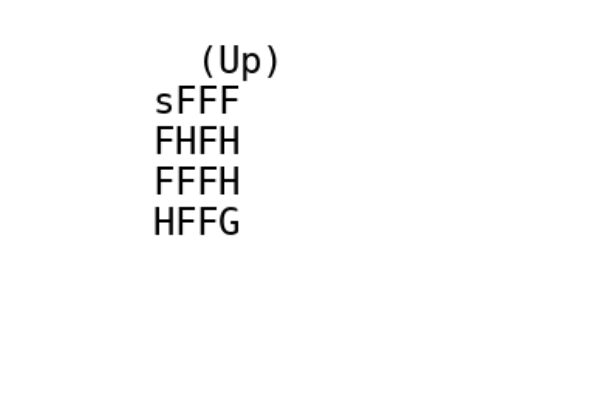
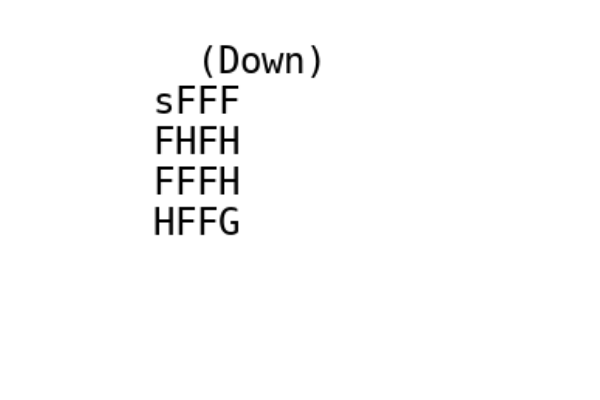
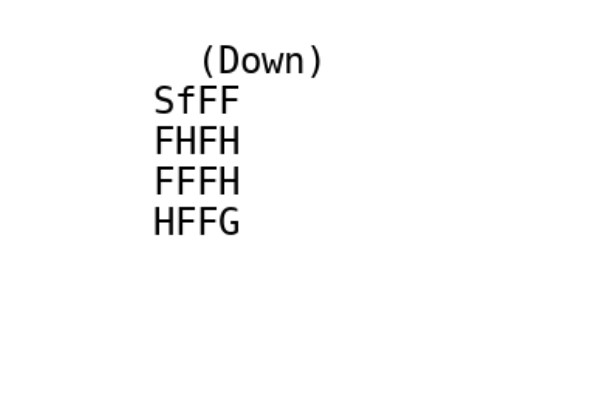
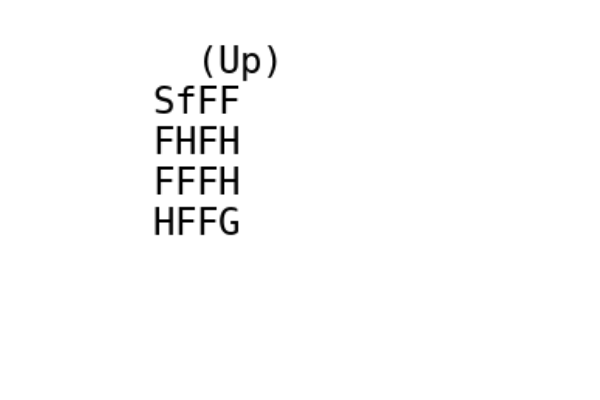
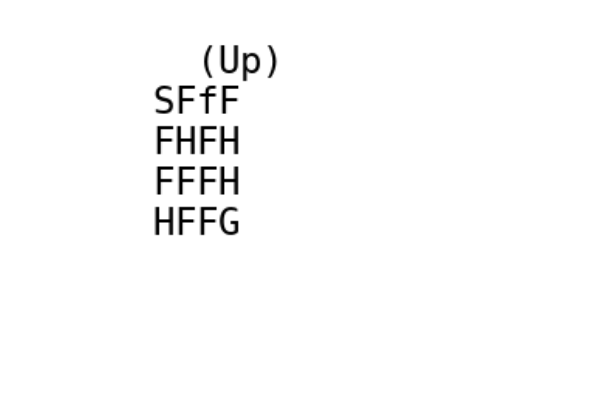
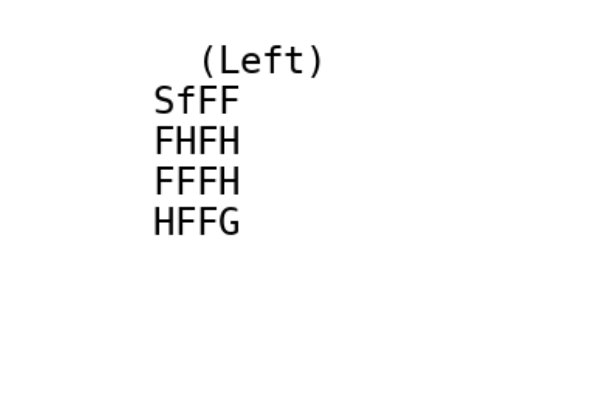
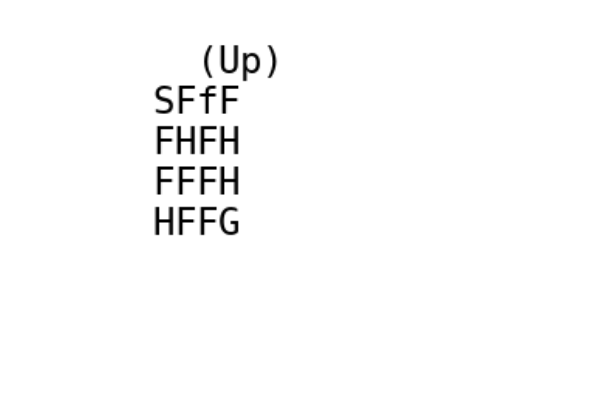
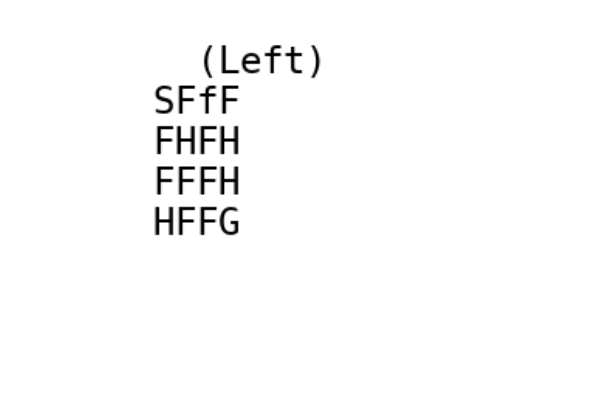
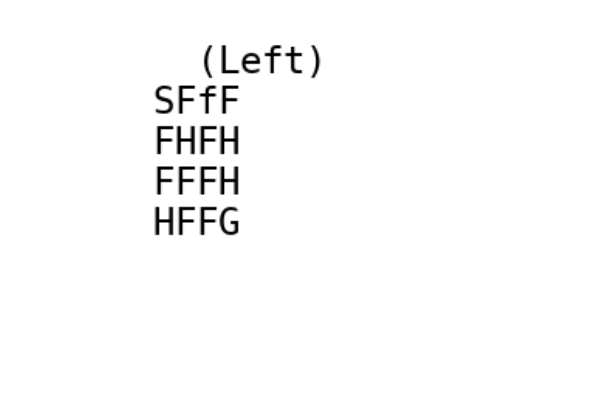
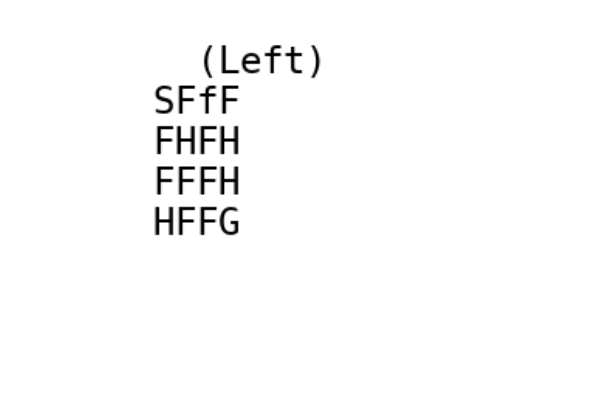
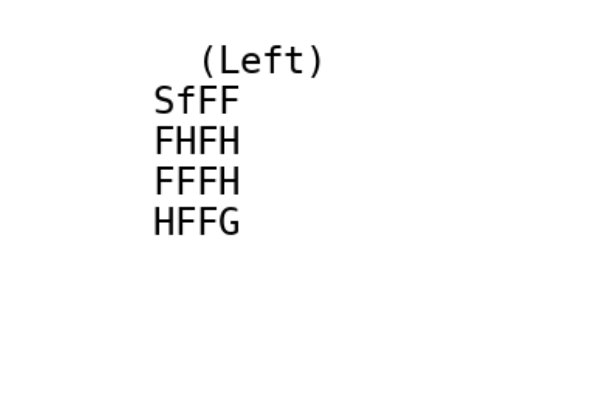
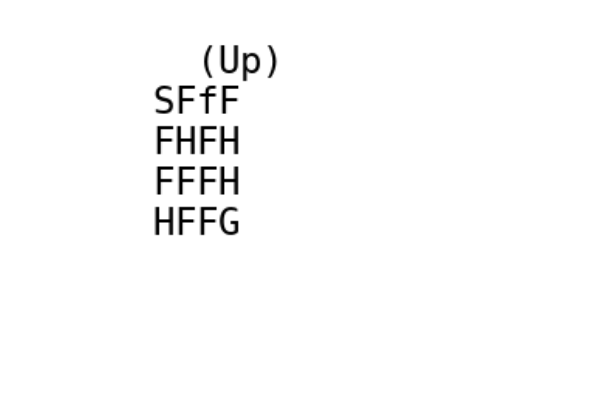
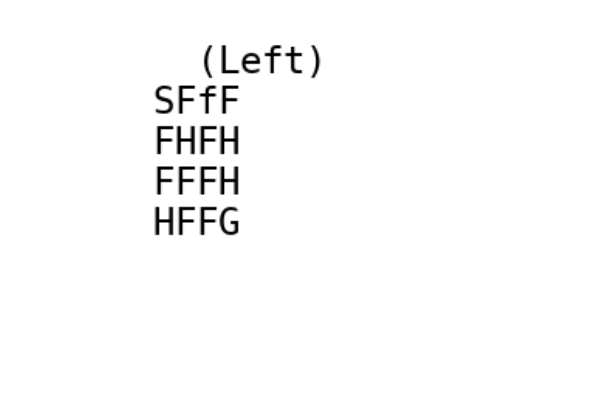
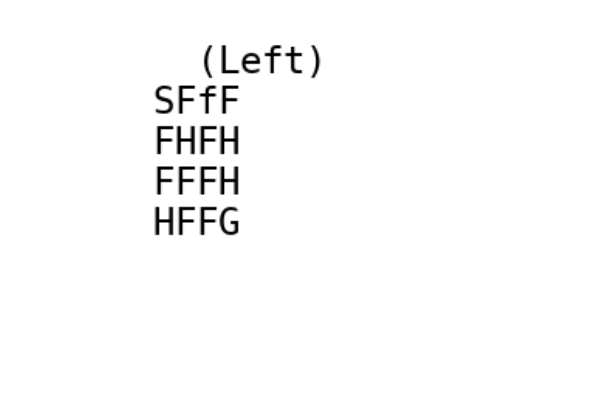
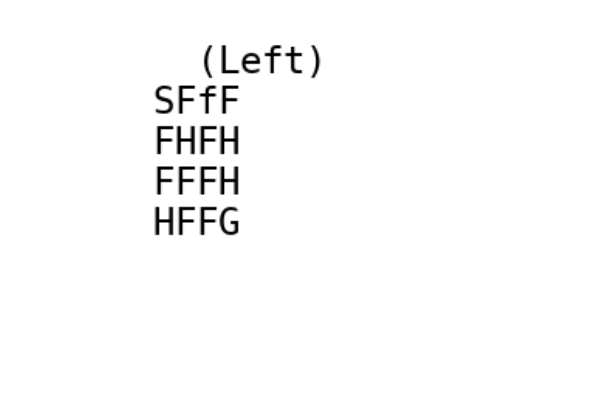
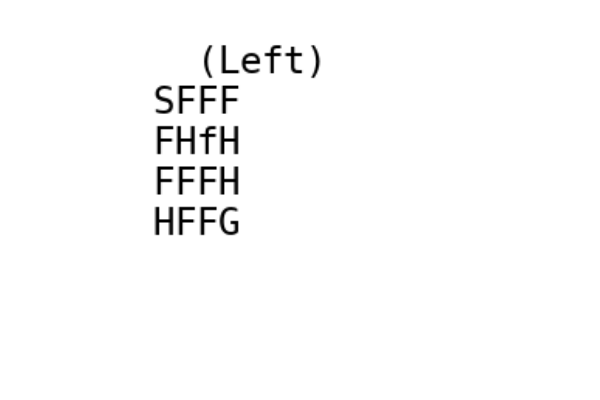
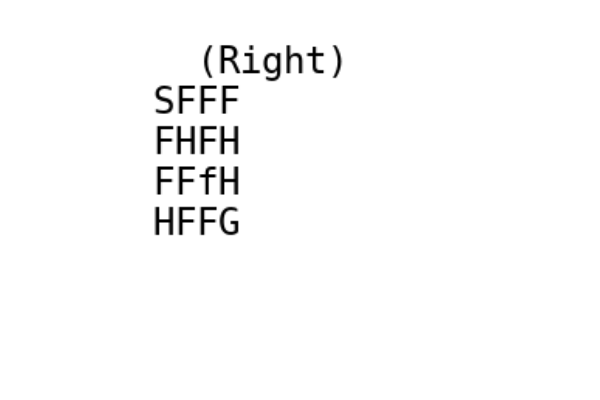
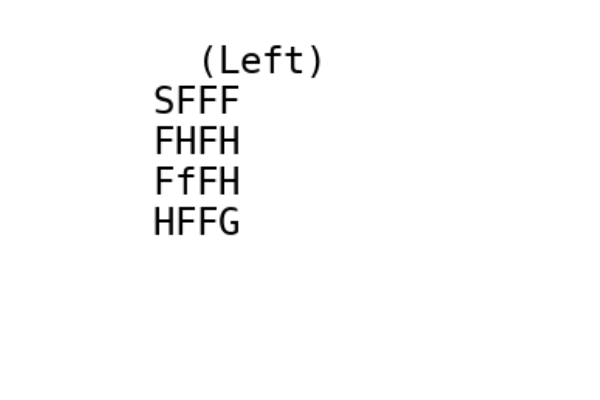
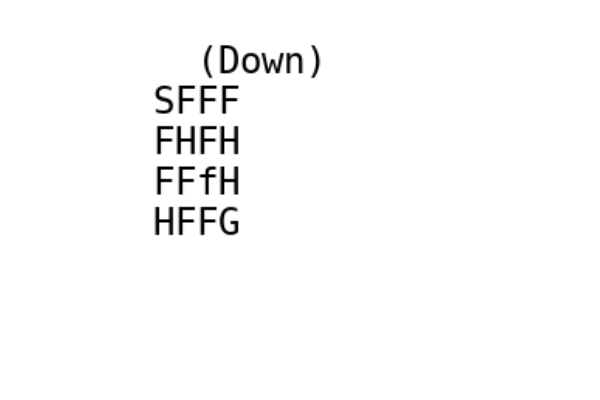
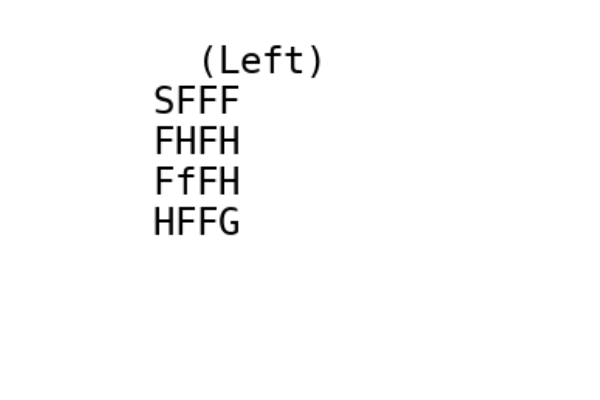
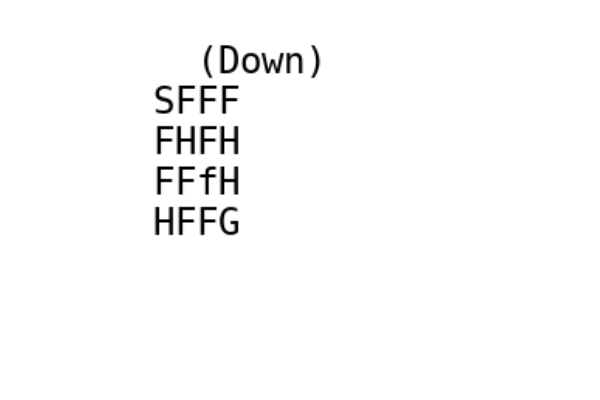
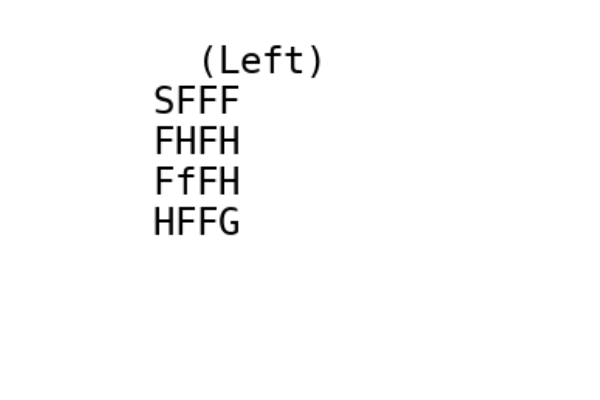
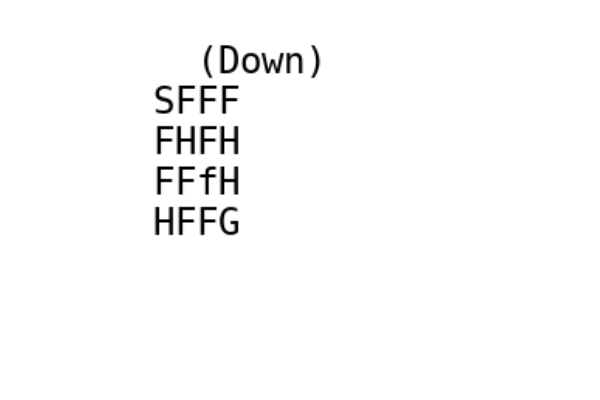
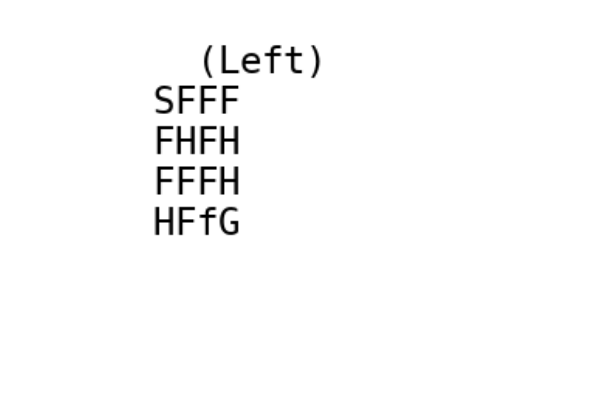
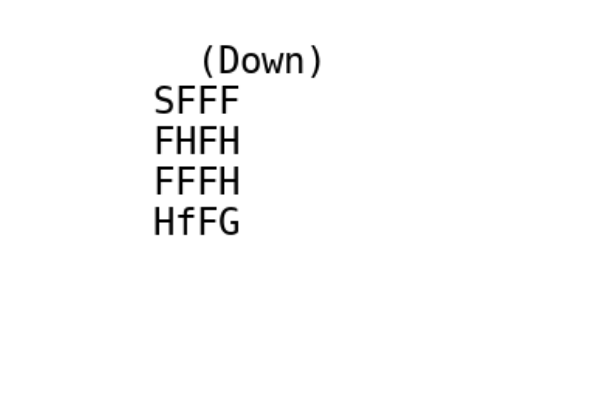
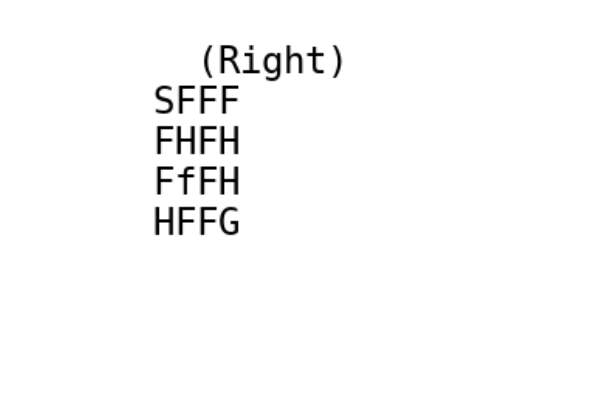
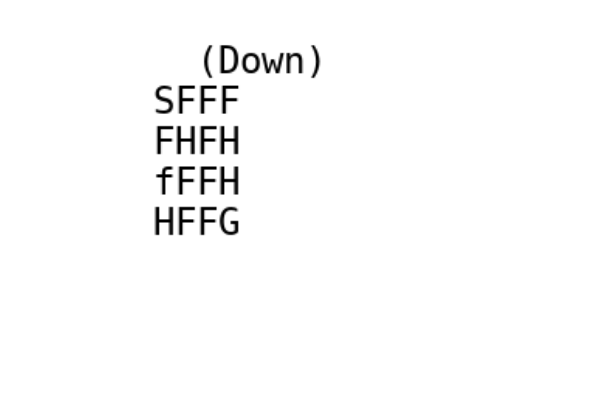
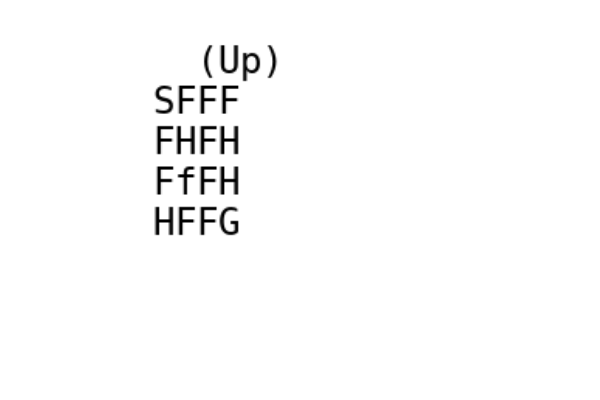
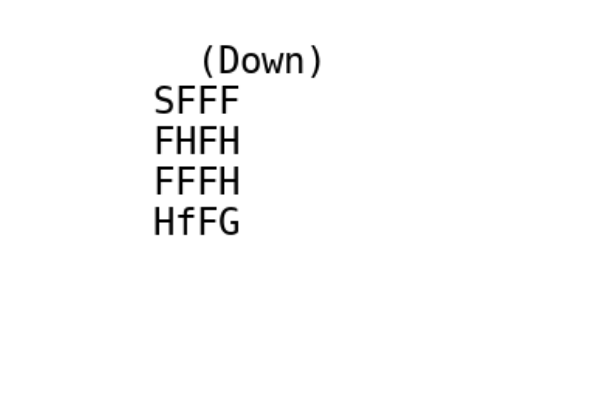
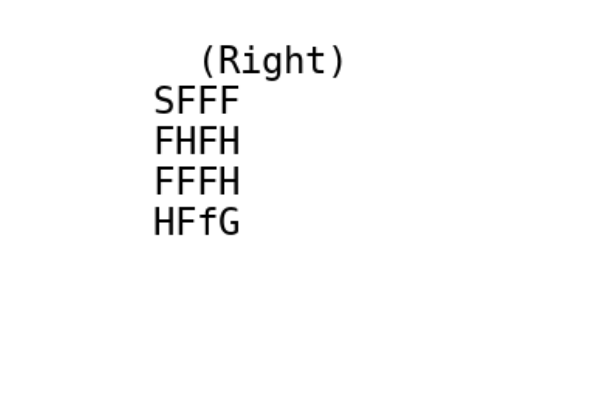
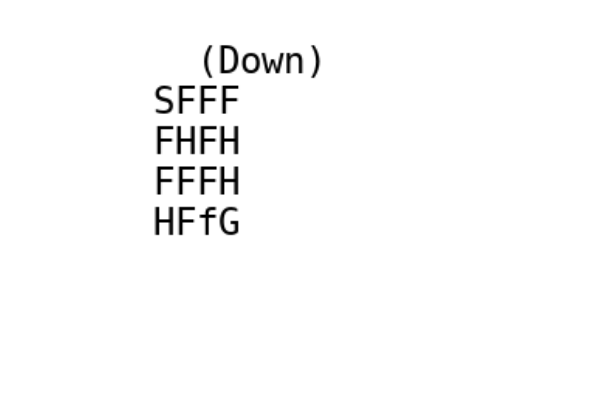
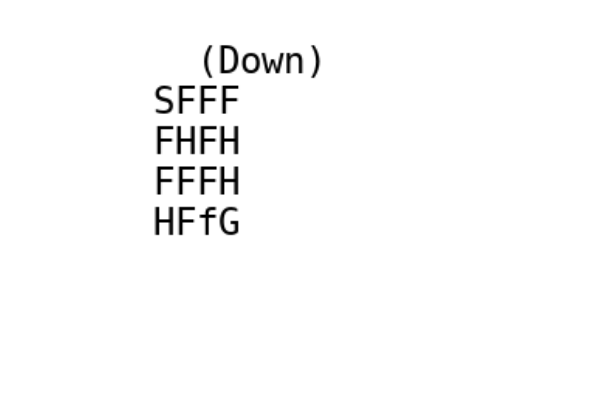
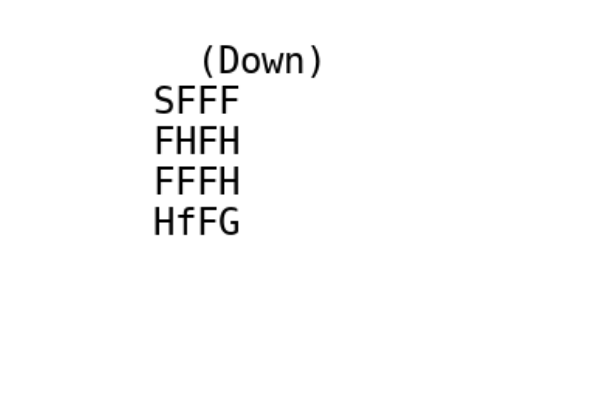
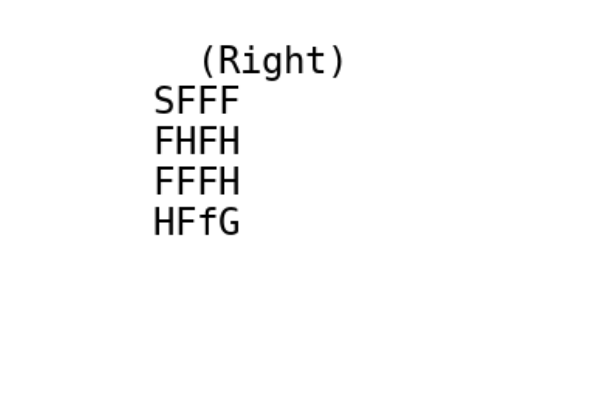
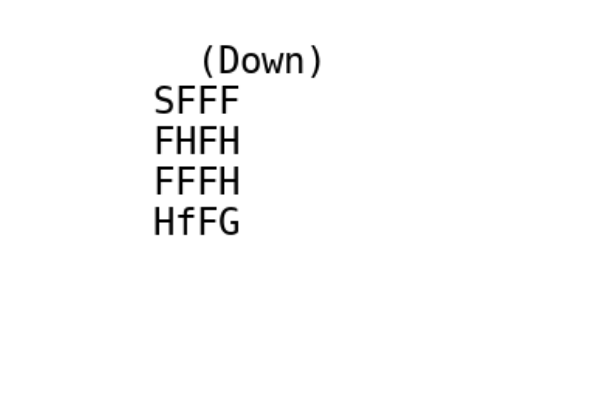
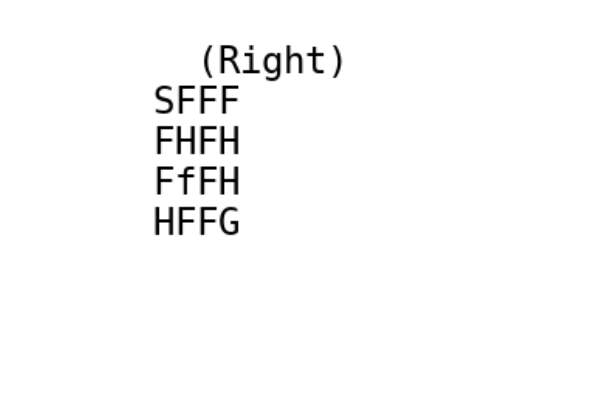
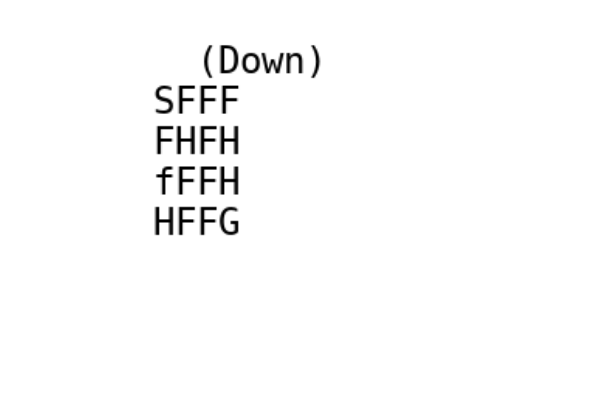
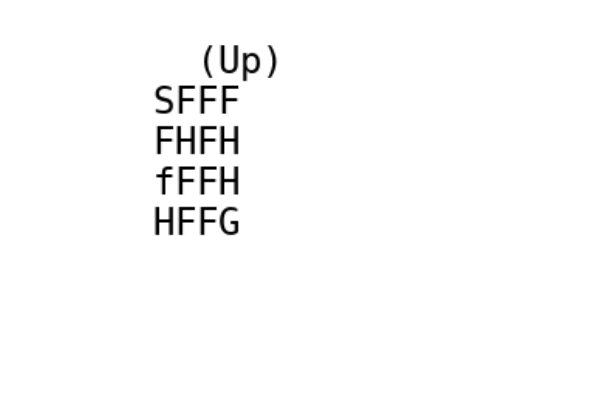
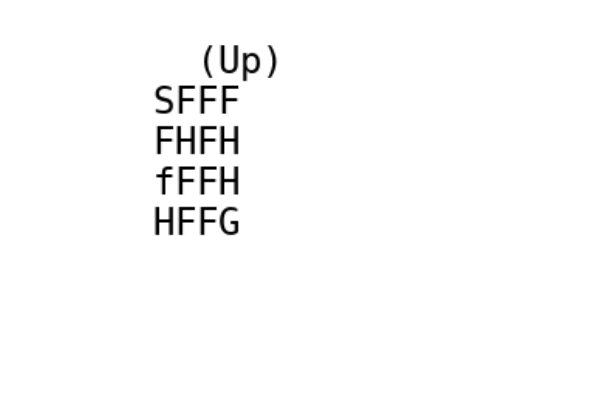
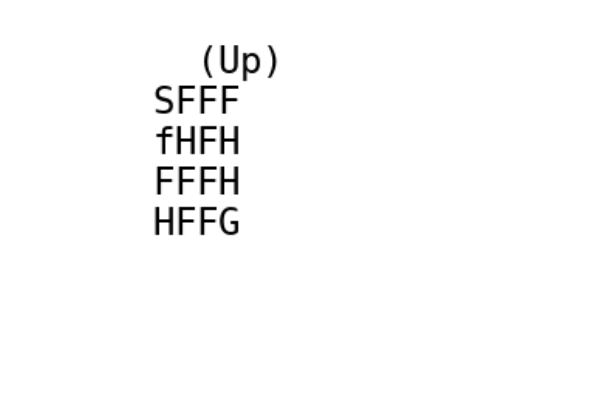
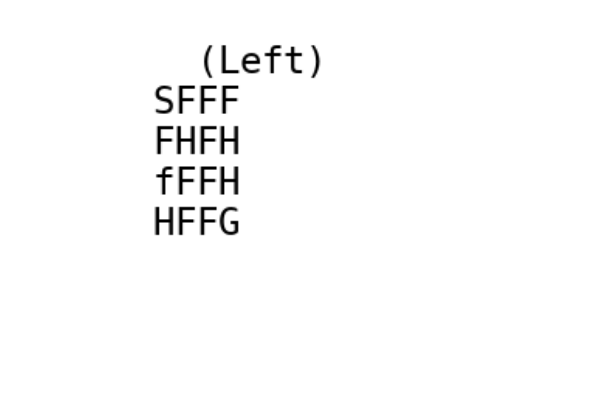
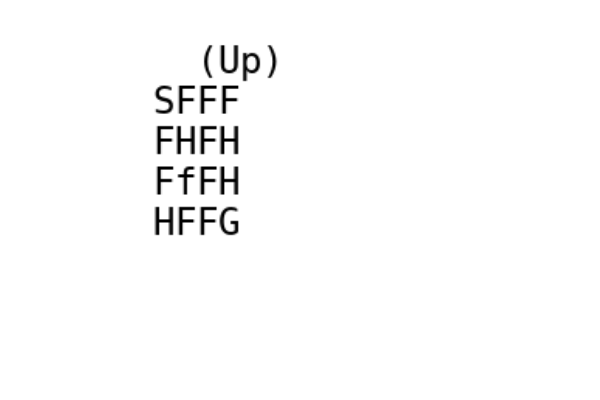
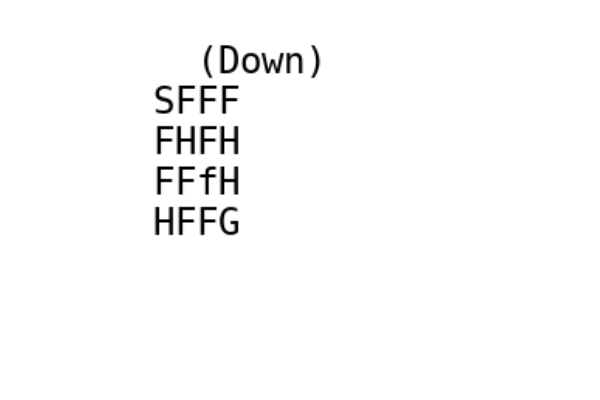
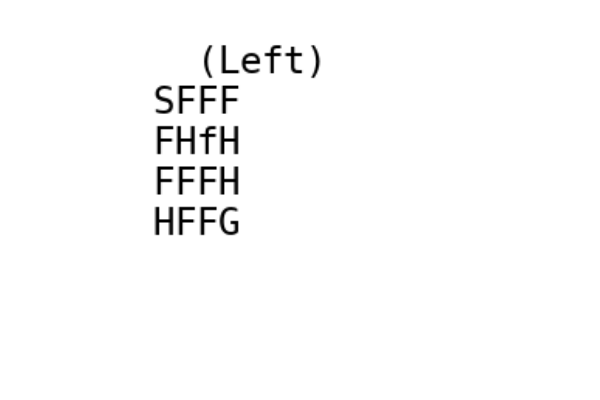
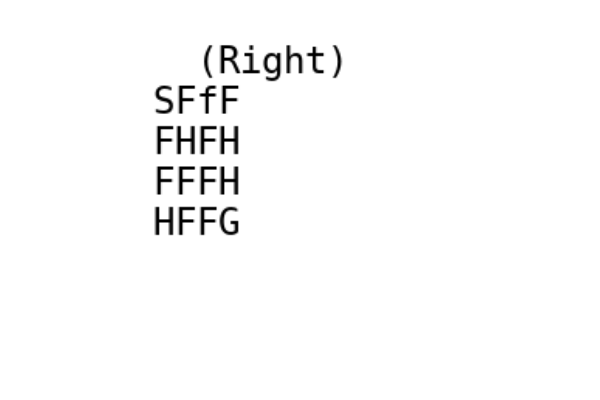
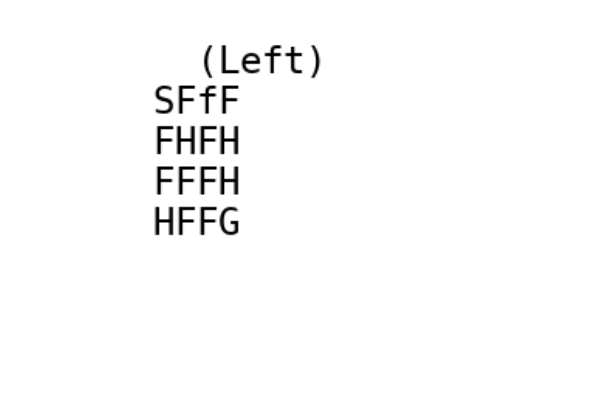
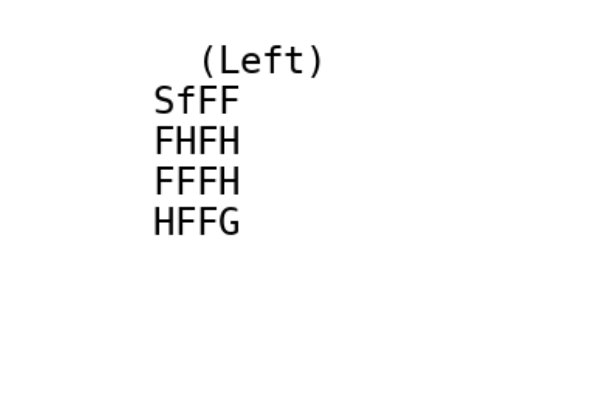
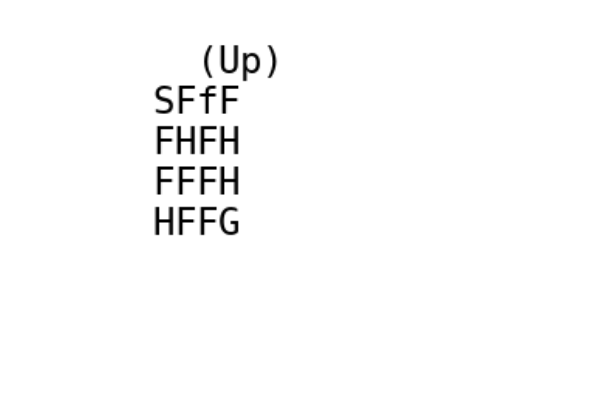
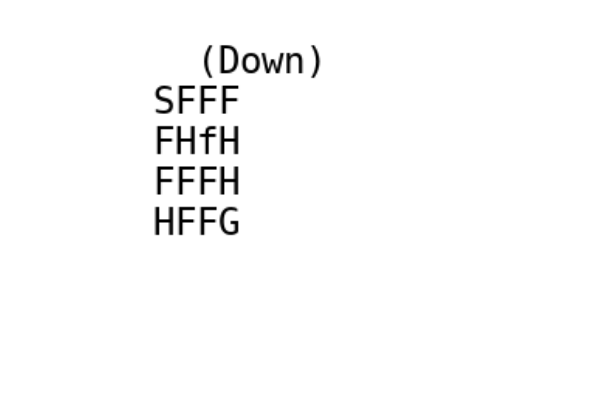
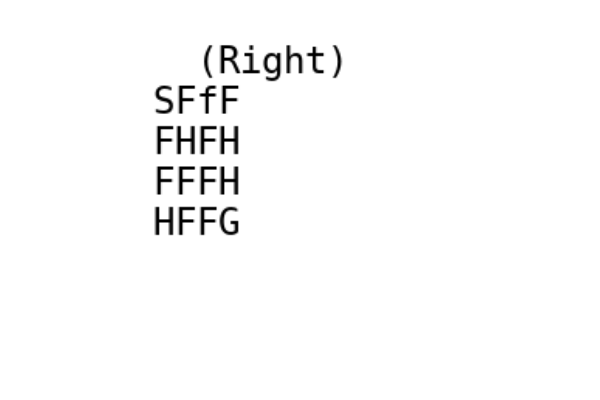
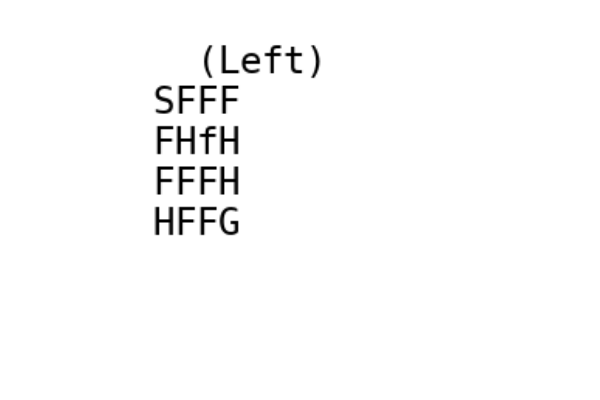
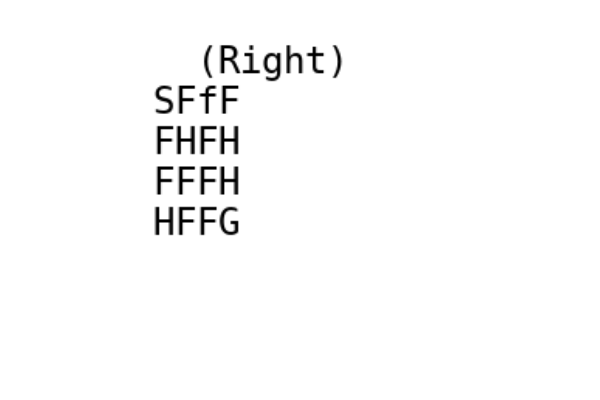
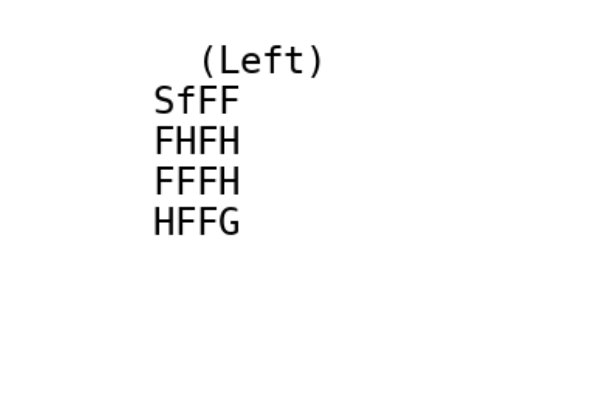
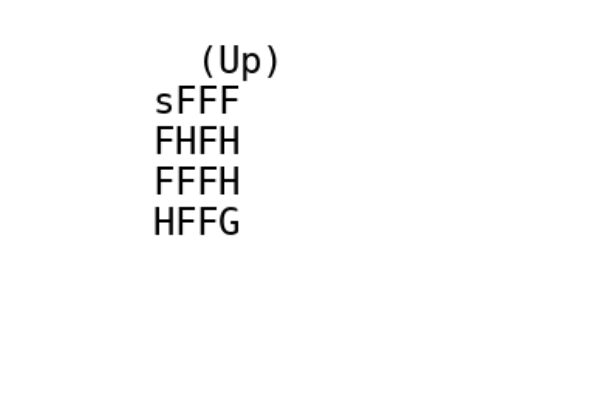
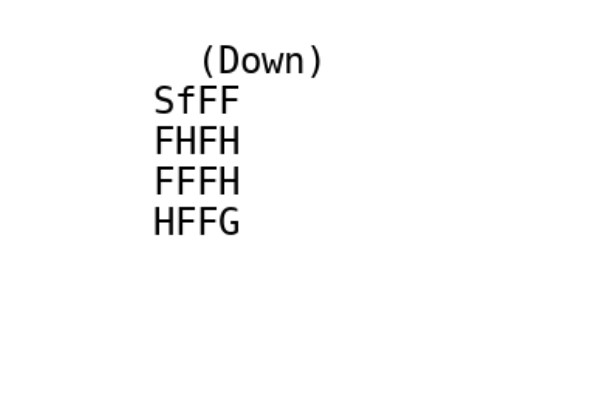
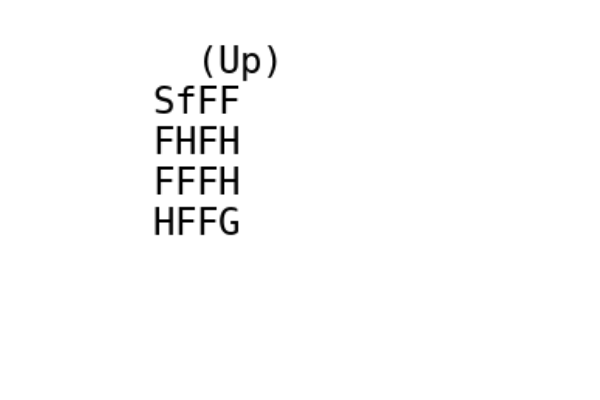
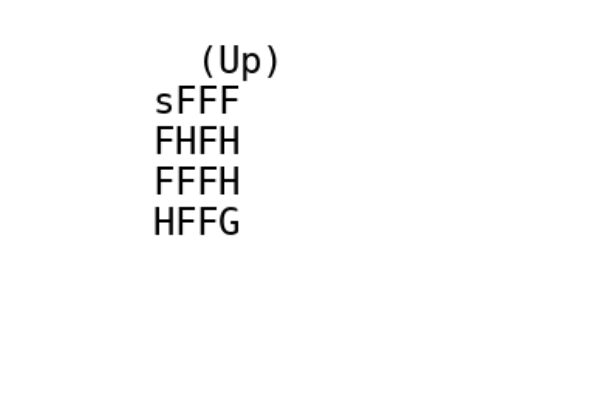
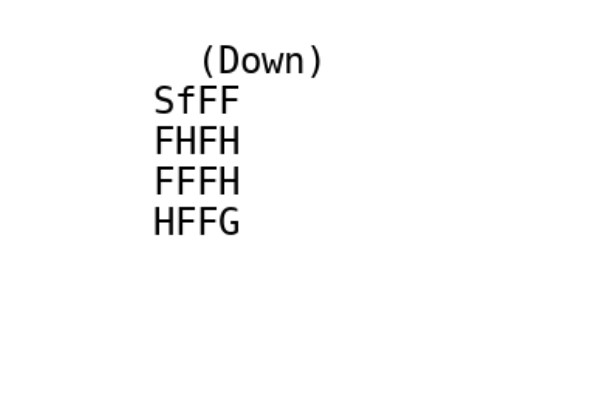
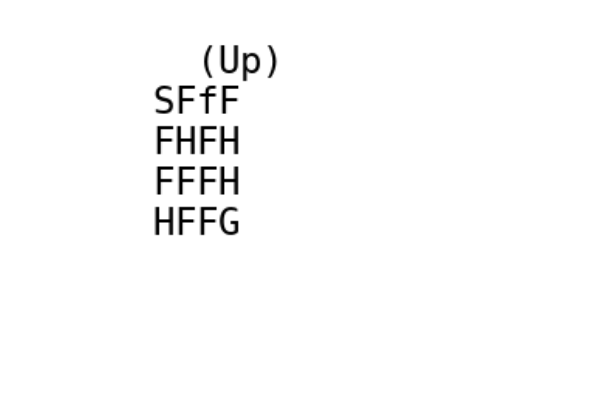
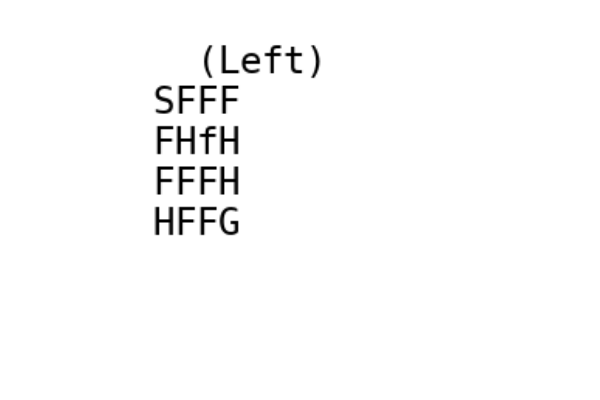
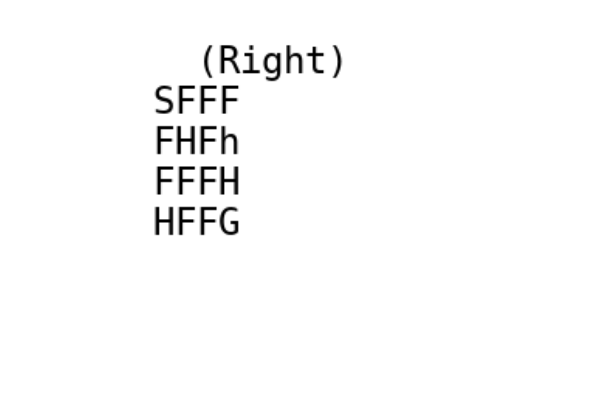
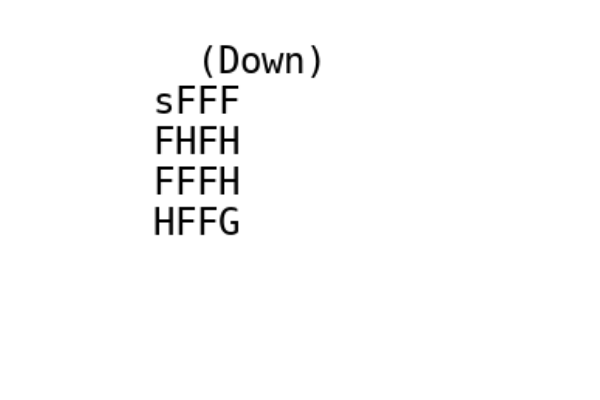
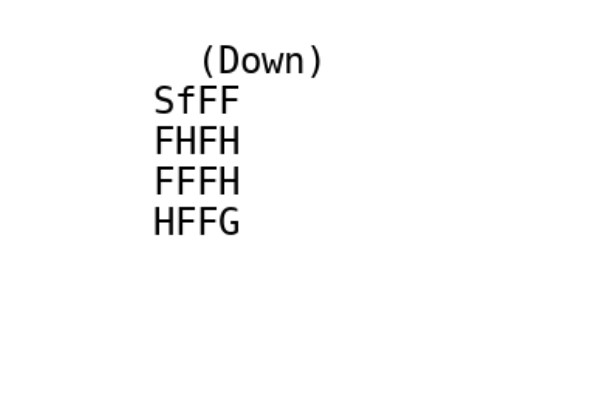
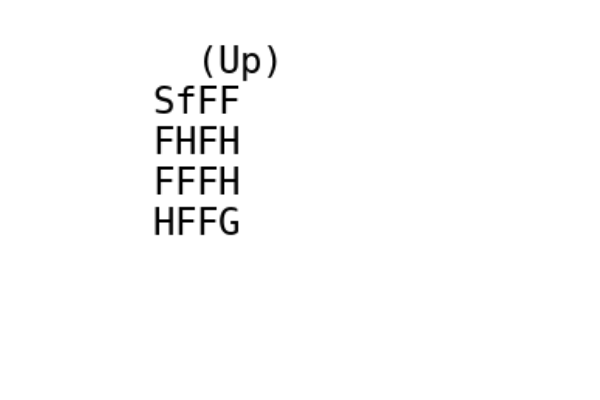
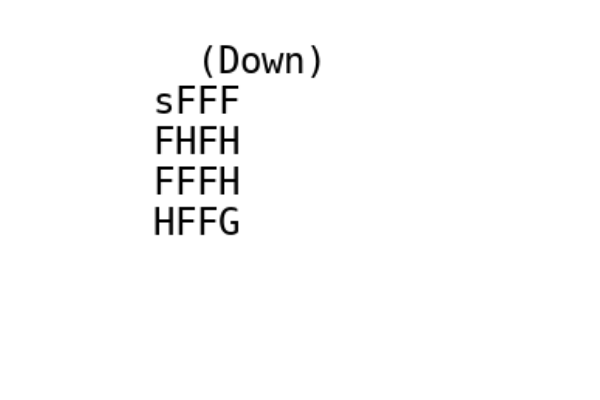
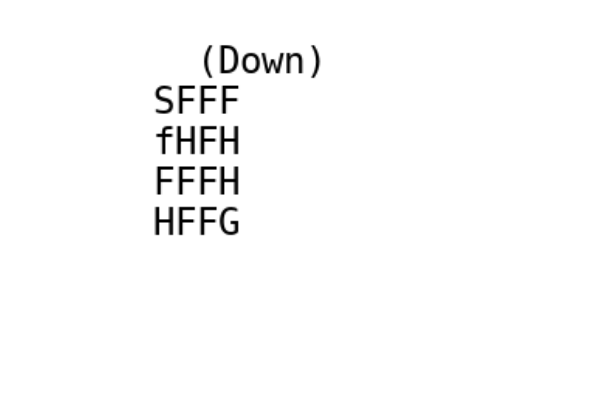
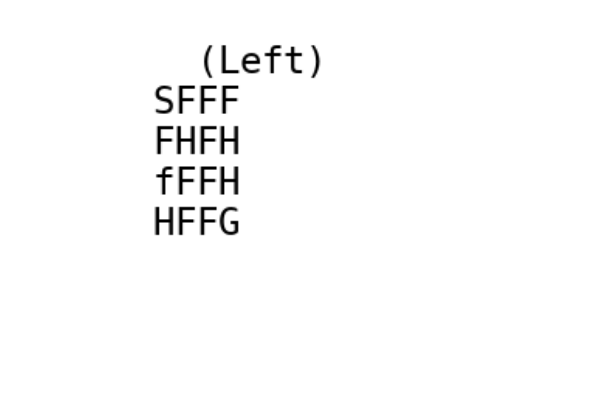
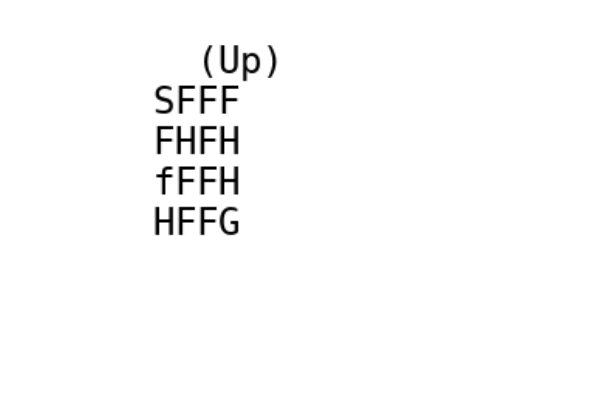
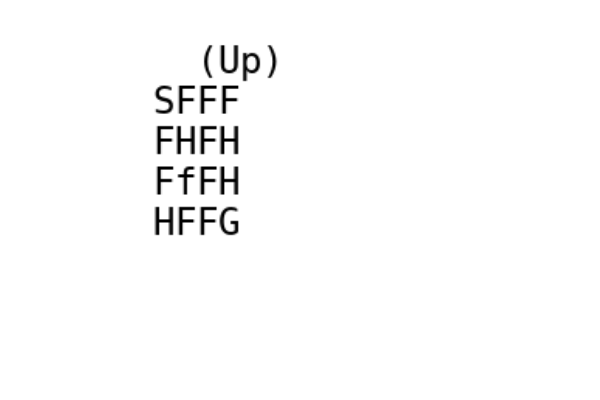
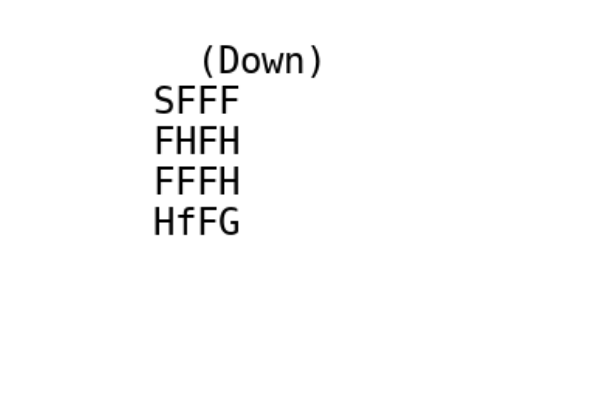
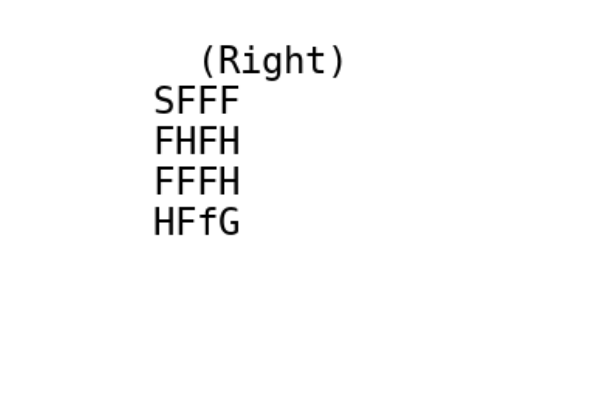
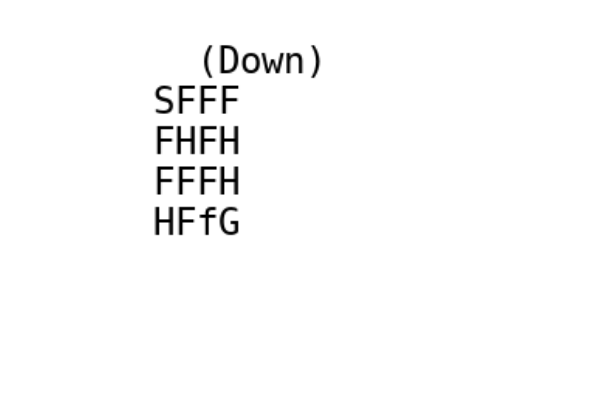
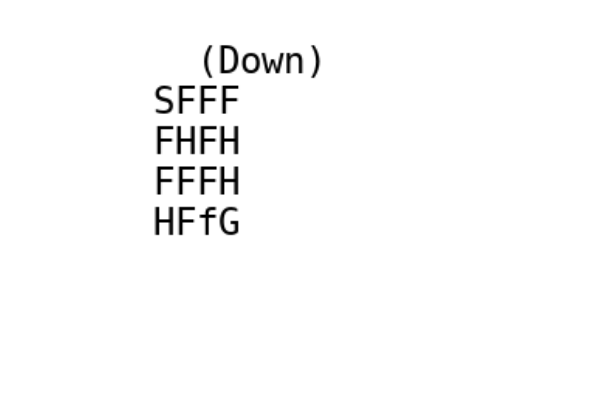
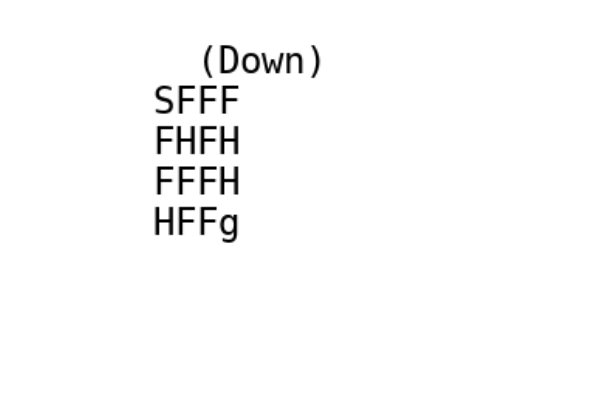
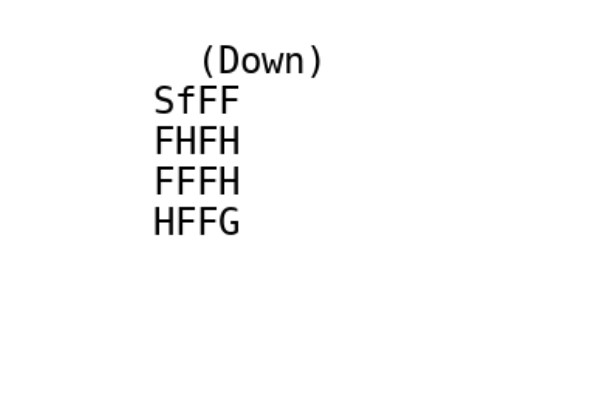
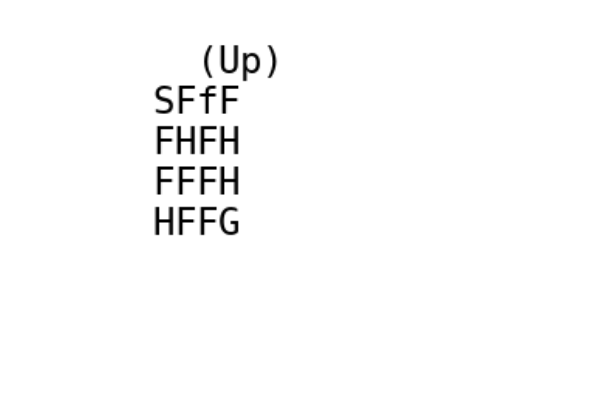
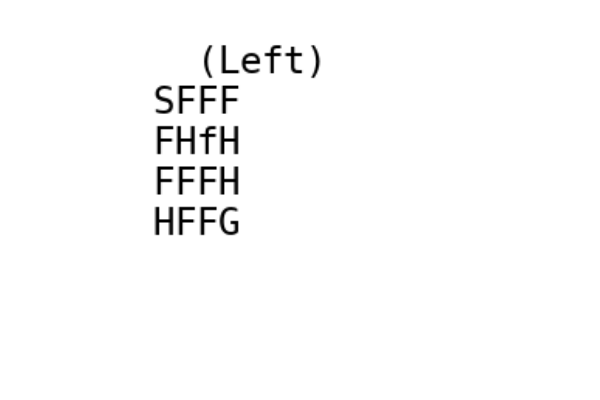
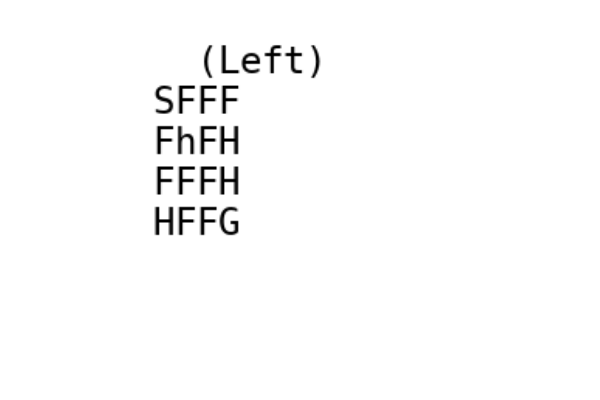
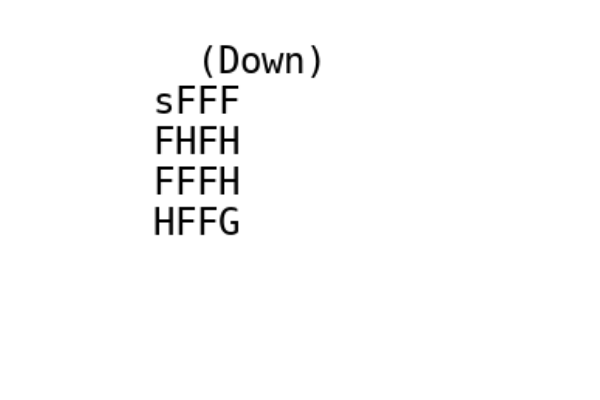
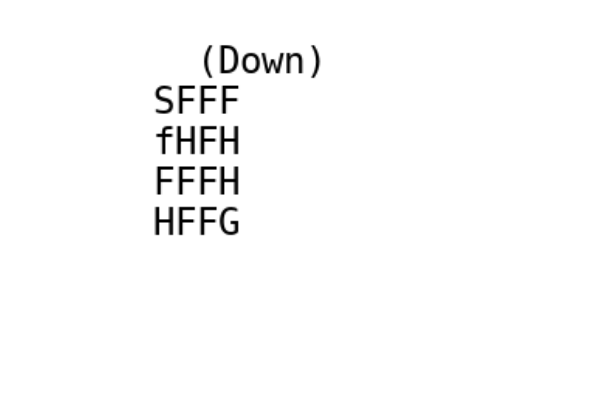
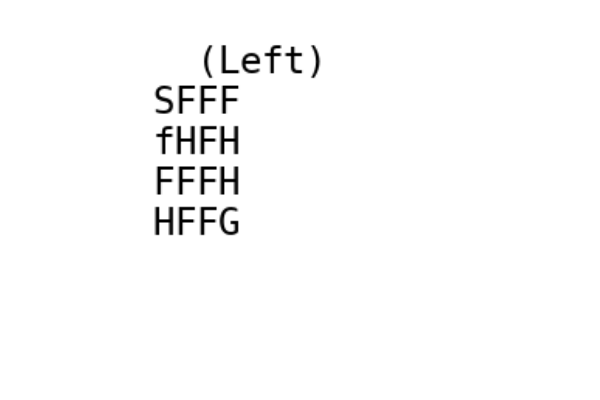
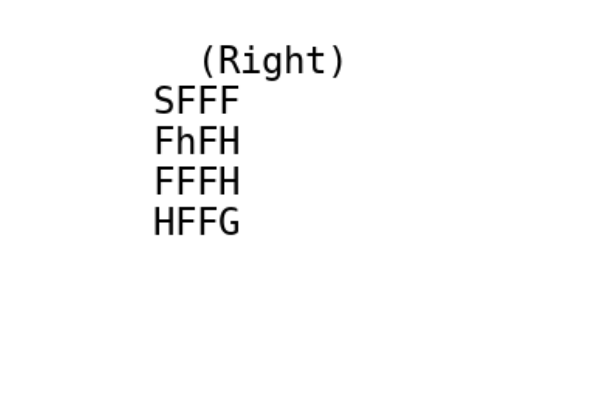
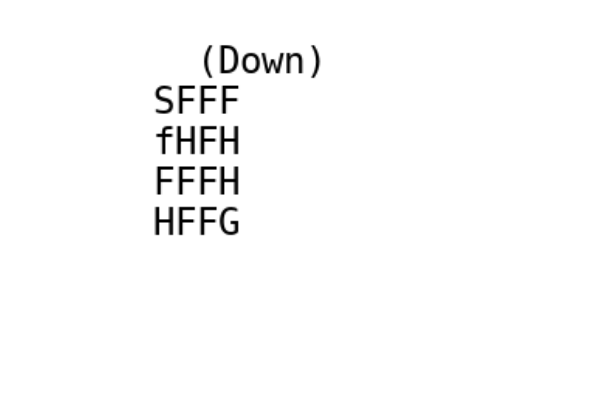
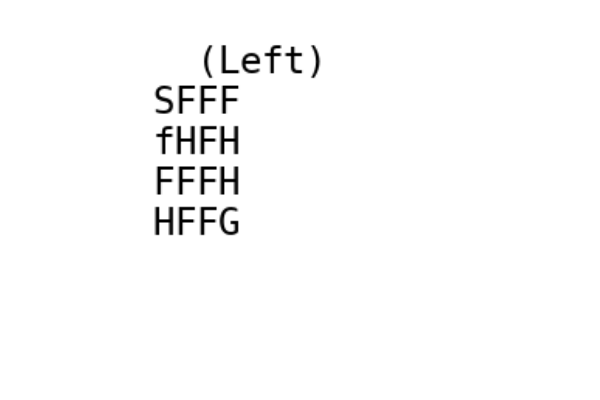
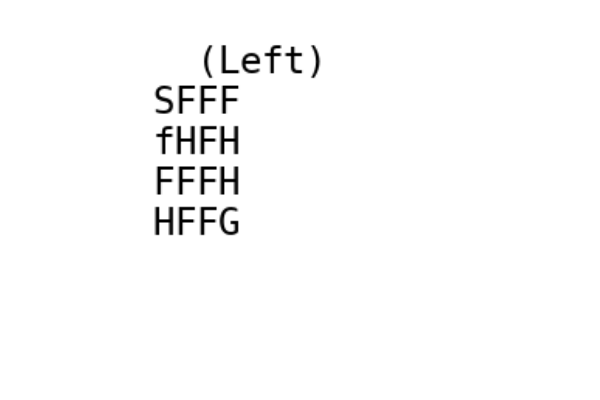
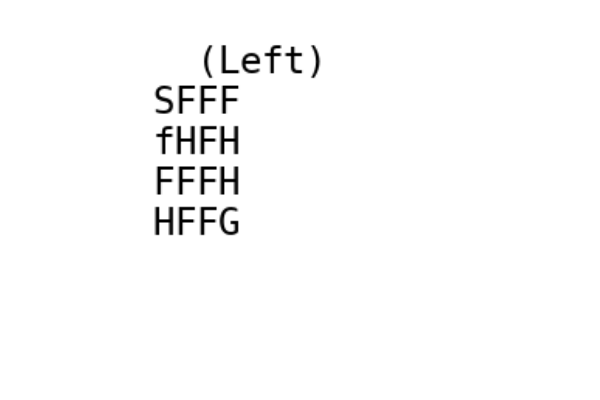
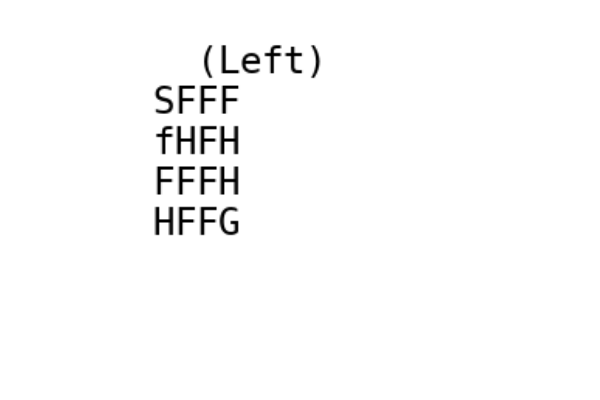
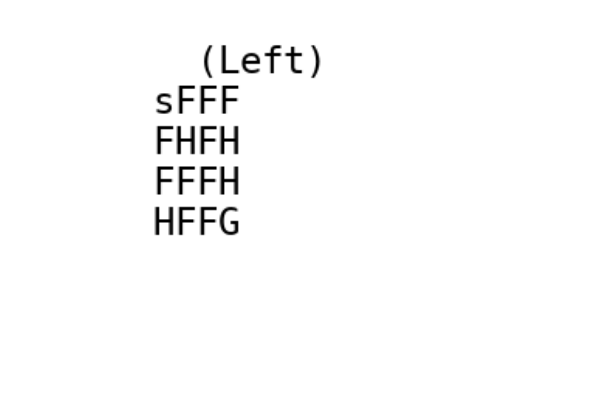
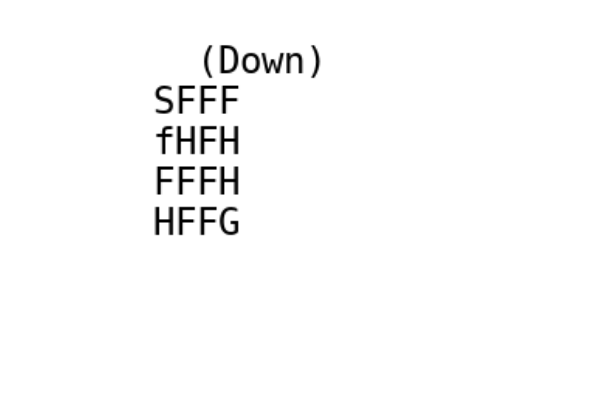
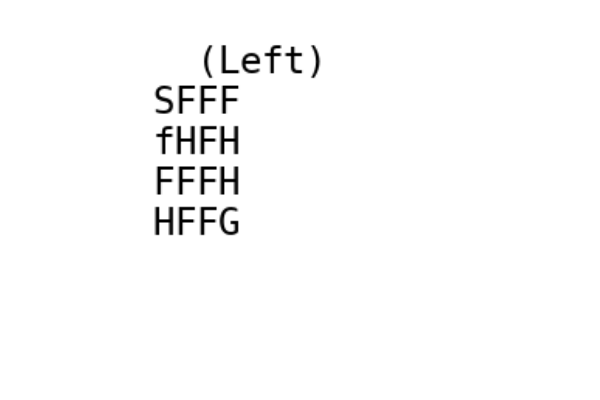
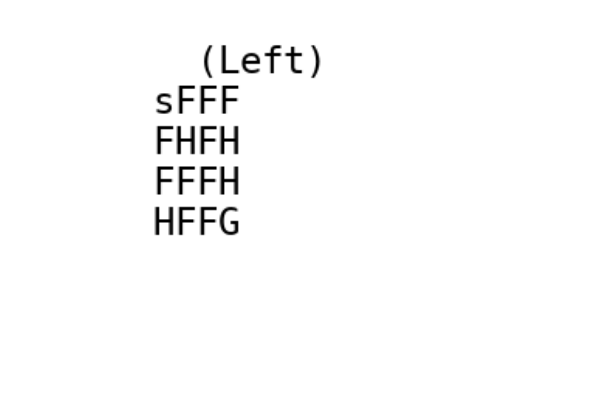
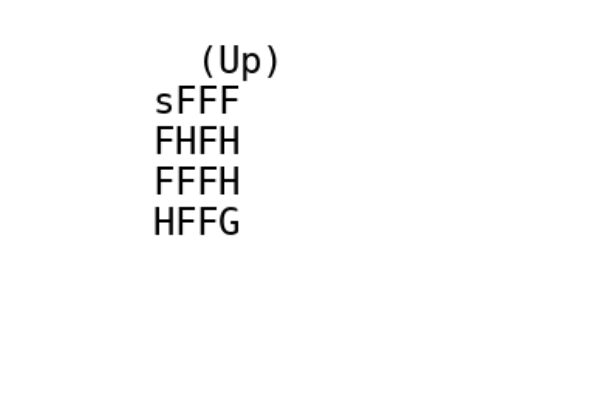
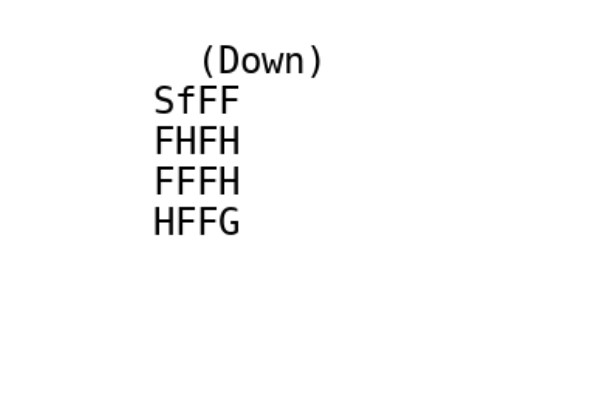
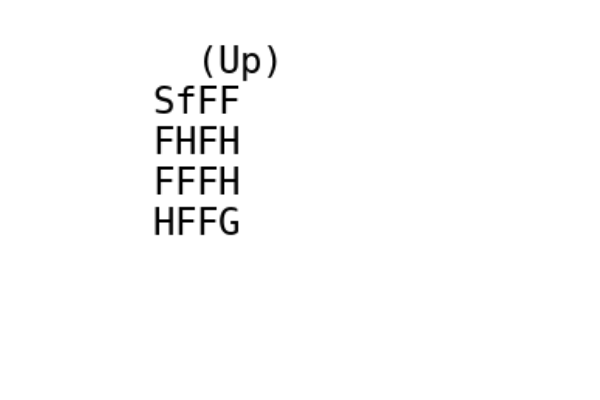
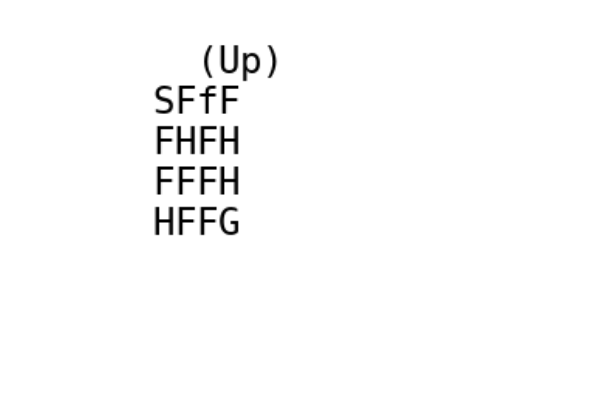
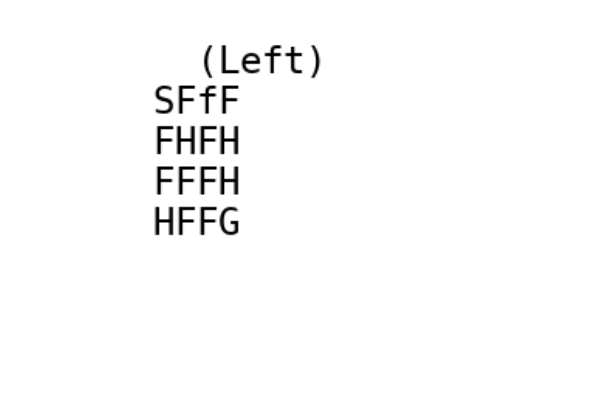
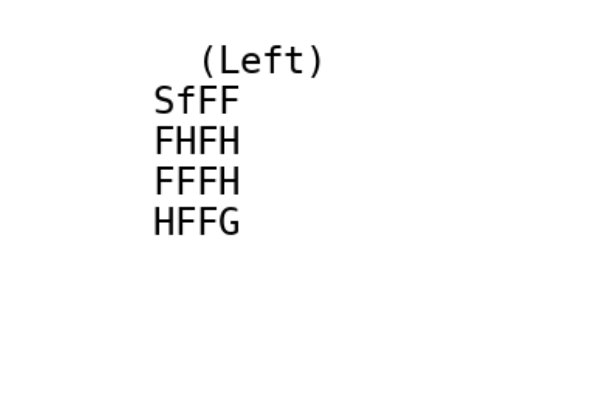
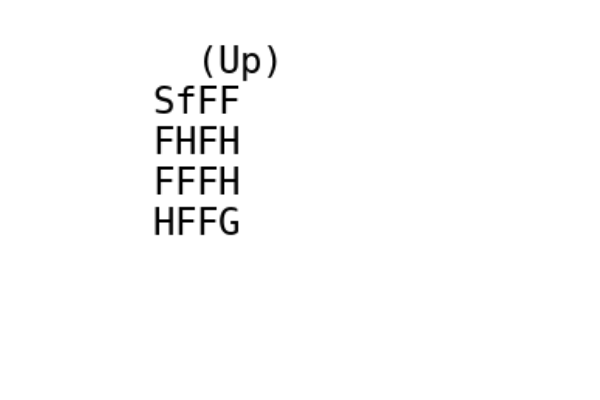
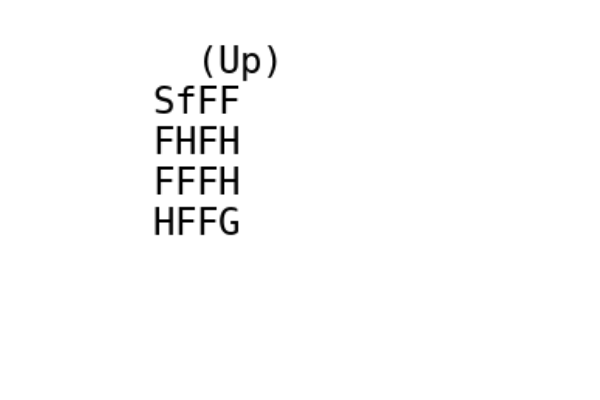
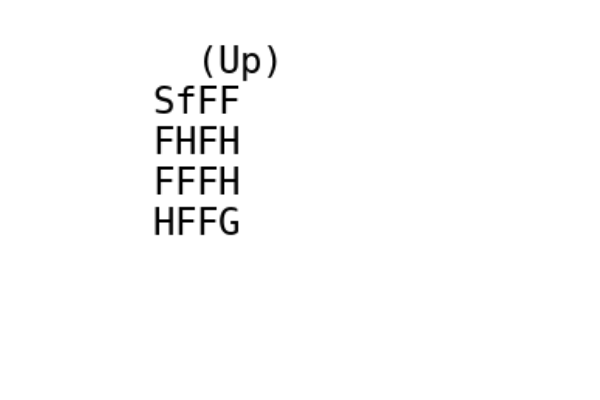
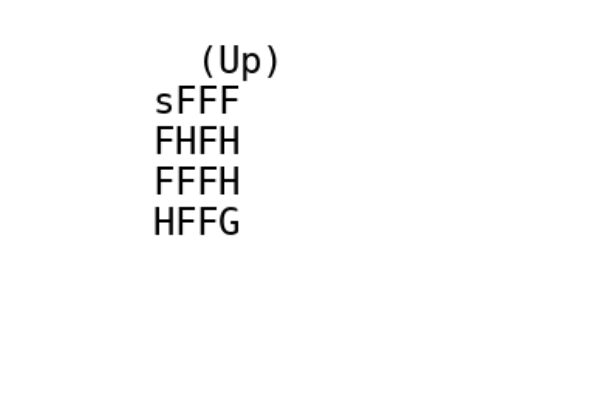
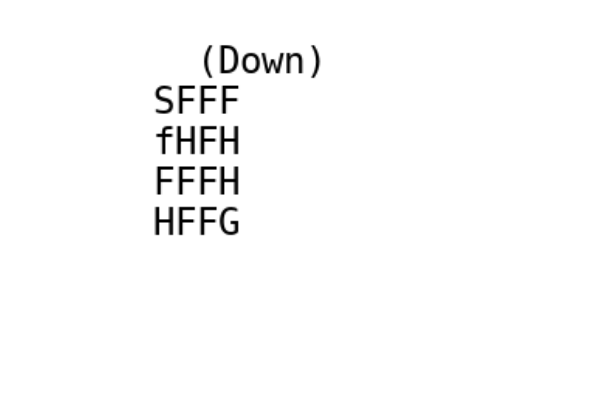
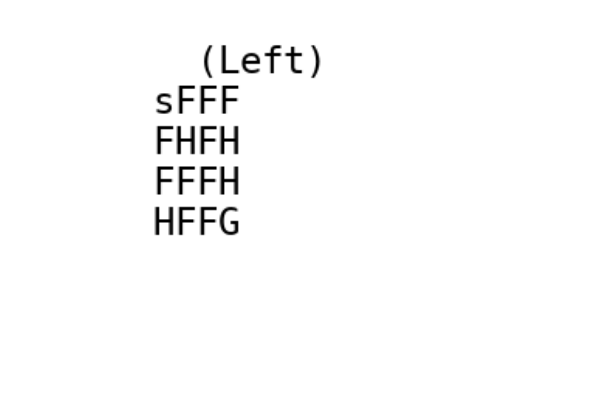
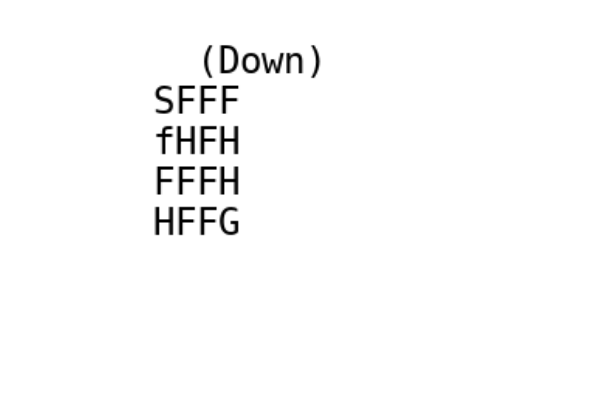
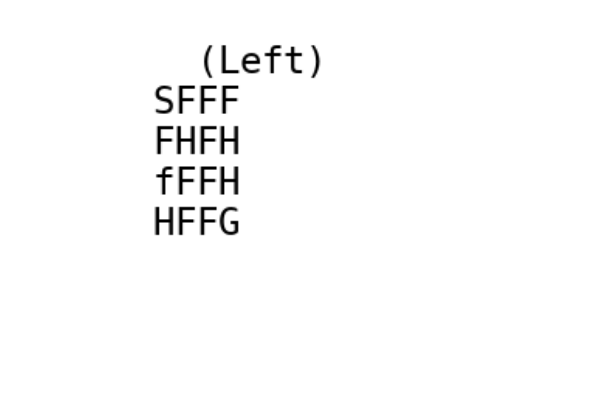
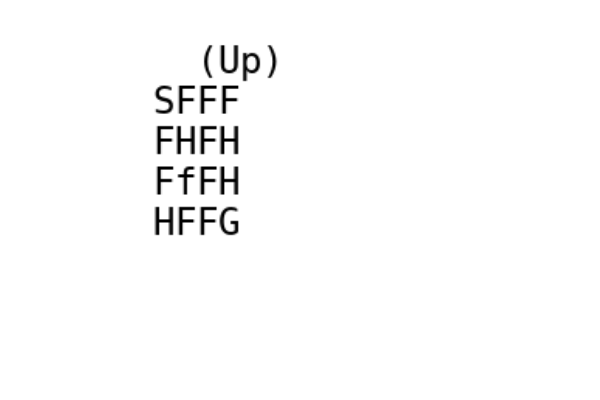
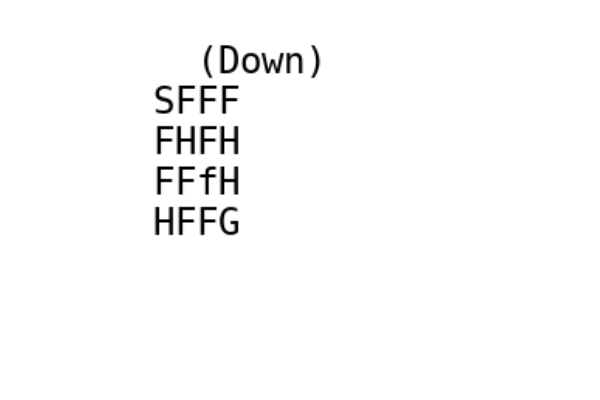
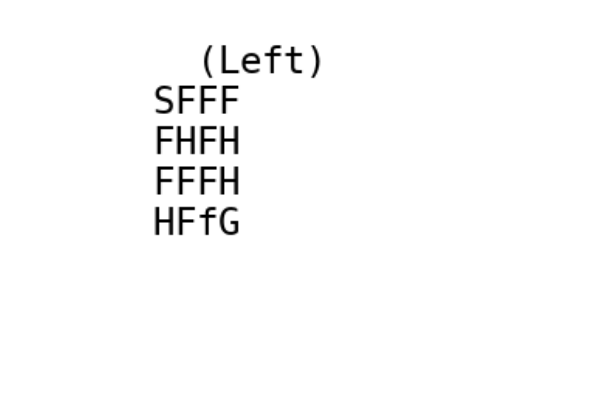
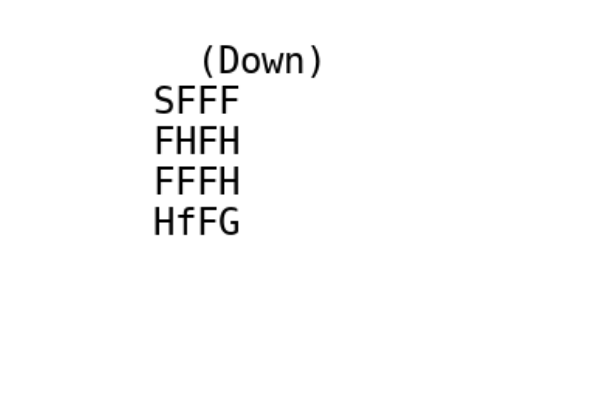
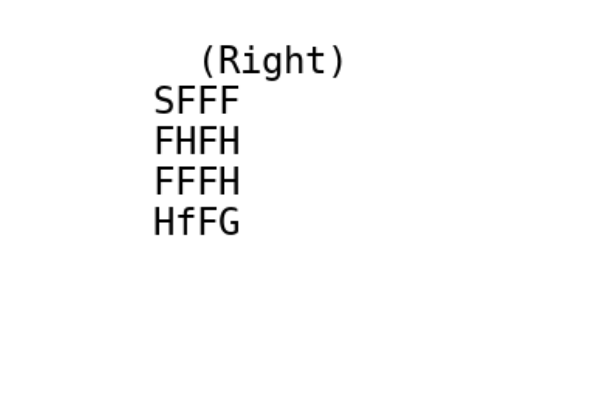
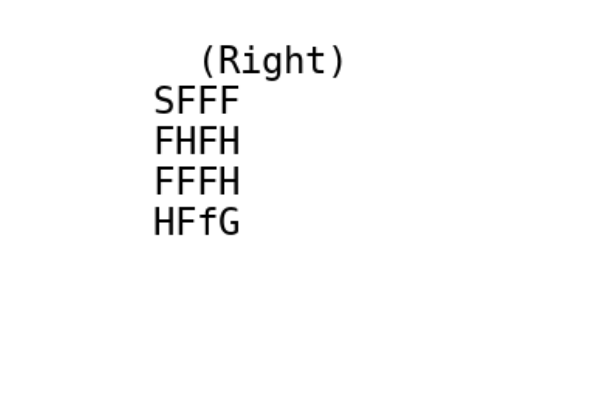
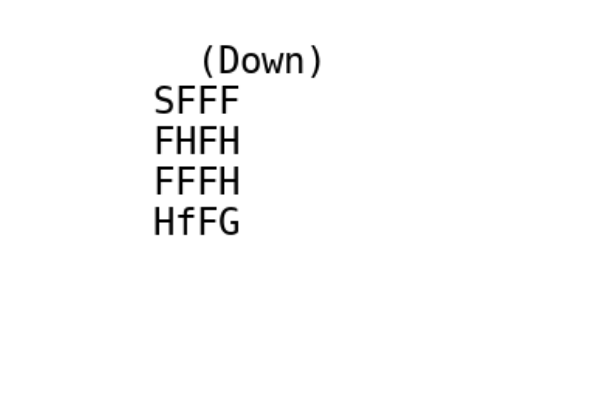
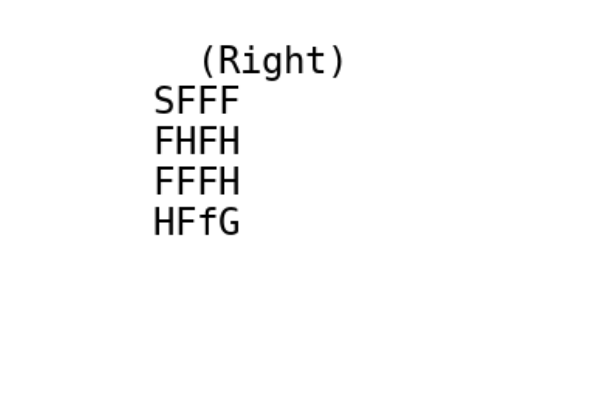
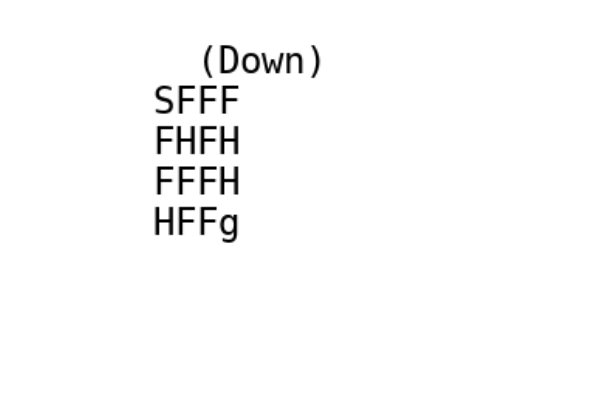
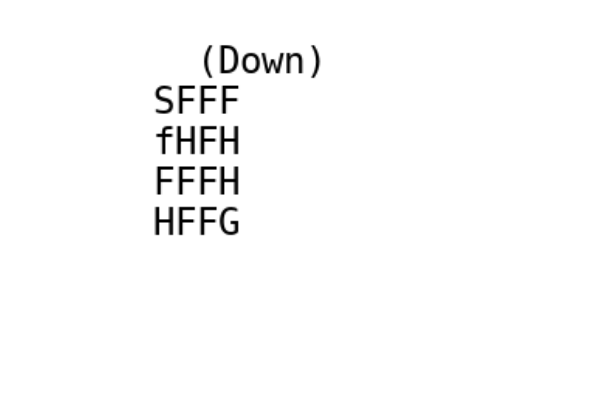
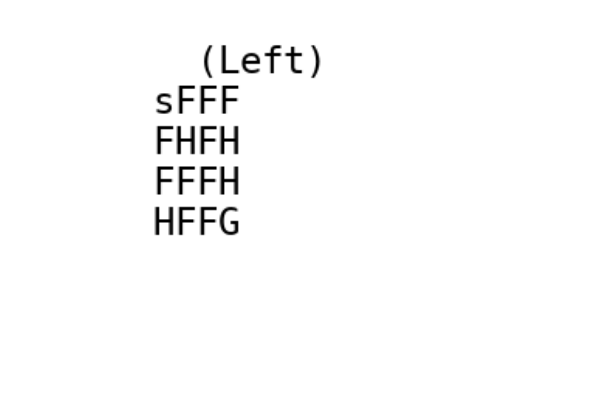
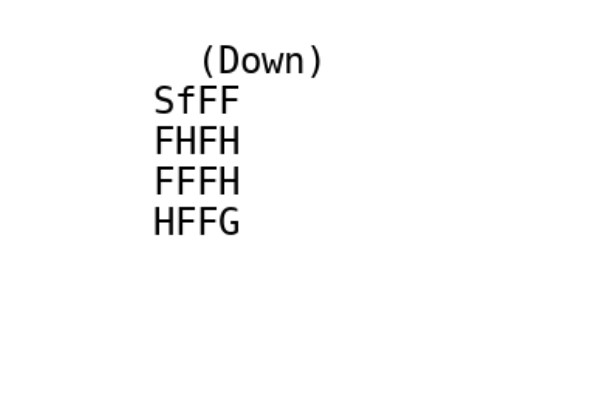
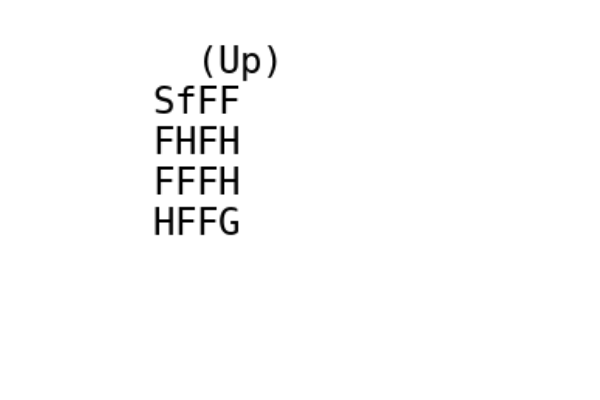
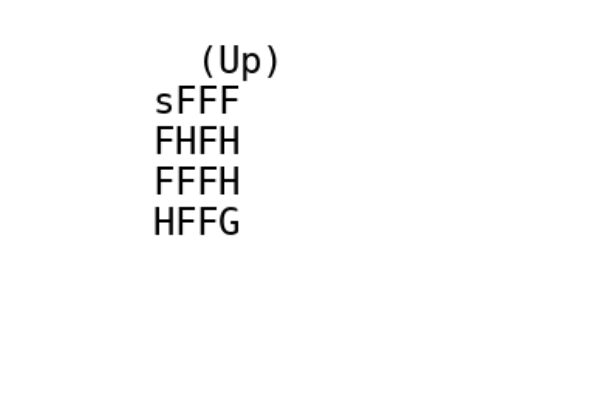
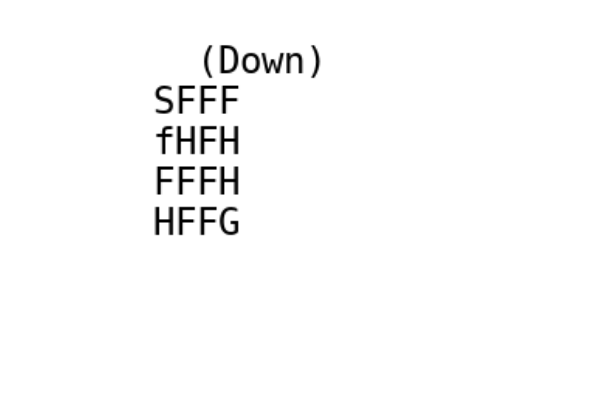
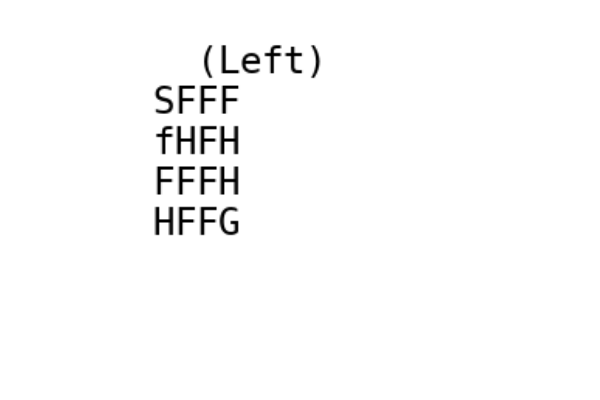
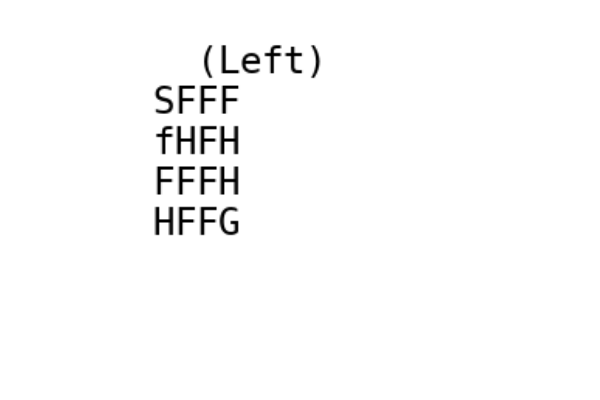
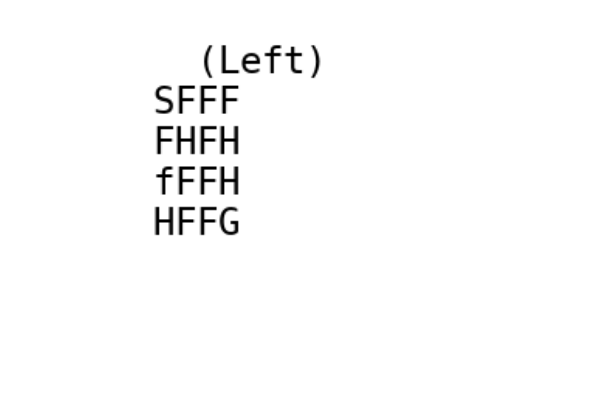
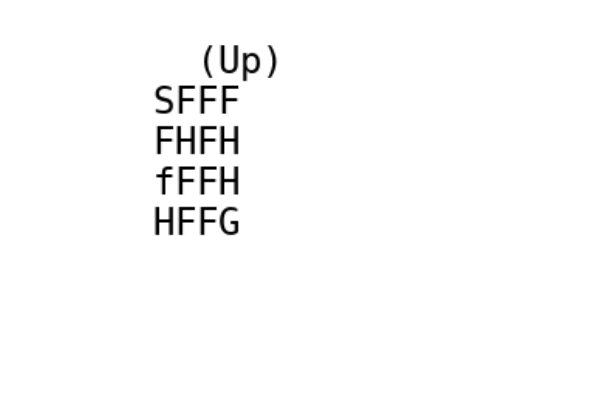
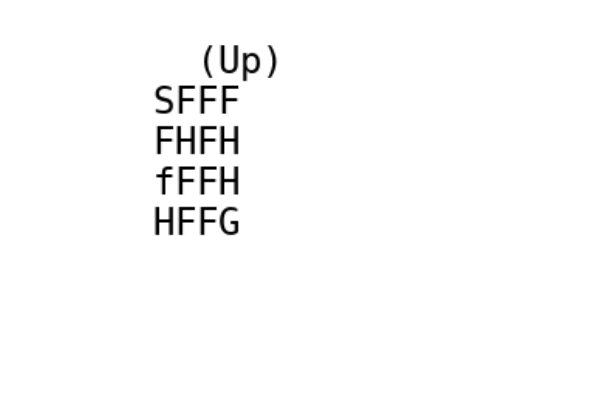
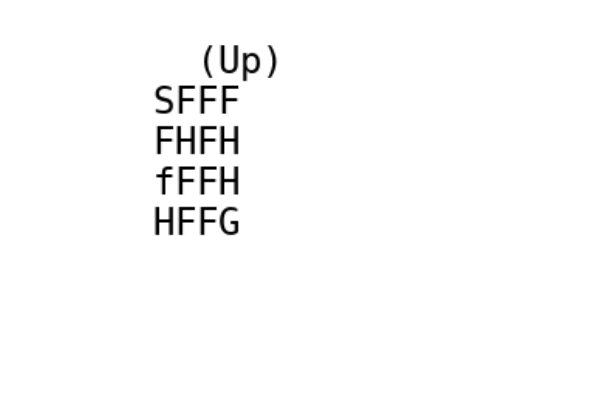
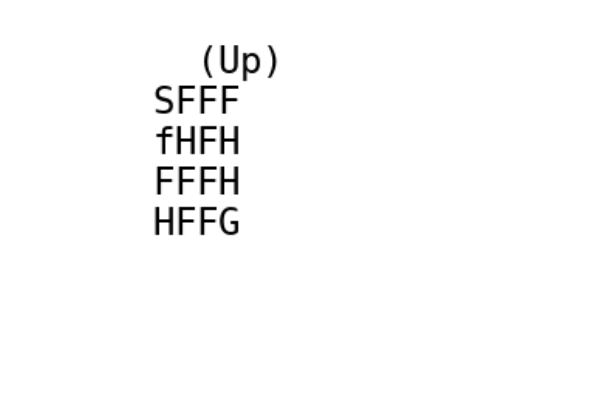
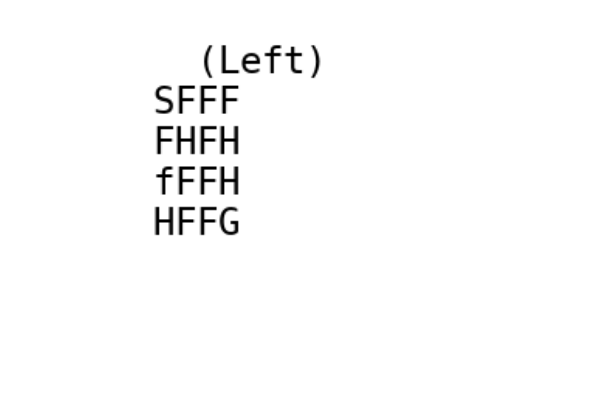
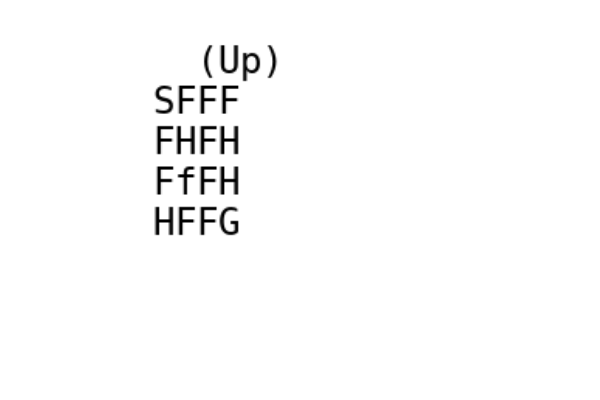
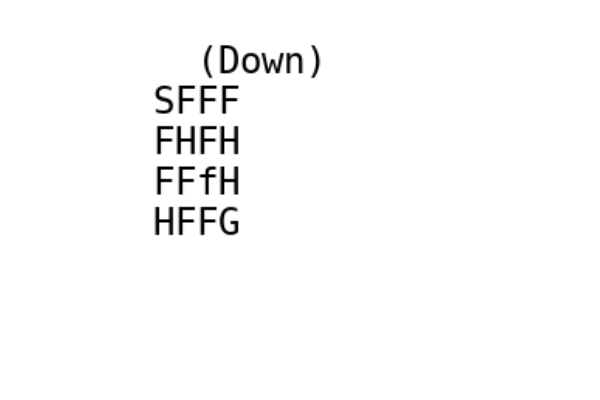
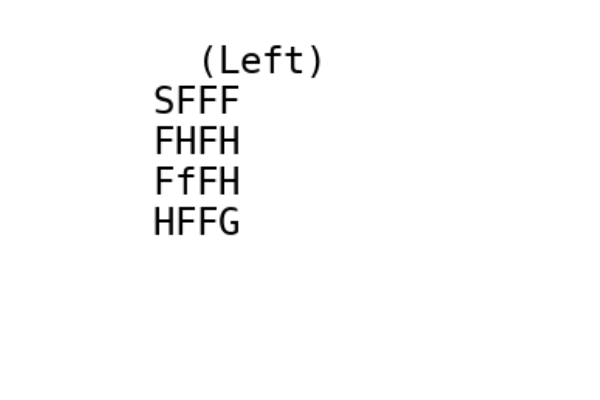
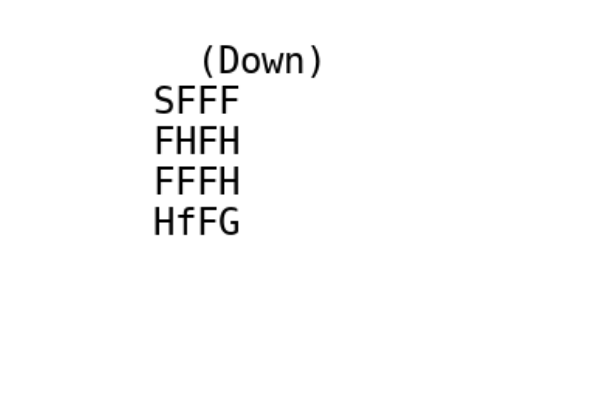
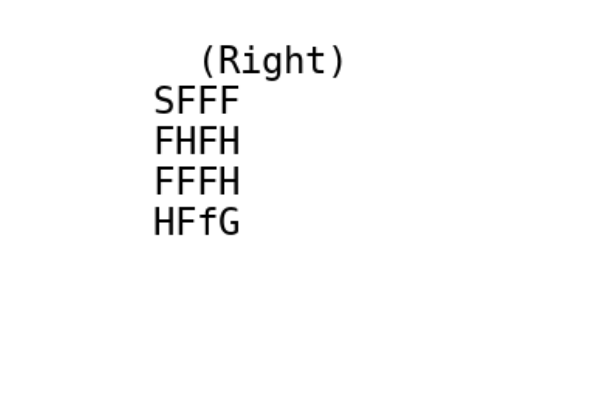
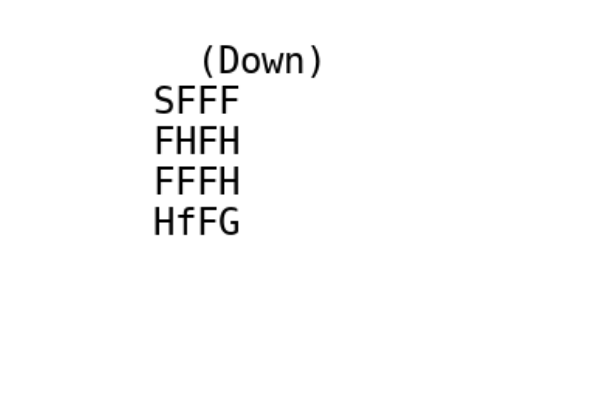
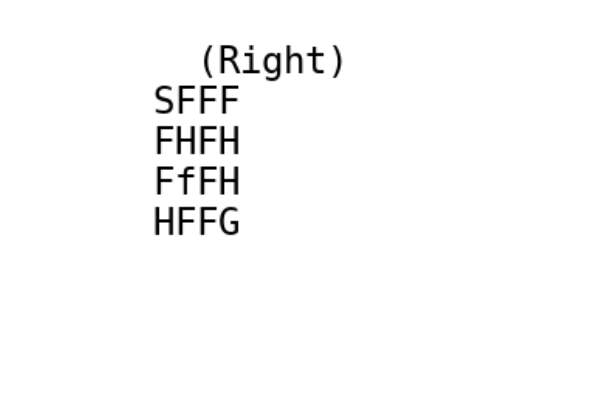
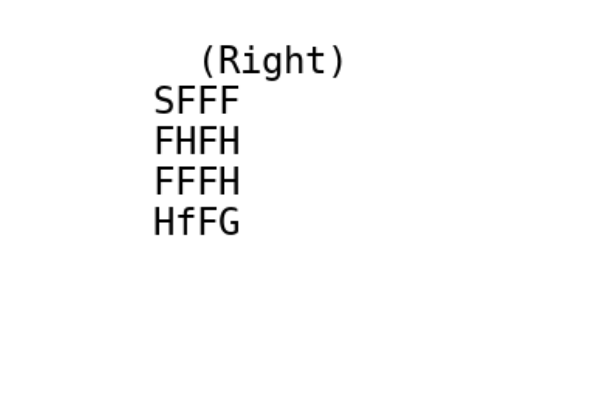
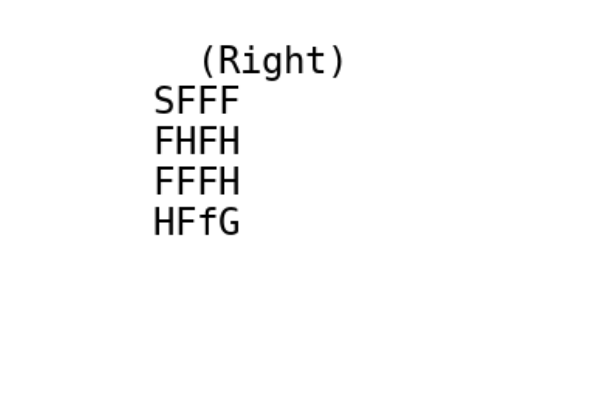
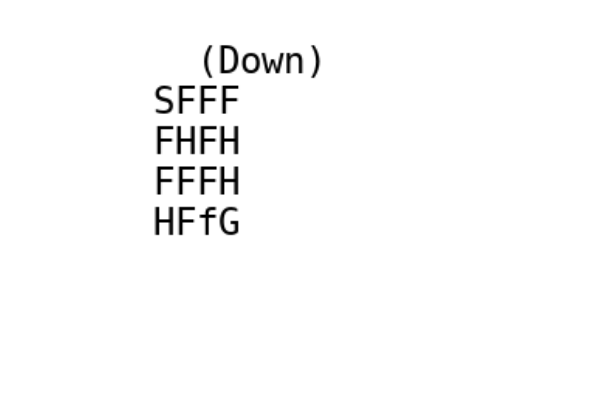
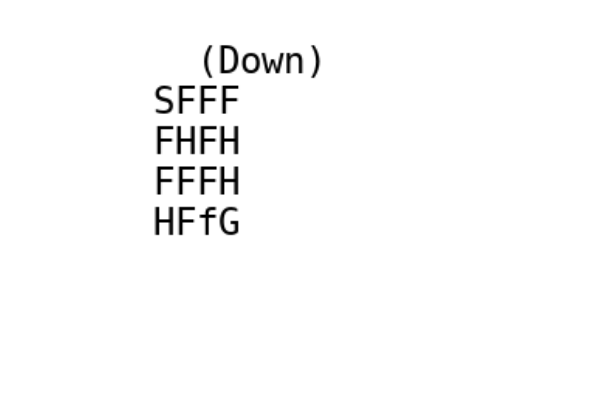
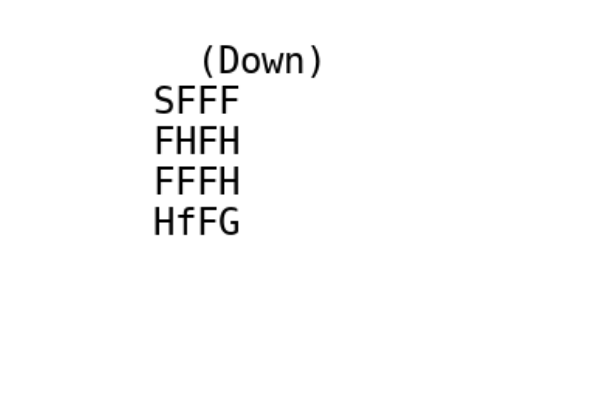
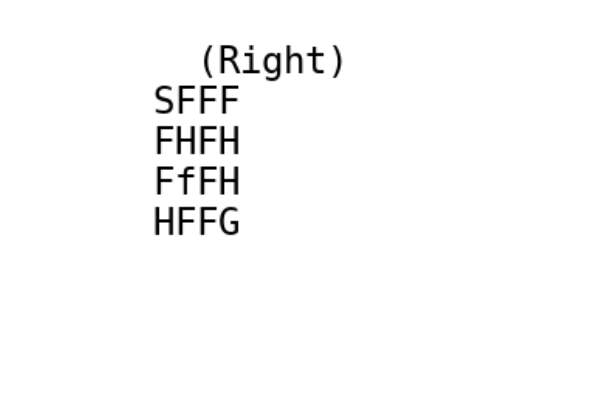
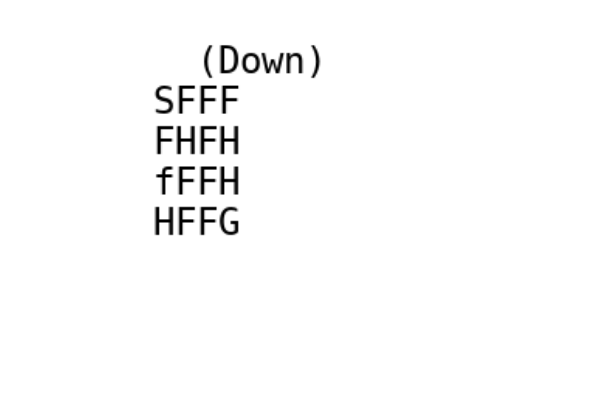
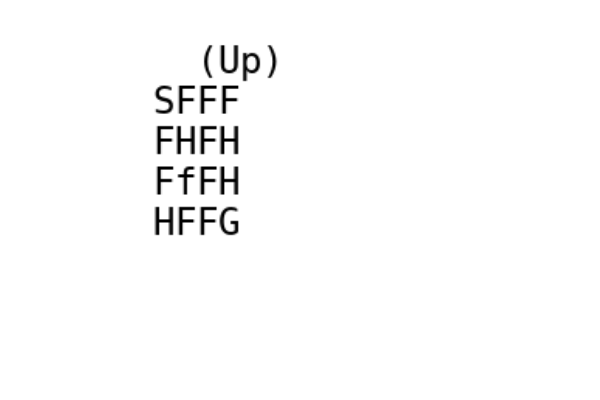
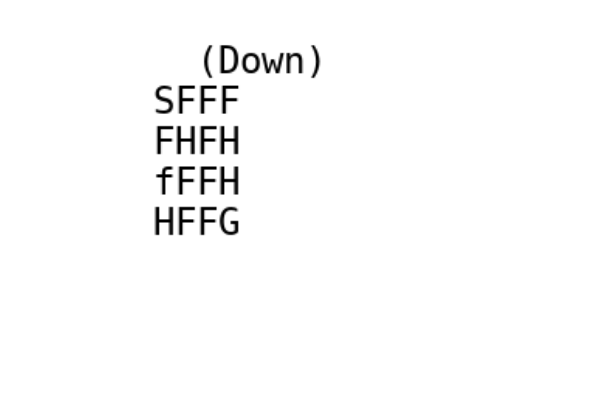
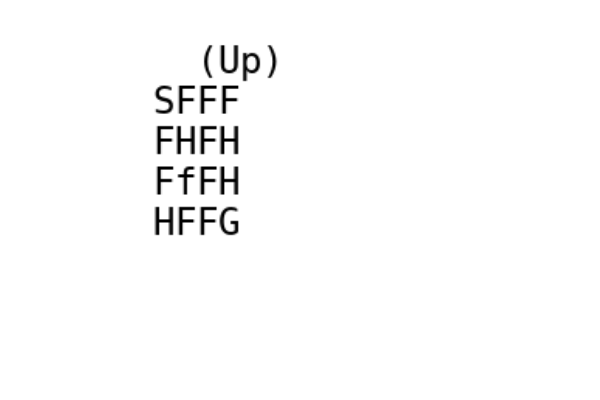
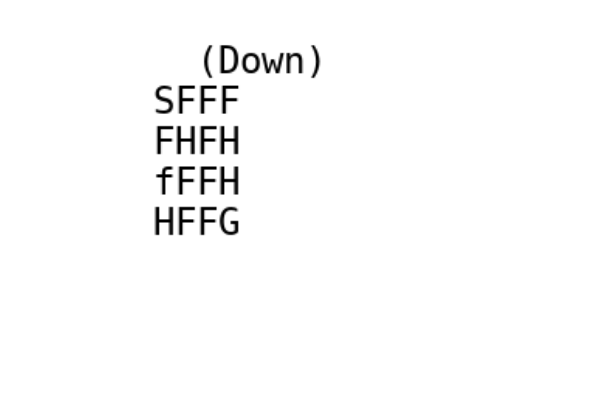
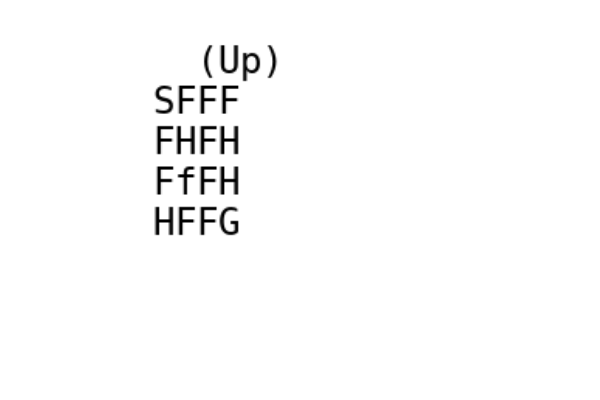
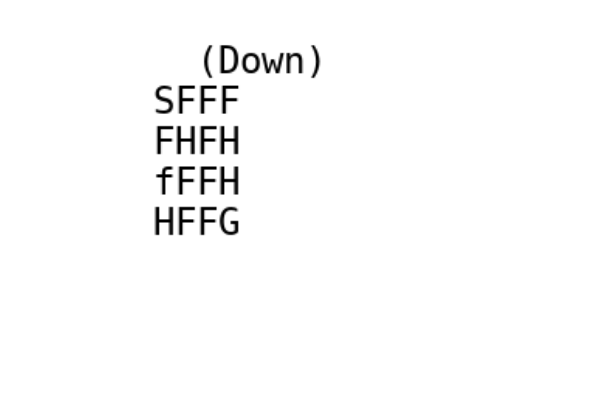
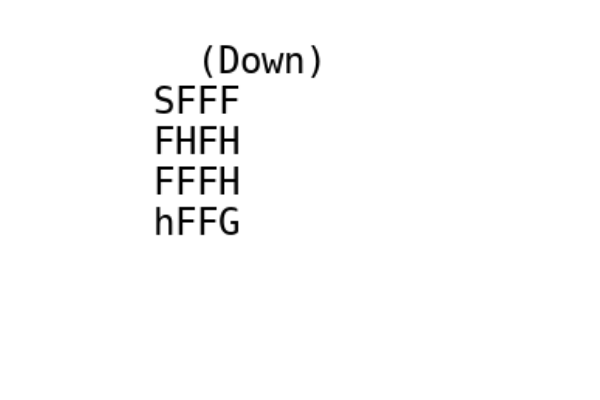
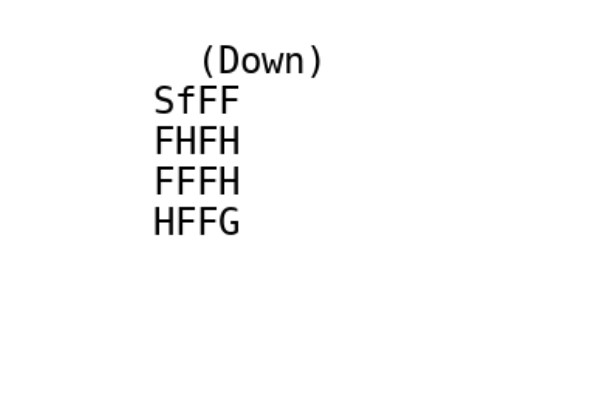
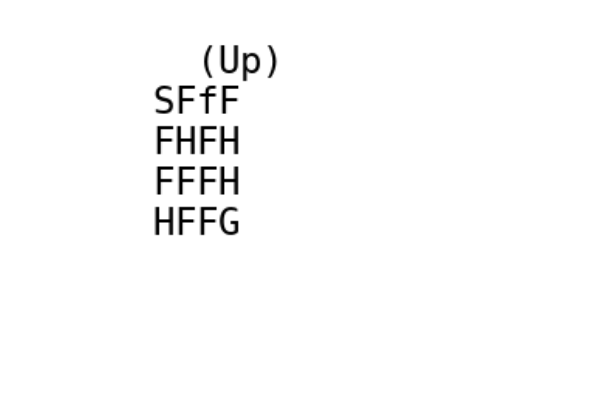
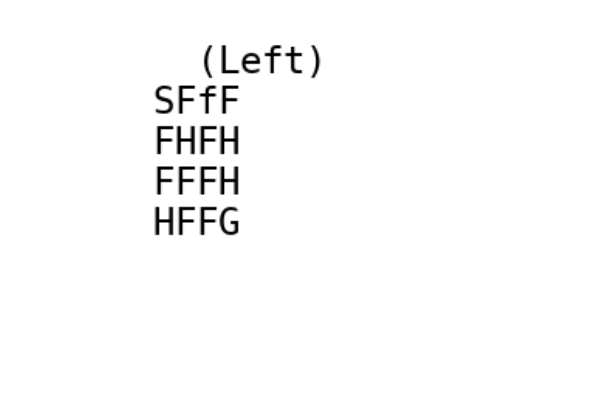
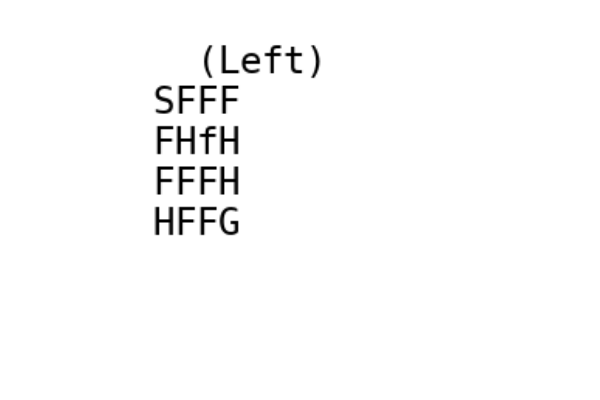
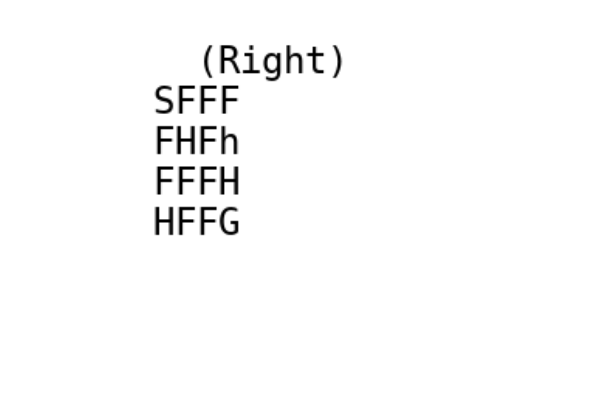
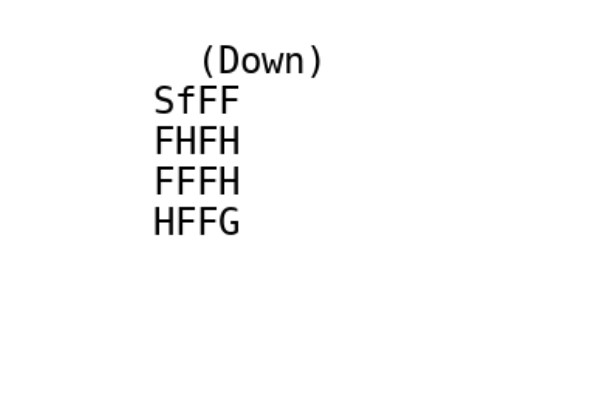
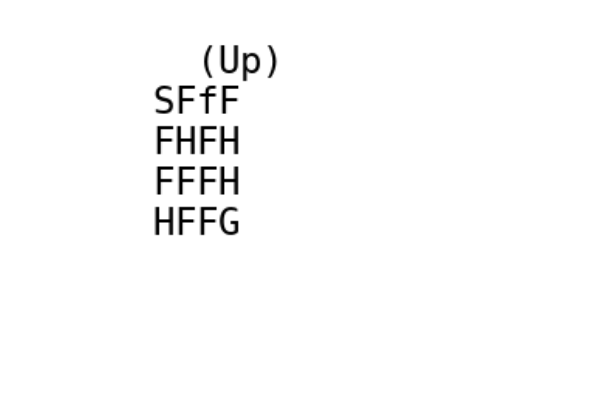
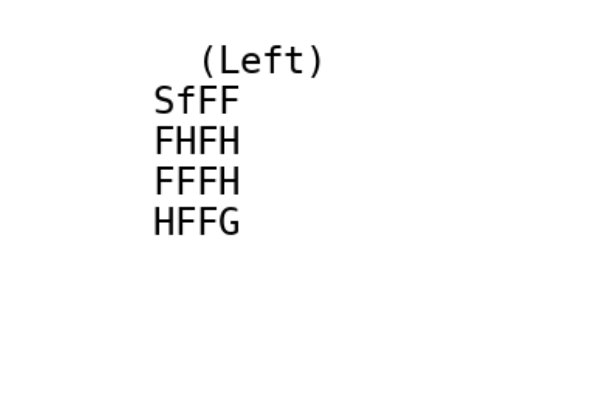
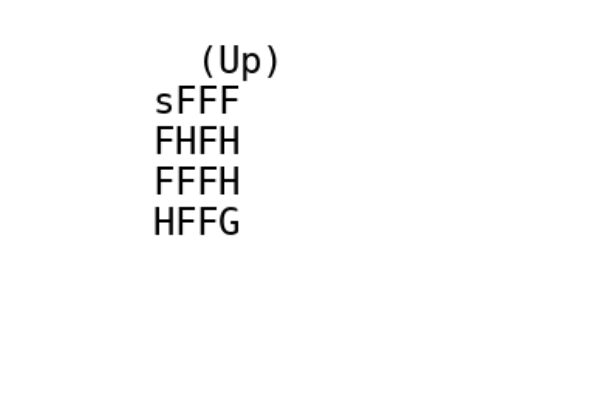
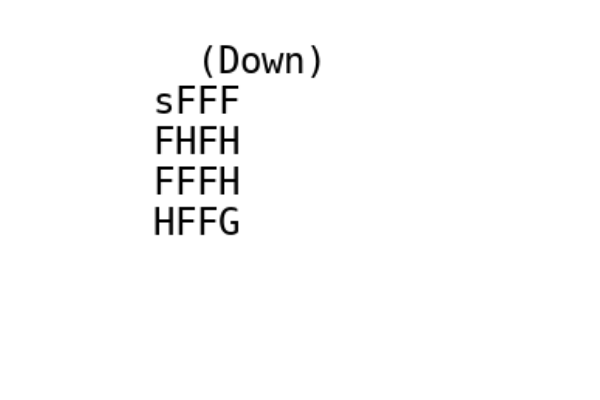
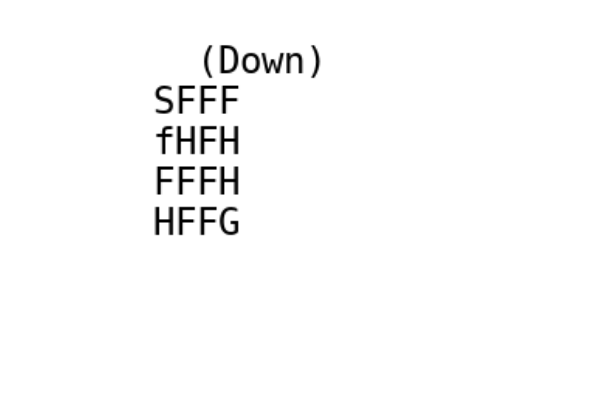
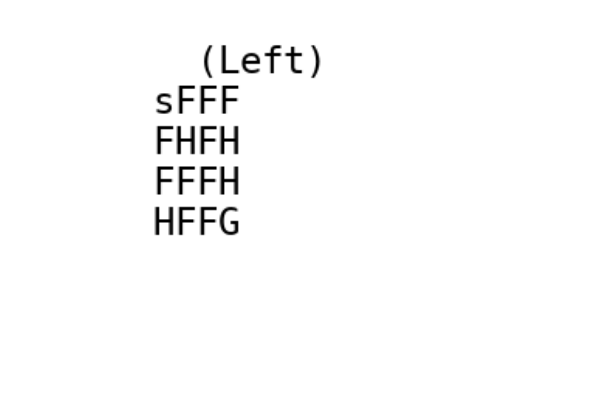
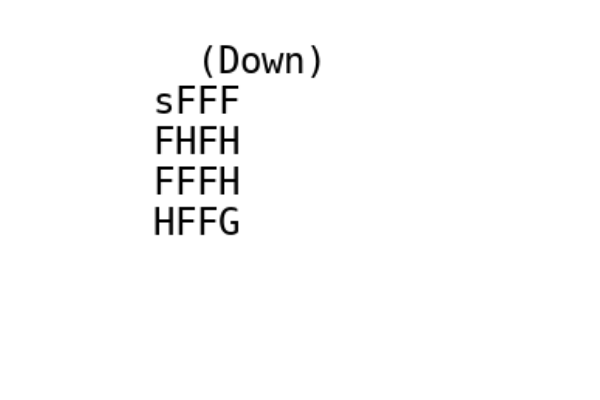
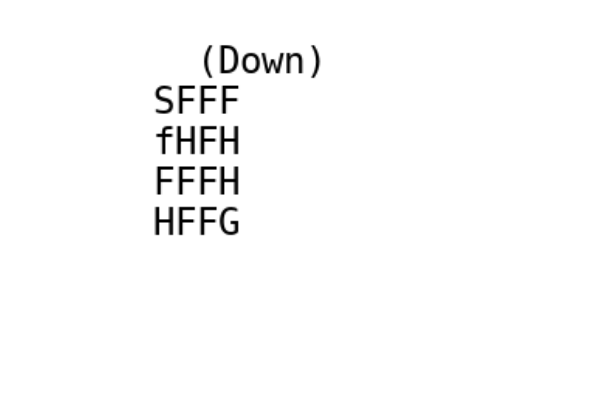
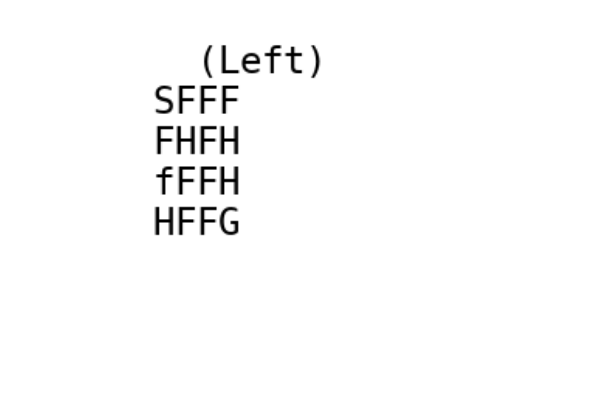
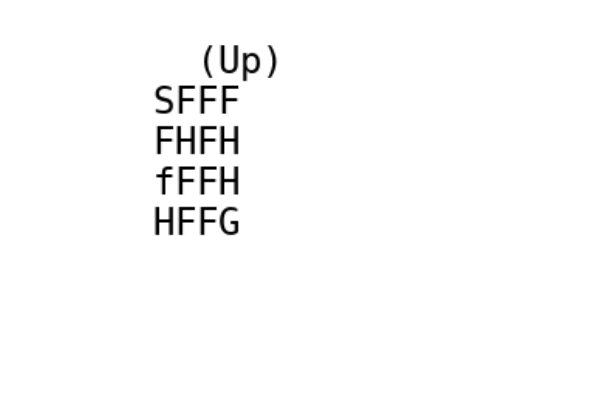
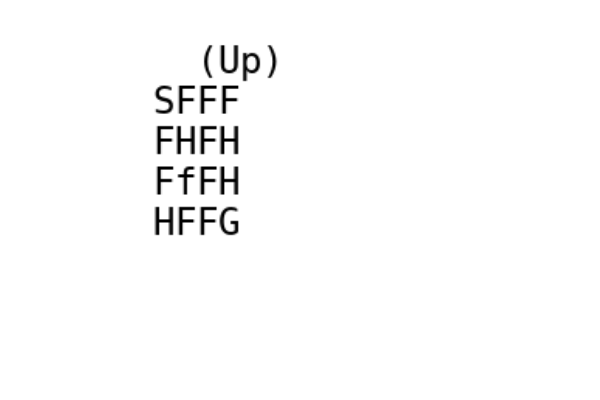
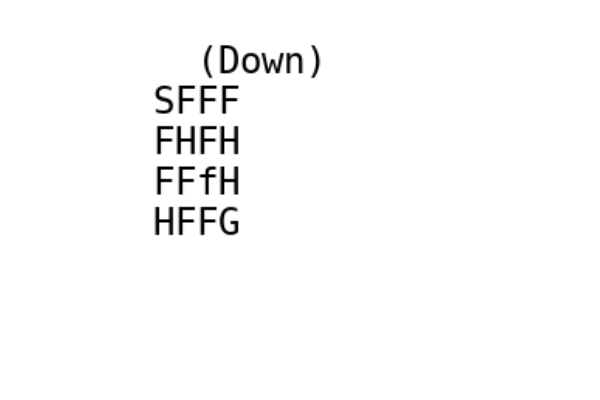
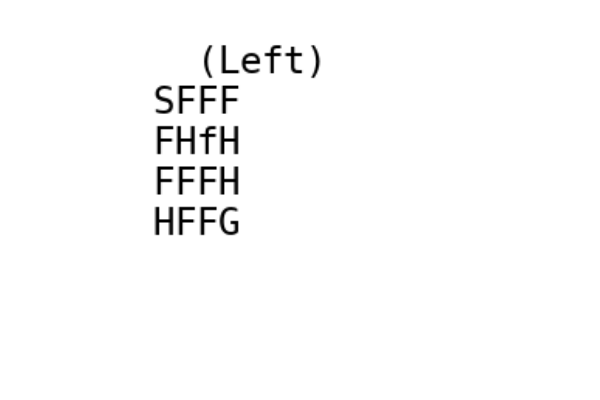
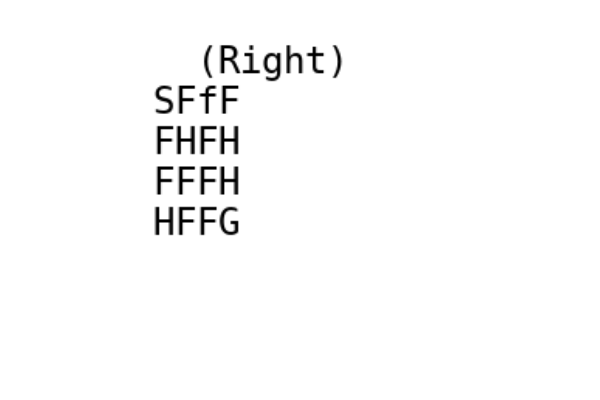
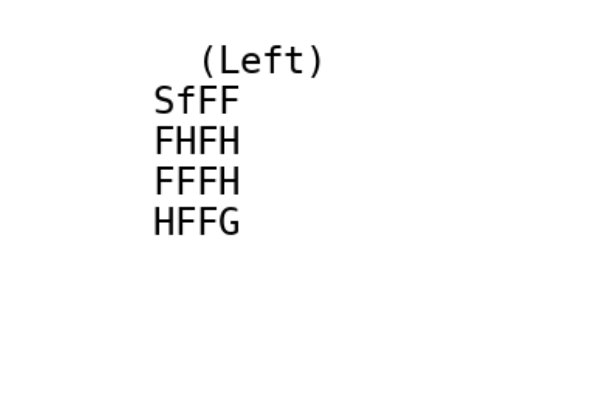
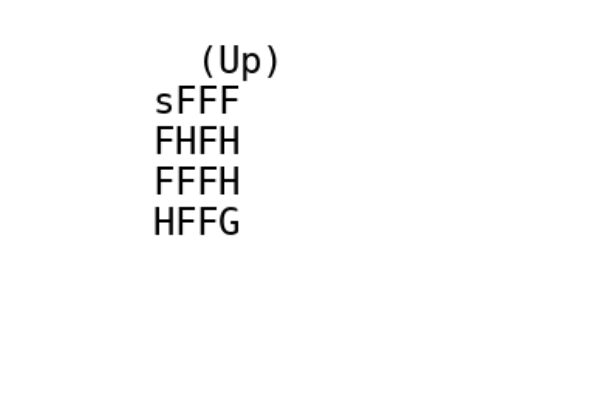
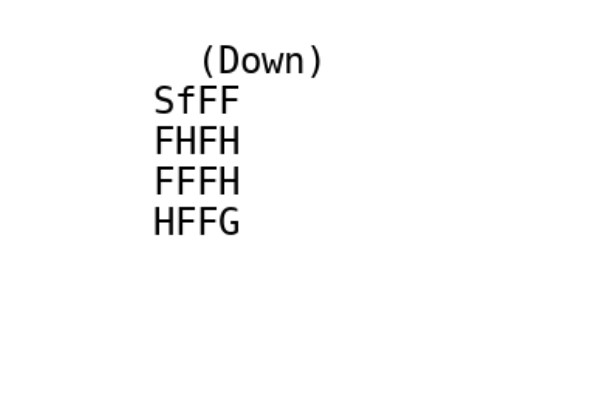
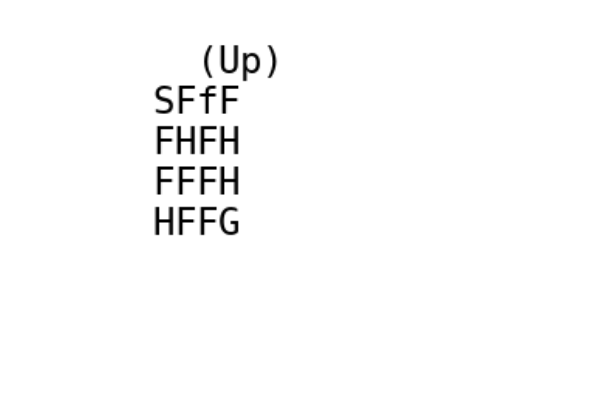
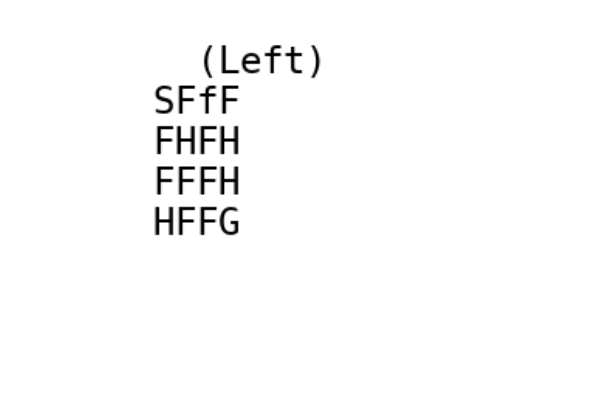

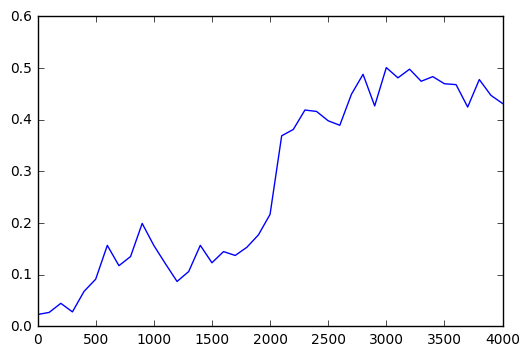

In [109]:
from tabular_q_agent import TabularQAgent

def train_tabular_q_agent():
  env = gym.make(ENV)
  agent = TabularQAgent(env.observation_space, env.action_space)
  learn_rewards = agent.learn(env)
  return agent, learn_rewards

q_agent, reward_history = train_tabular_q_agent()
plt.plot(reward_history[0], reward_history[1])
plt.figure()
q_agent_policy = np.empty((4, 4))
for r in range(4):
  for c in range(4):
    q_agent_policy[r, c] = np.argmax(q_agent.q[4 * r + c])
print(q_agent_policy)

def test_agent(agent):
  env = gym.make(ENV)
  obs = env.reset()
  frames = []
  for i in range(200):
    action = agent.act(obs)
    obs2, reward, done, _ = env.step(action)
    
    env_text = env.render(mode=RENDER_MODE[ENV]).getvalue()
    frames.append(render.text_to_array(env_text))
    
    if done:
      obs2 = env.reset()
    obs = obs2
  env.render(close=True)
  render.display_frames_as_gif(frames)
  
test_agent(q_agent)

[2017-09-10 23:51:26,750] Making new env: FrozenLake-v0


0 0.0
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  1.]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 1 0]]
192 1.0
[[ 0.02023347  0.01851356  0.02982173  0.01750406]
 [ 0.02830065  0.          0.05628086  0.        ]
 [ 0.0562831   0.12387217  0.1786259   0.        ]
 [ 0.          0.22387681  0.48142439  1.01821012]]
[[0 3 0 3]
 [0 0 0 0]
 [3 1 0 0]
 [0 2 1 0]]
210 1.0
[[ 0.02023347  0.01851356  0.02982173  0.01750406]
 [ 0.02830065  0.          0.05628086  0.        ]
 [ 0.0562831   0.12387217  0.1786259   0.        ]
 [ 0.          0.22387681  0.48142439  1.01821012]]
[[0 3 0 3]
 [0 0 0 0]
 [3 1 0 0]
 [0 2 1 0]]
317 1.0
[[ 0.02023347  0.01851356  0.02982173  0.01750406]
 [ 0.02830065  0.          0.05628086  0.        ]
 [ 0.0562831   0.12387217  0.1786259   0.        ]
 [ 0.          0.22387681  0.48142439  1.01821012]]
[[0 3 0 3]
 [0 0 0 0]
 [3 1 0 0]
 [0 2 1 0]]
469 1.0
[[ 0.02023347  0.01851356  0.02982173  0.01750406]
 [ 0.02830065  0.          0.05628086  


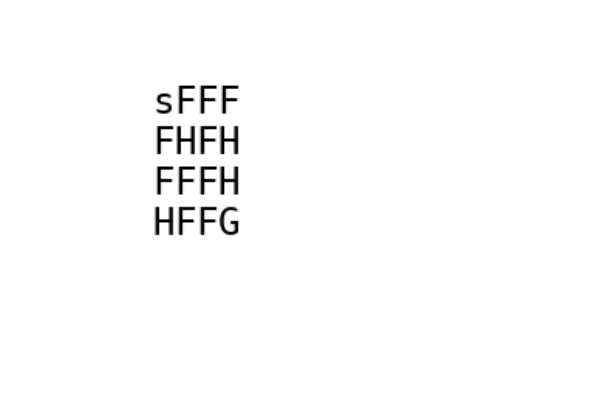
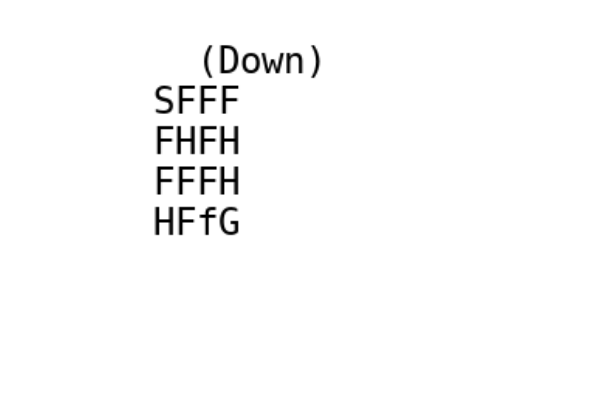
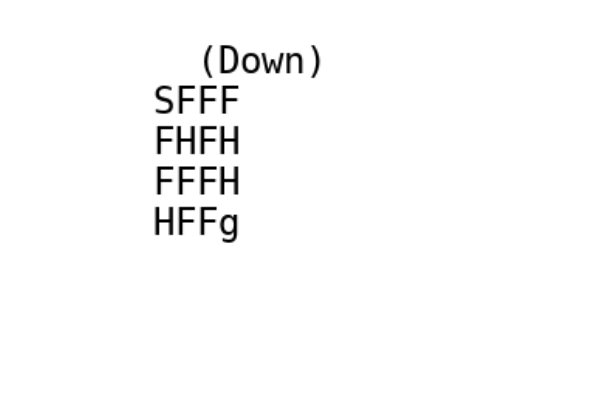
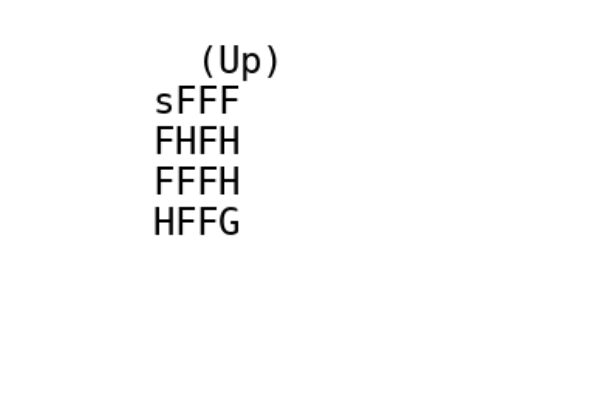
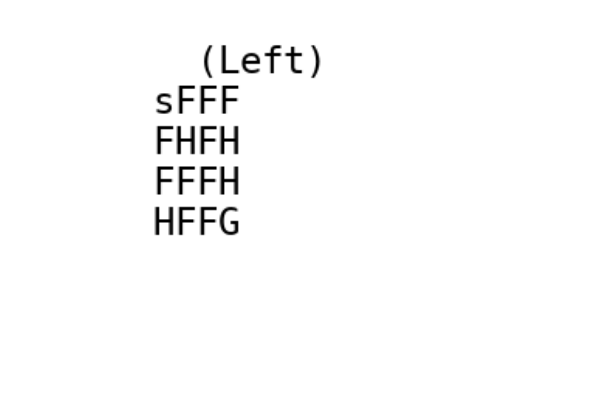
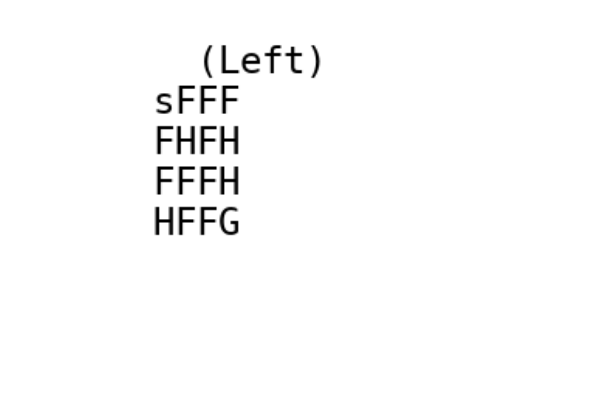
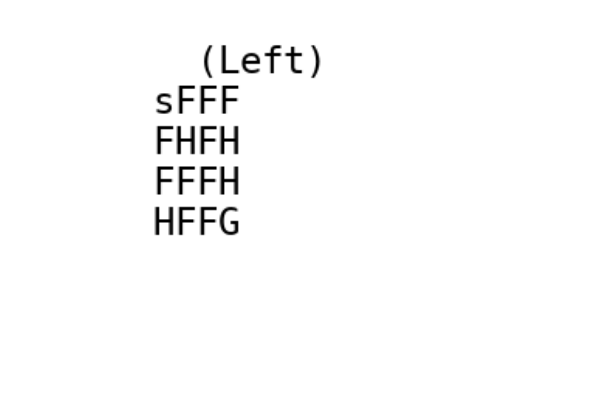
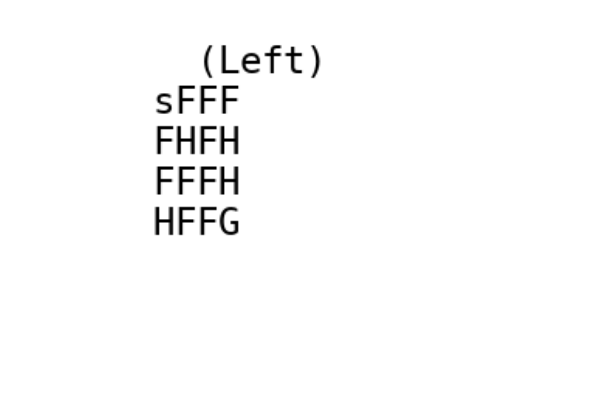
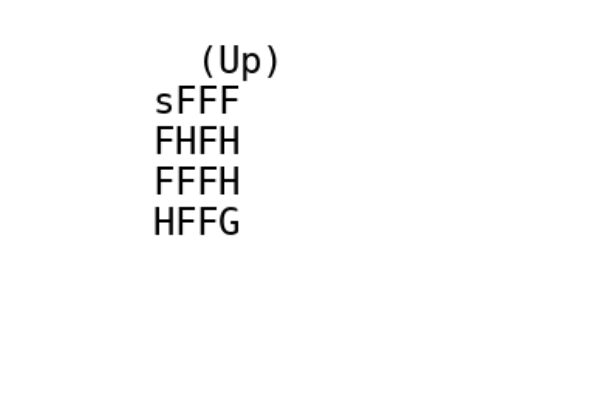
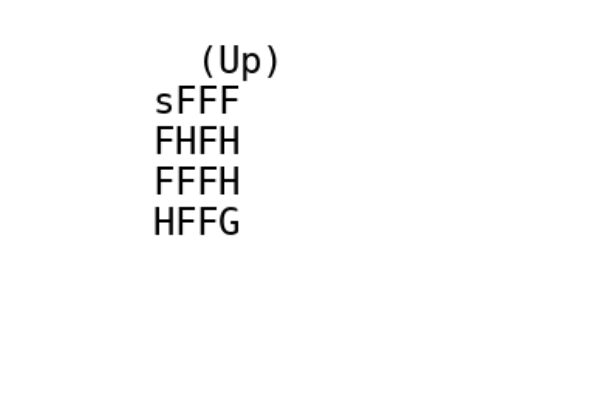
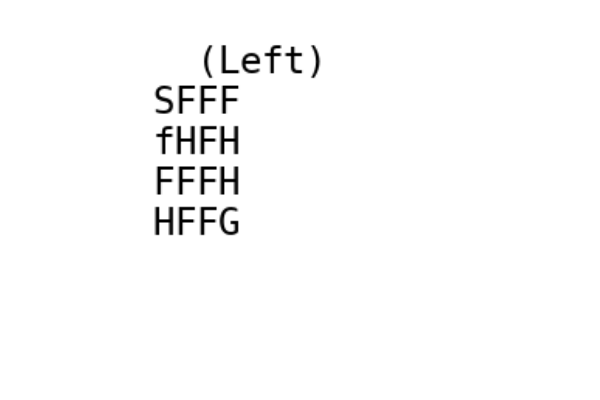
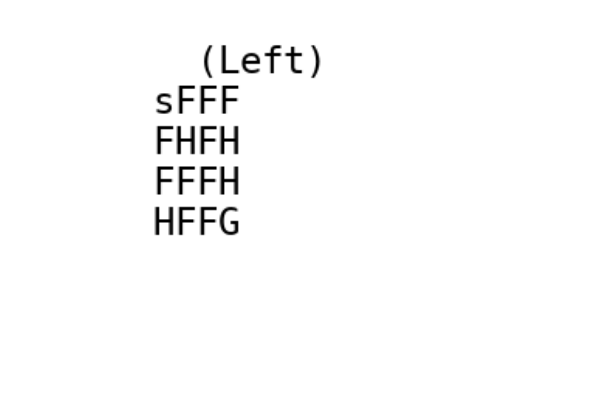
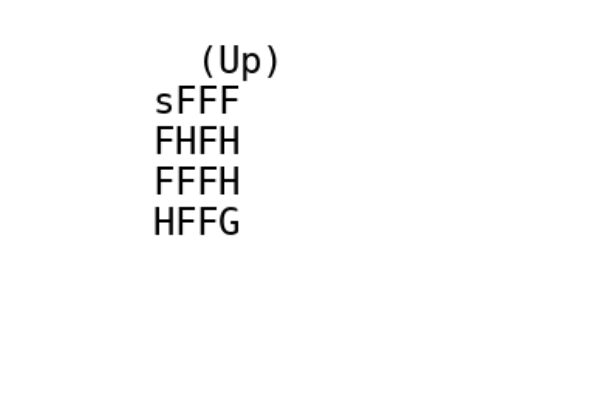
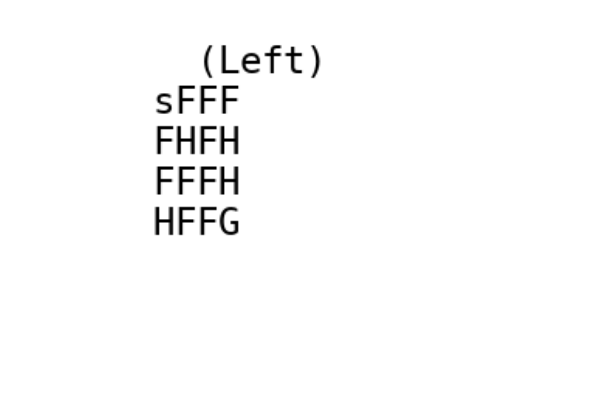
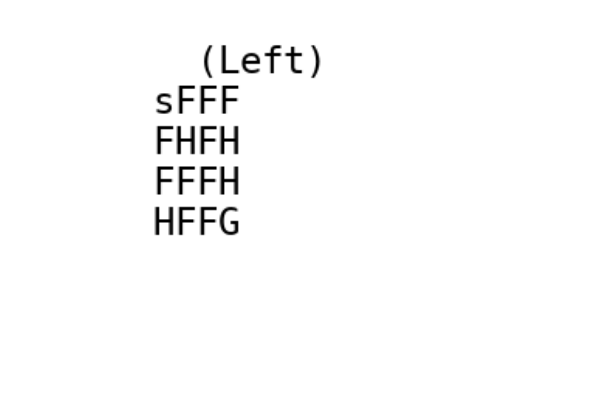
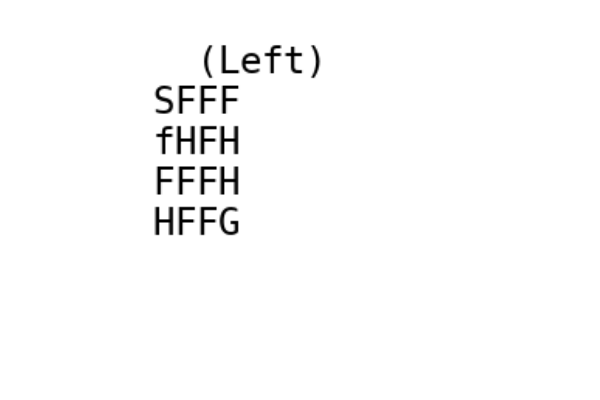
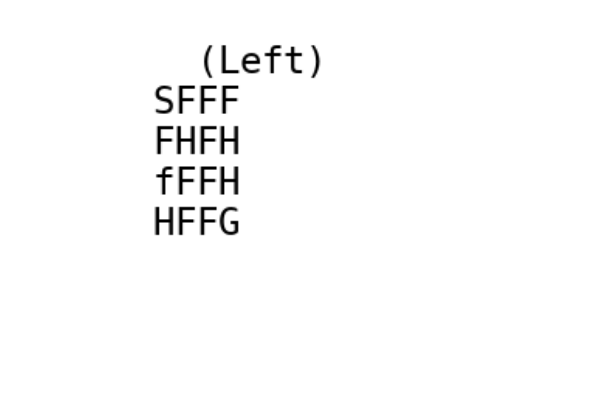
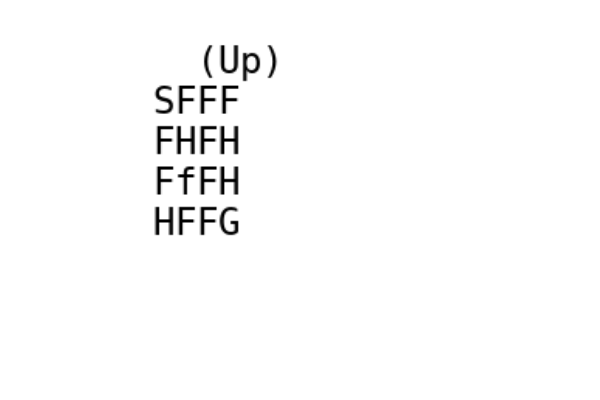
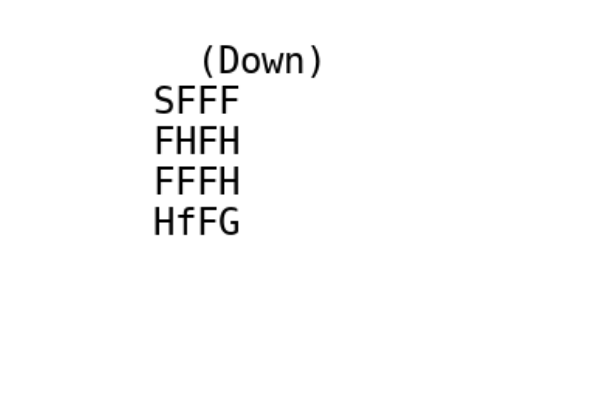
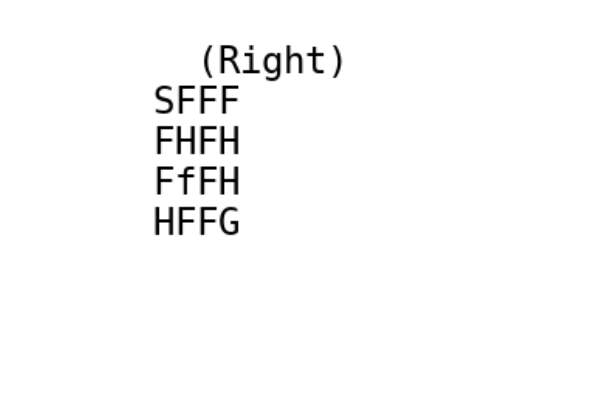
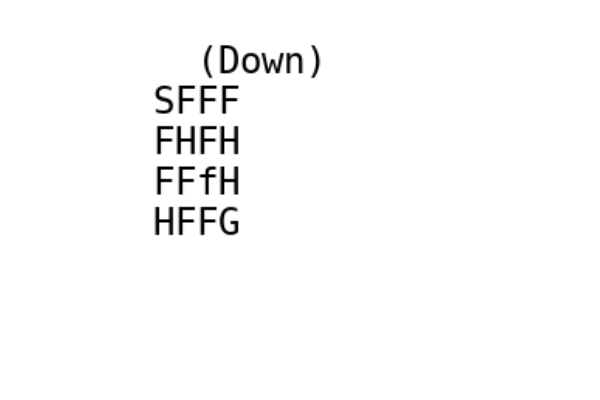
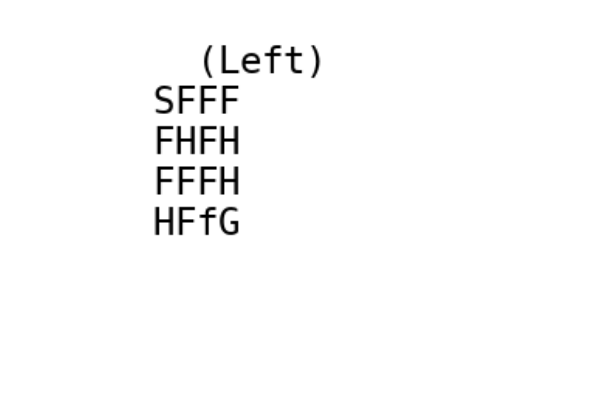
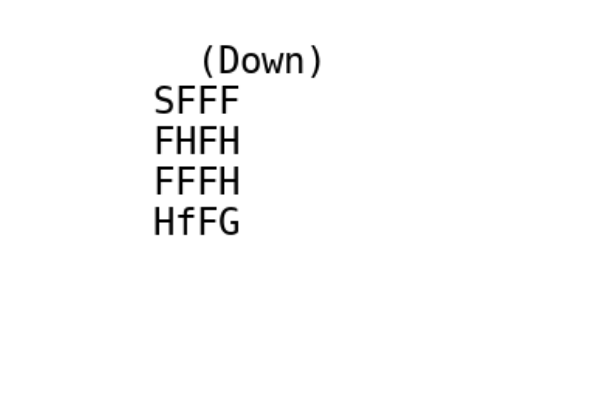
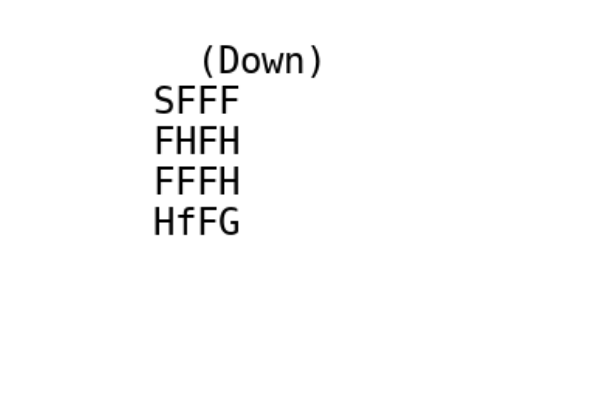
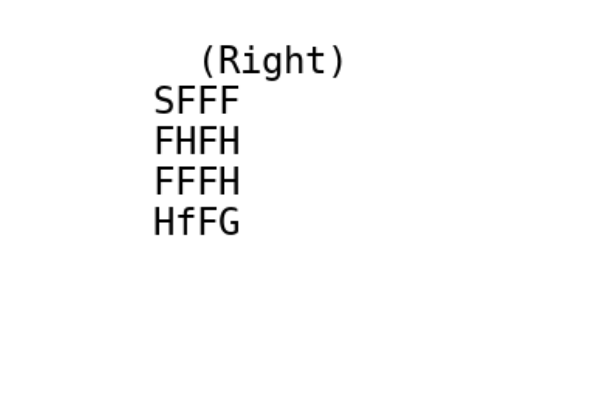
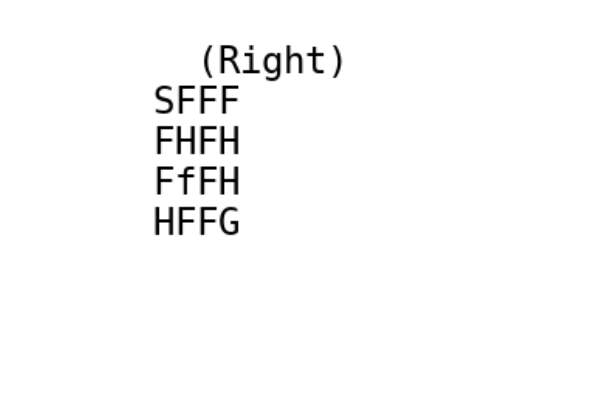
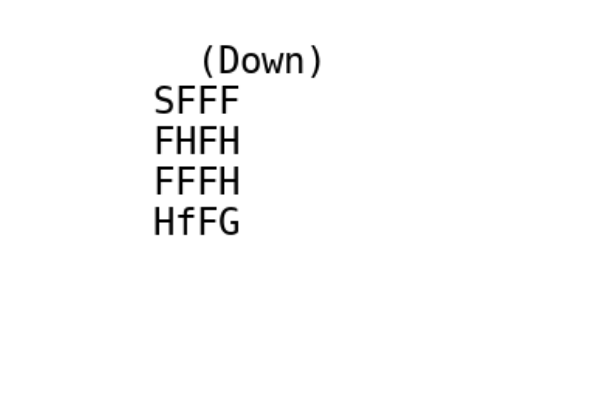
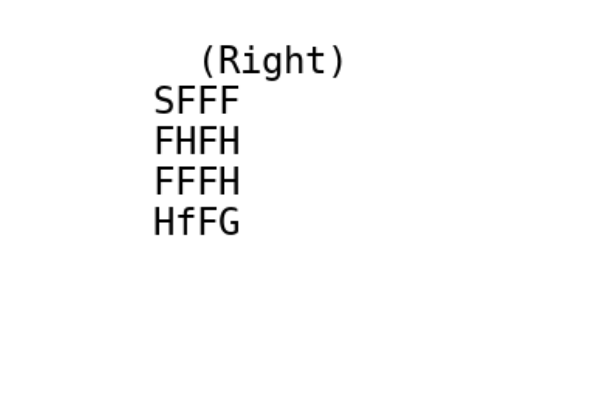
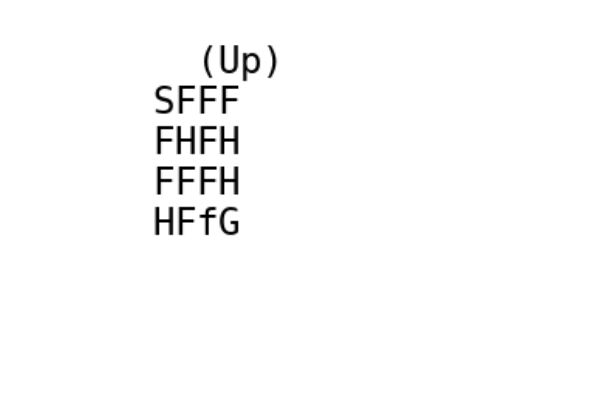
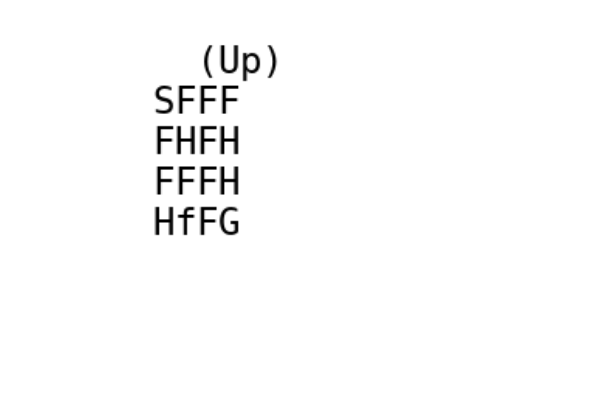
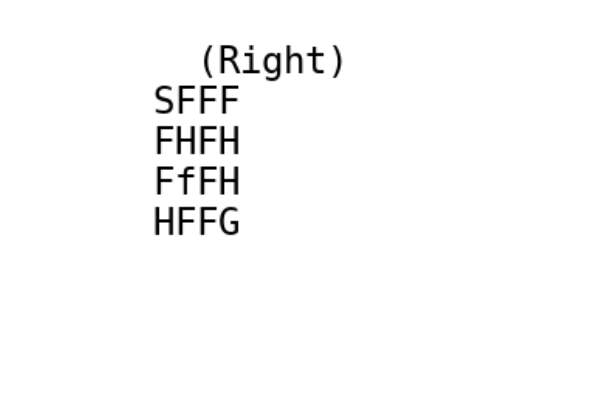
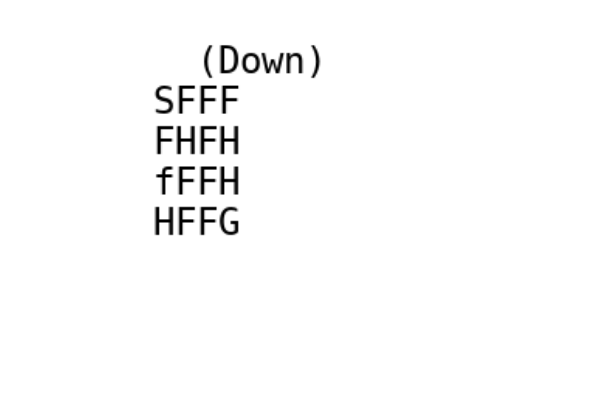
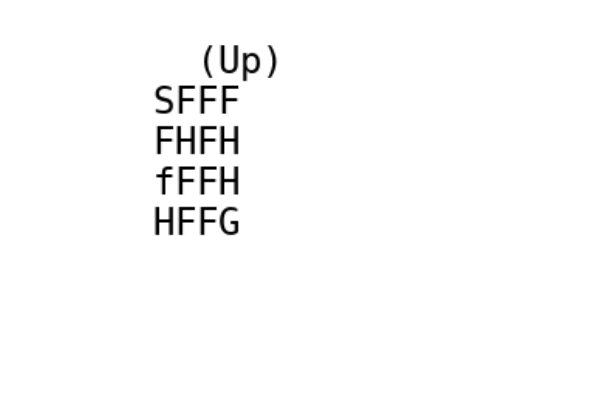
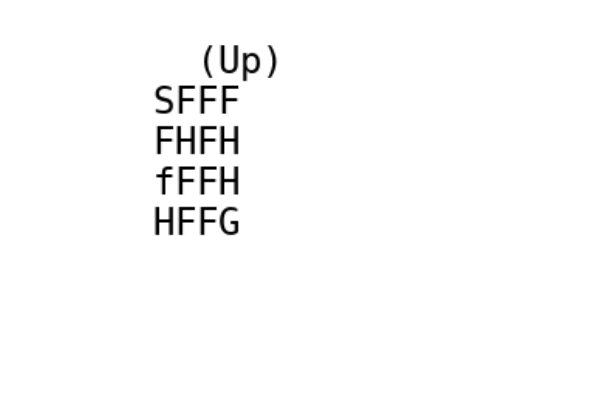
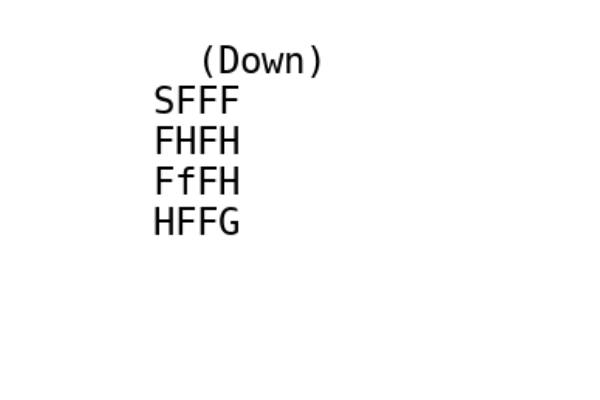
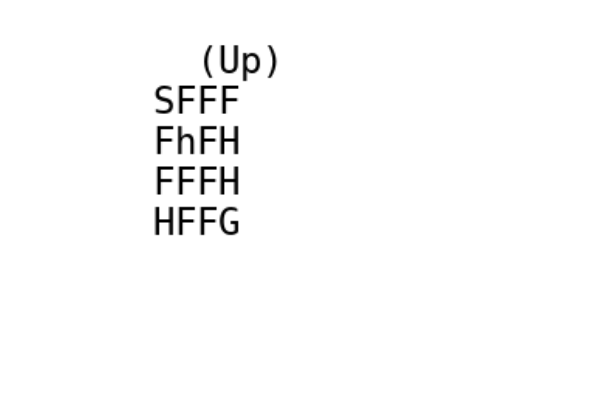
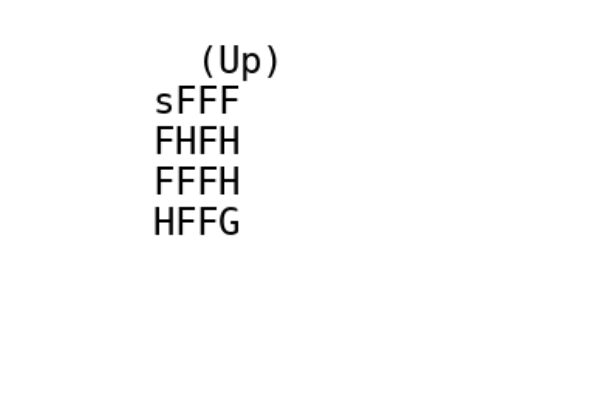
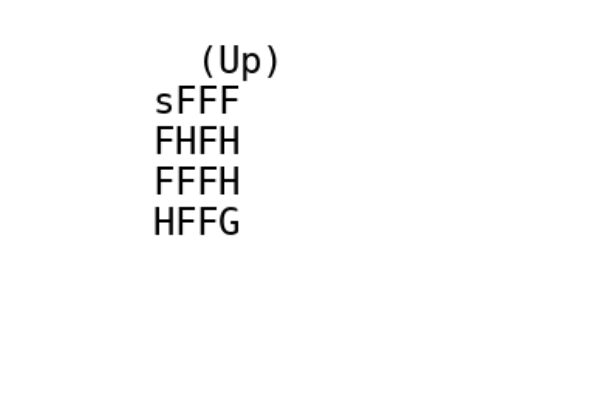
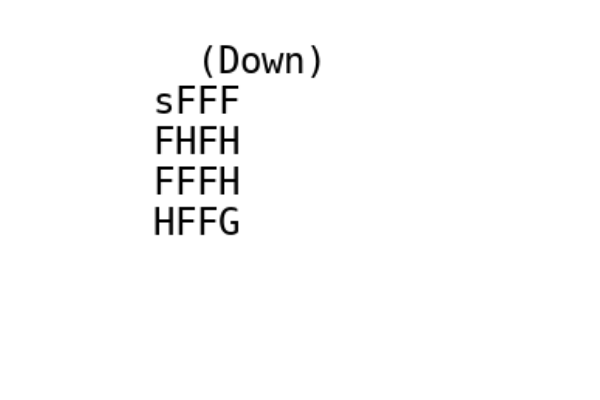
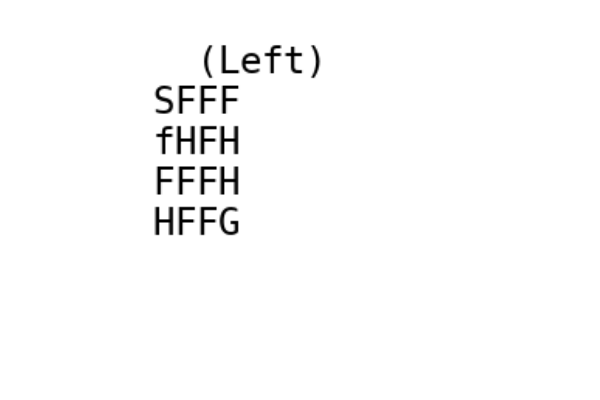
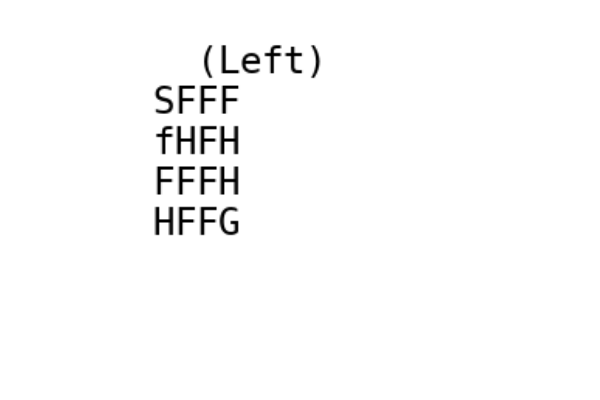
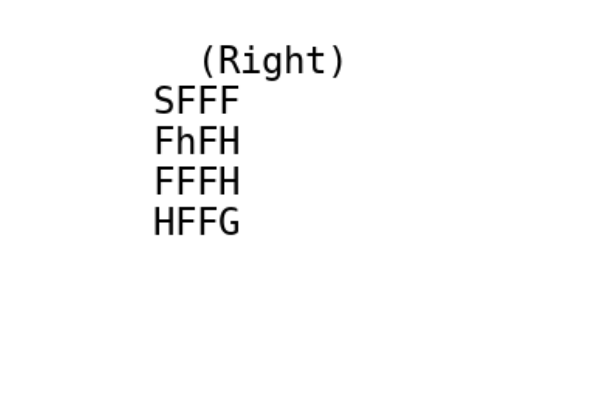
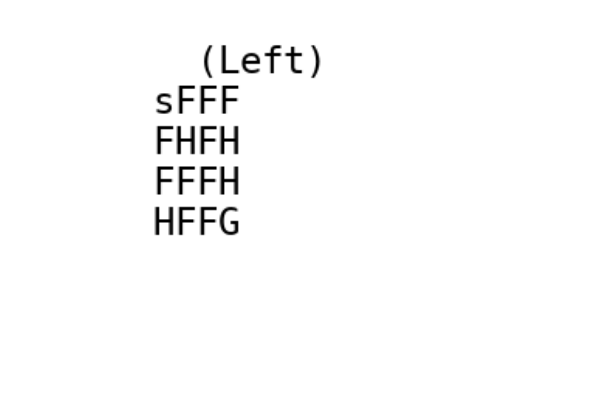
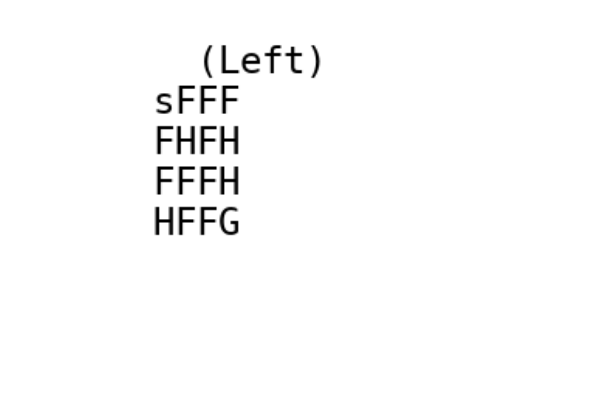
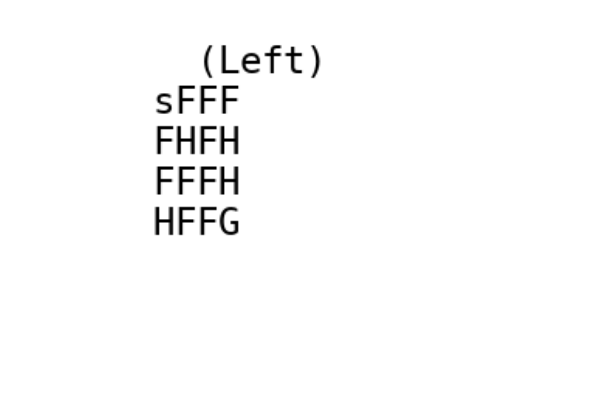
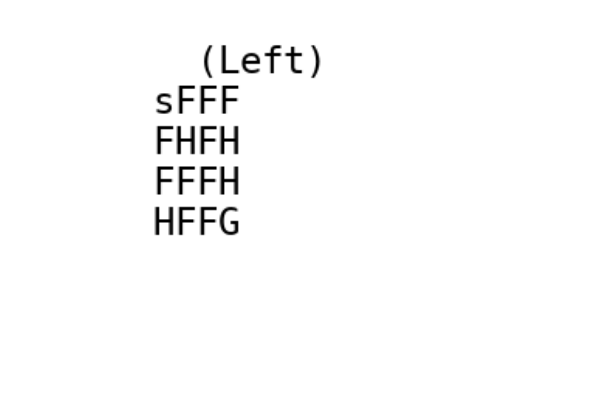
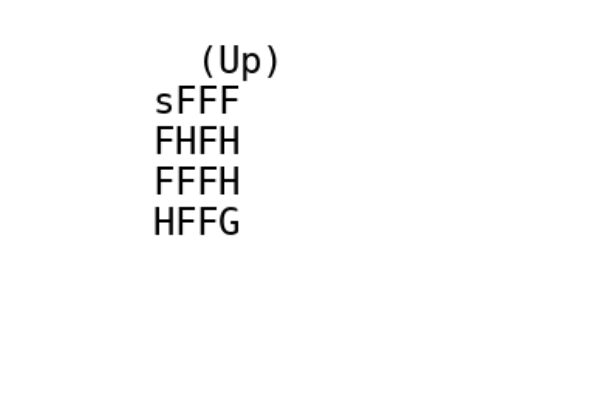
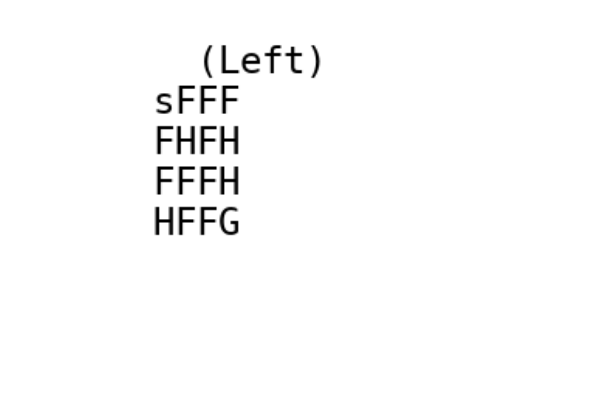
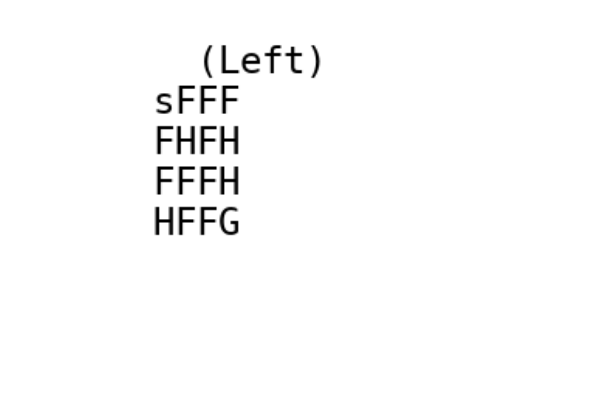
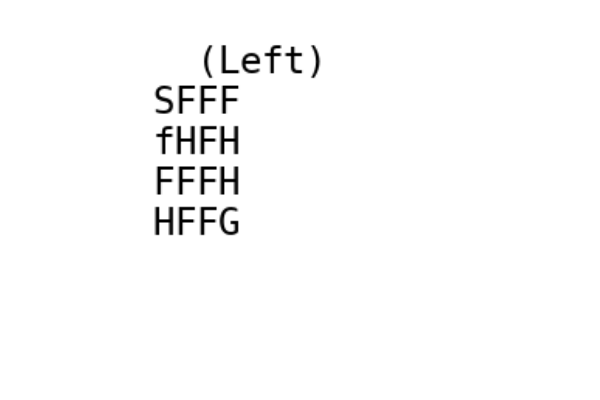
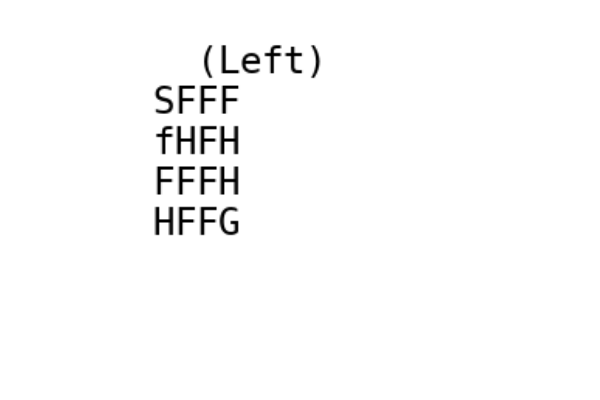
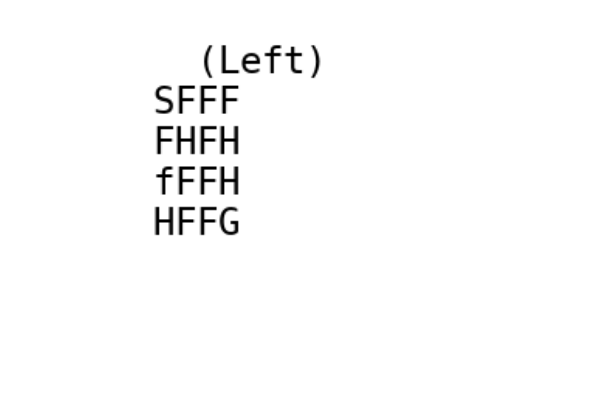
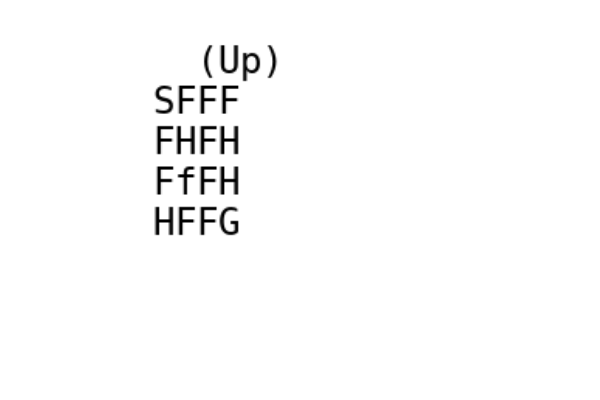
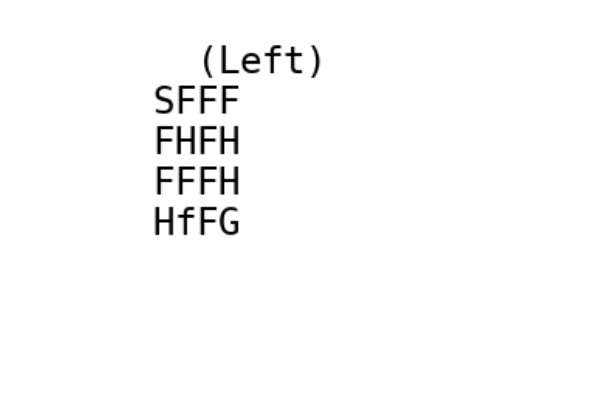
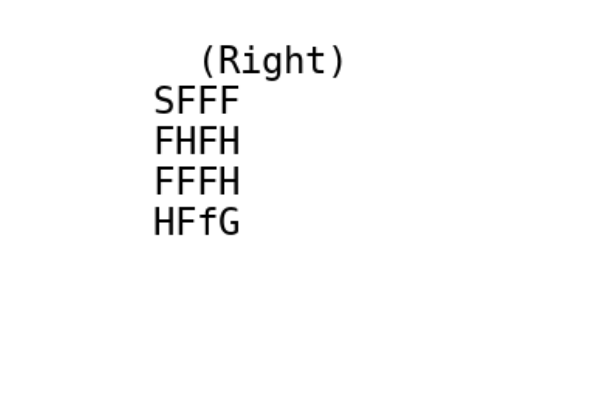
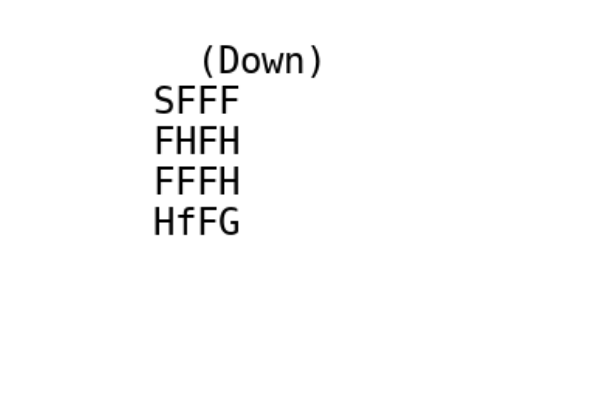
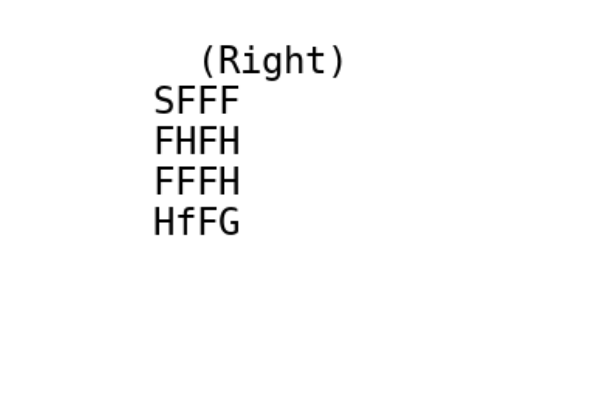
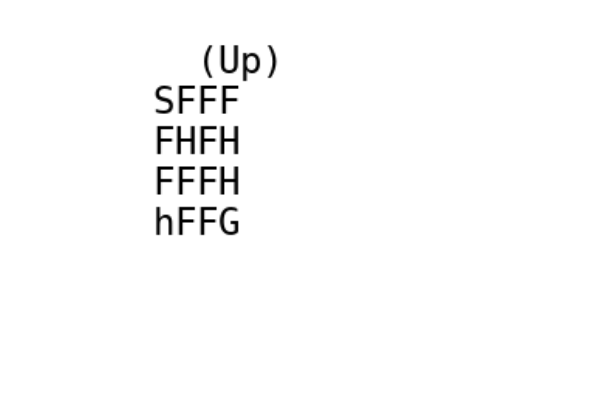
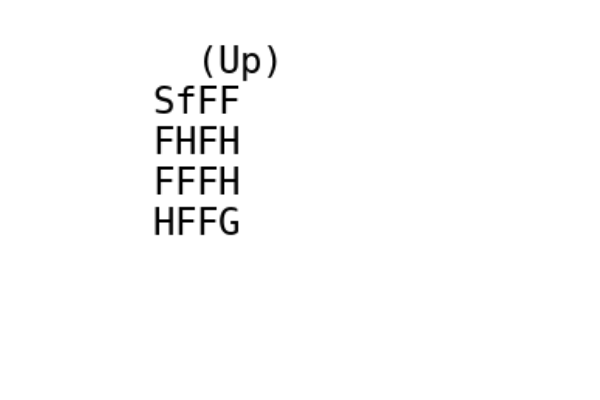
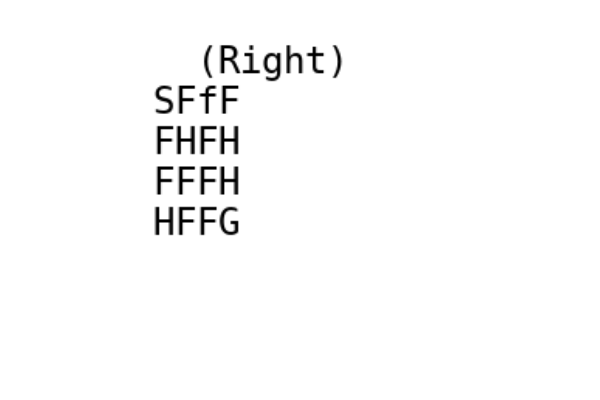
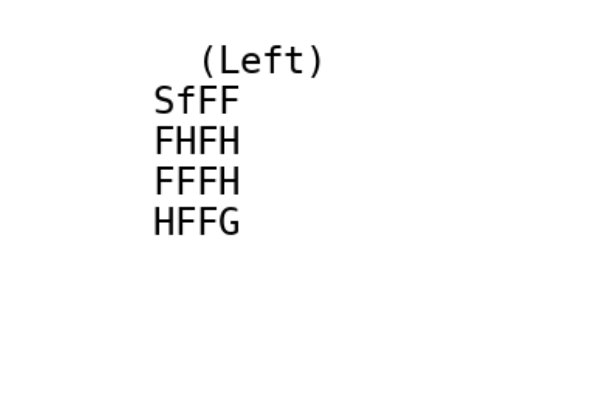
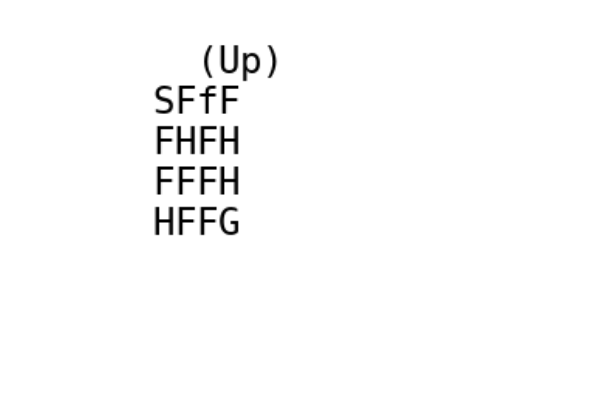
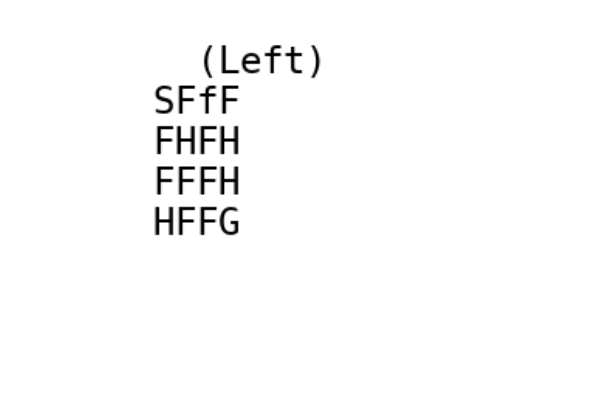
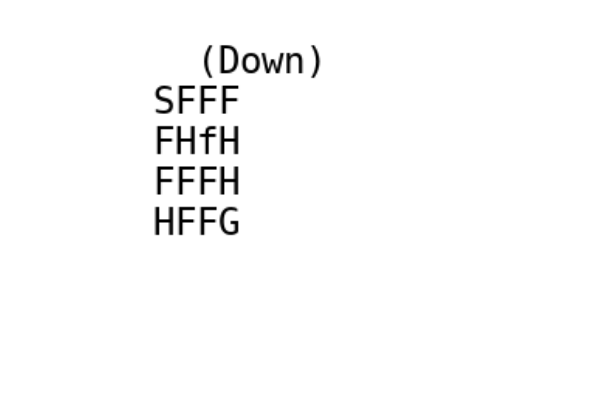
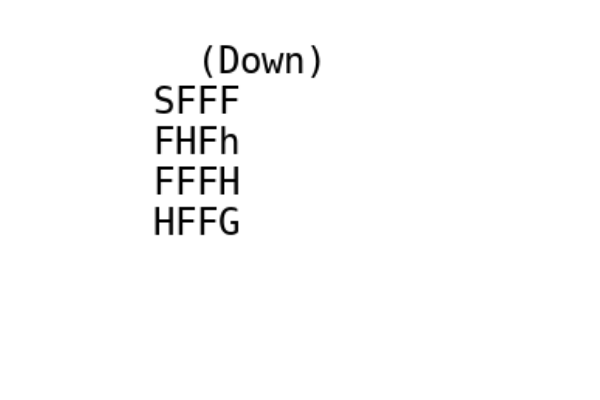
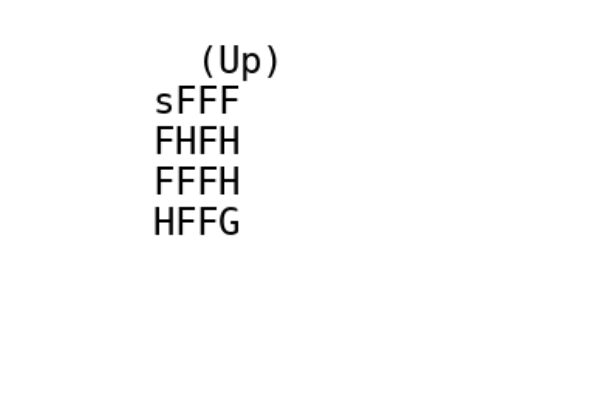
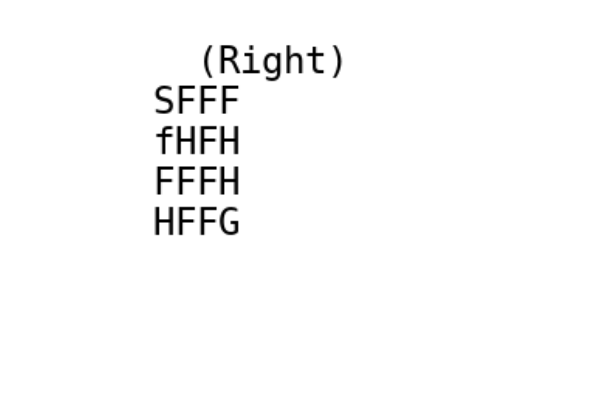
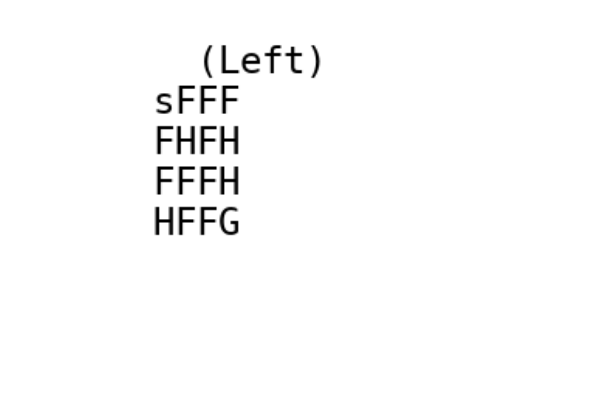
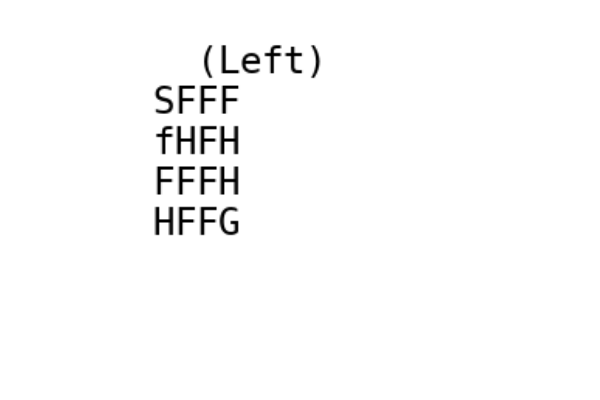
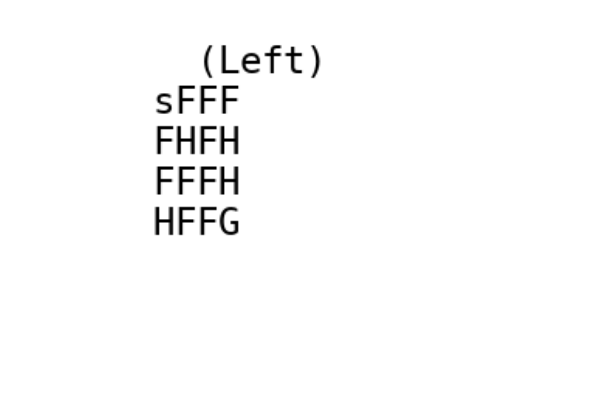
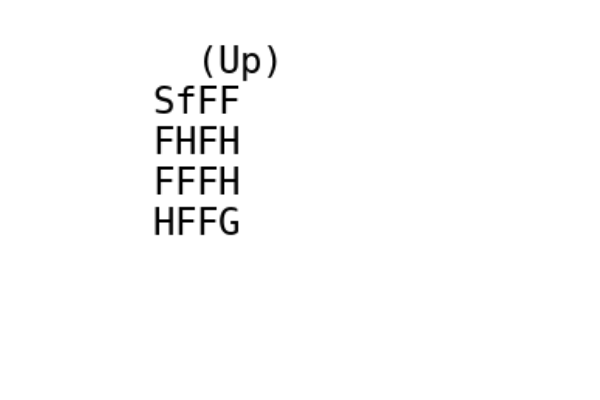
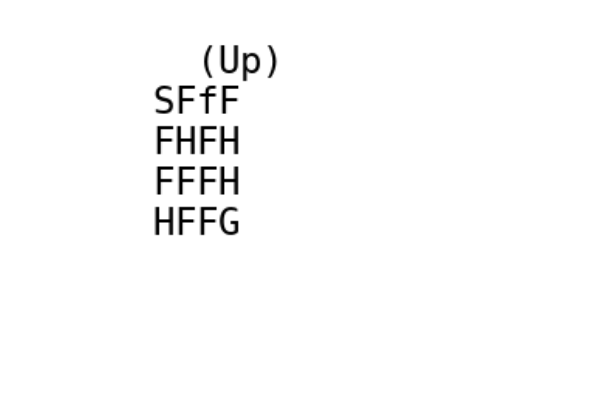
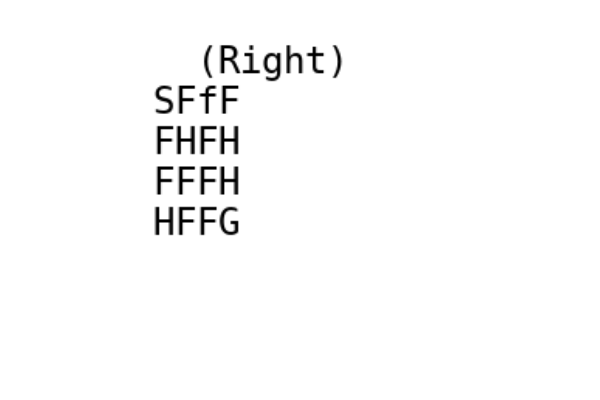
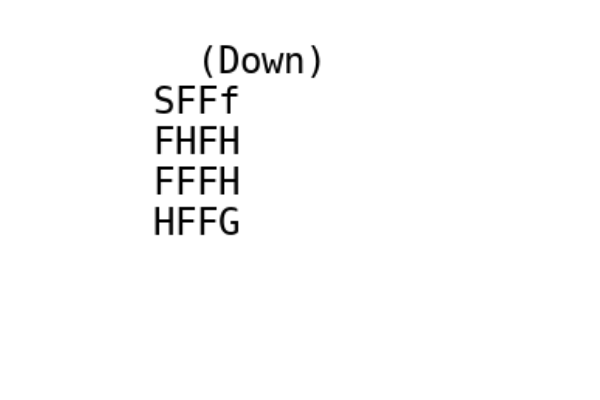
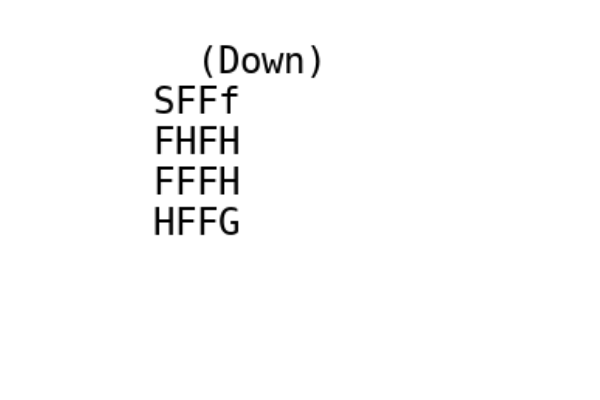
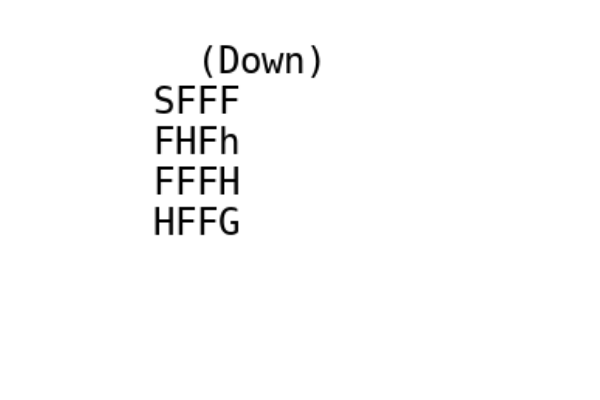
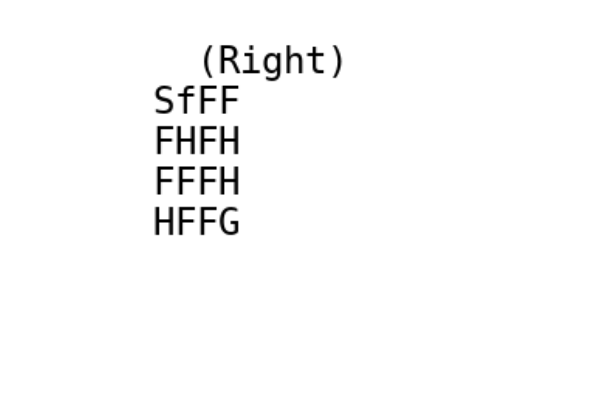
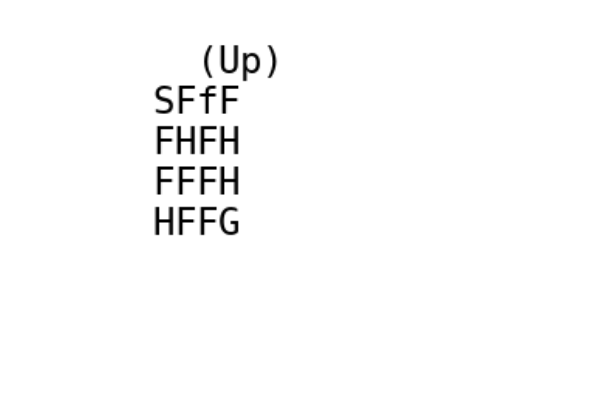
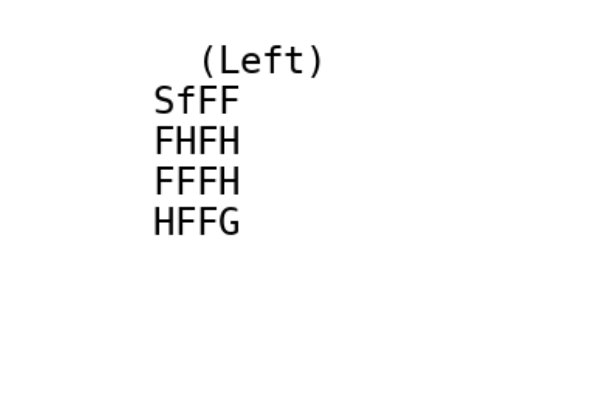
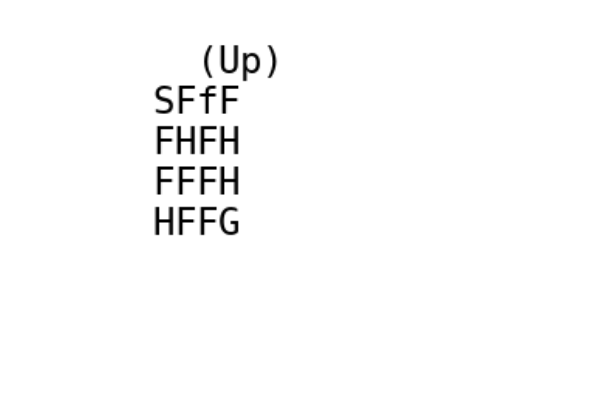
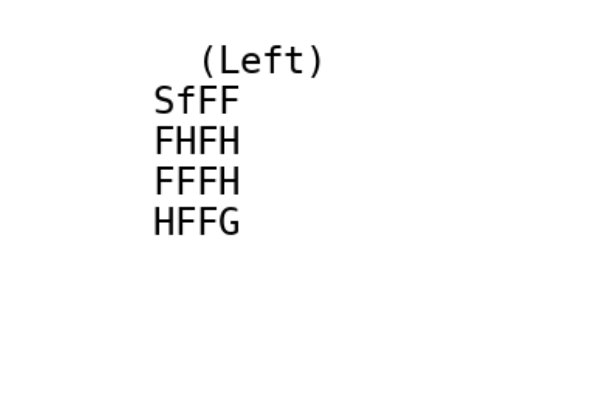
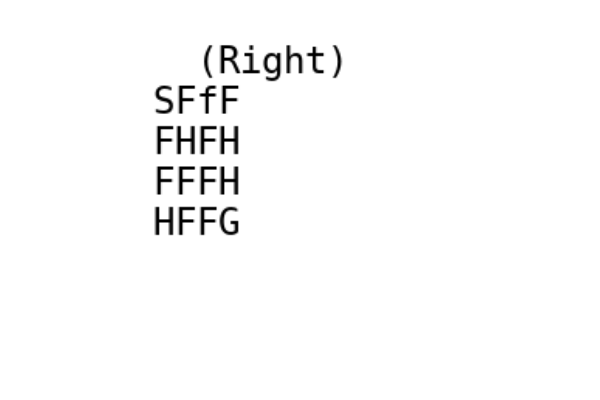
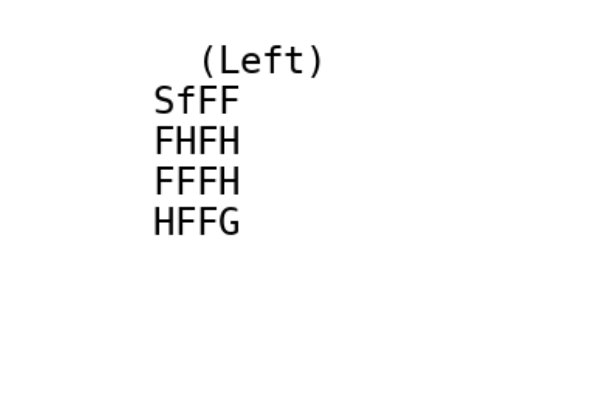
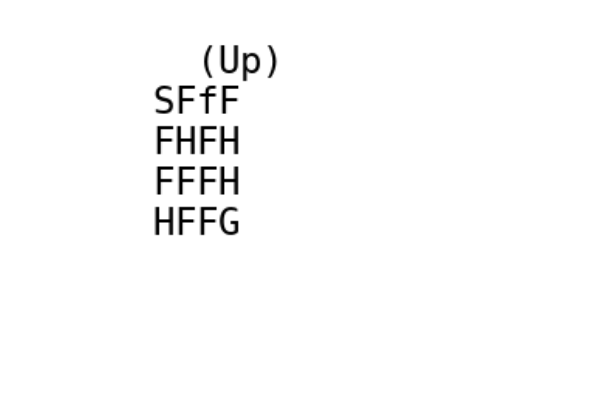
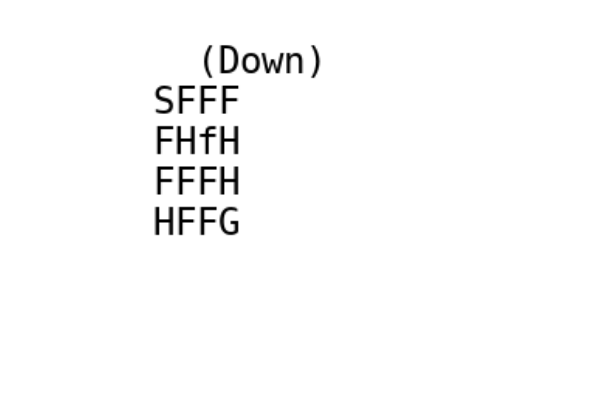
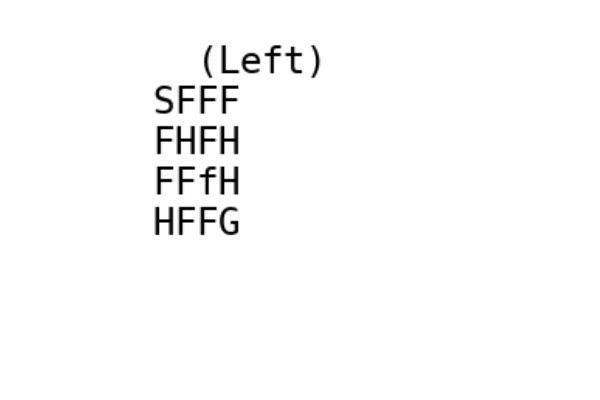
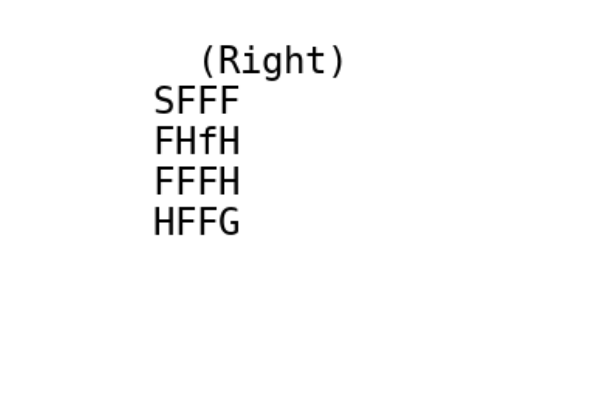
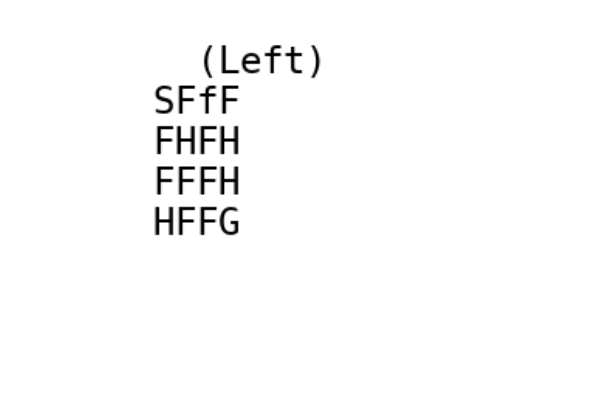
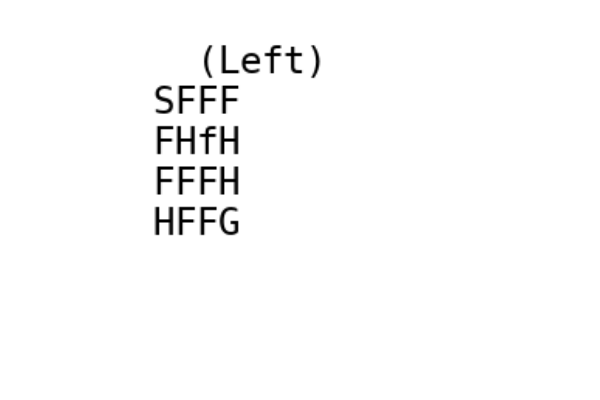
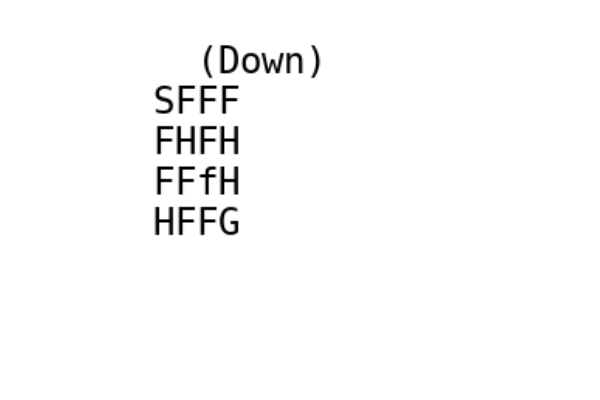
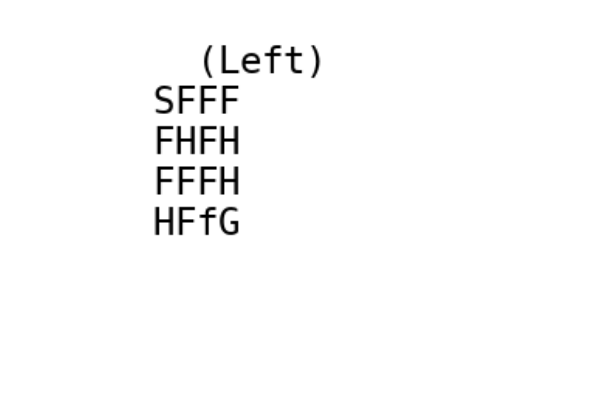
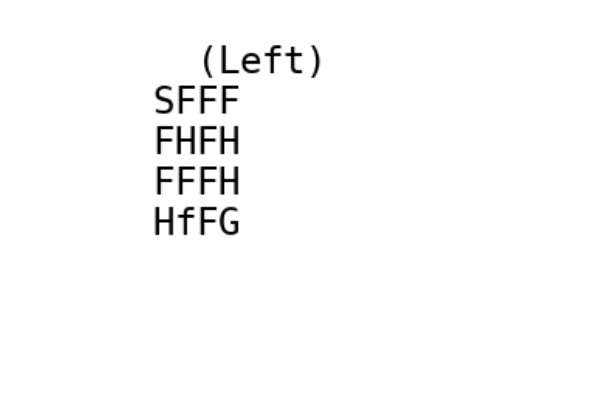
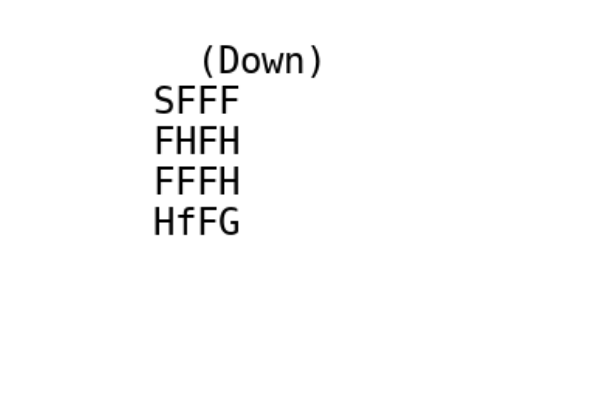
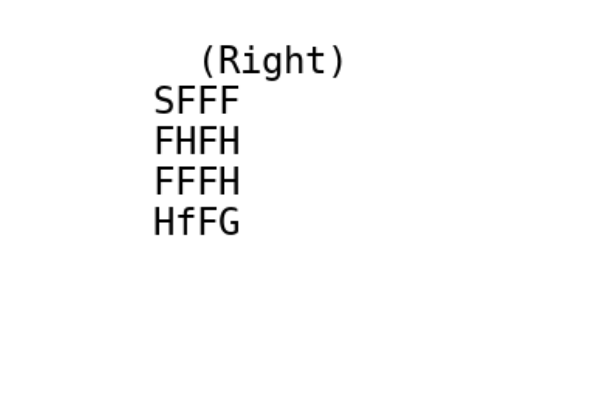
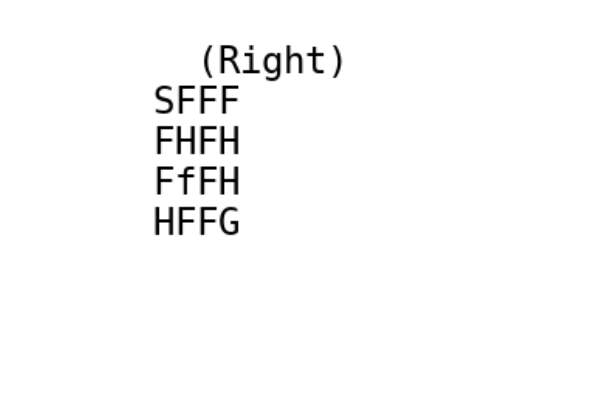
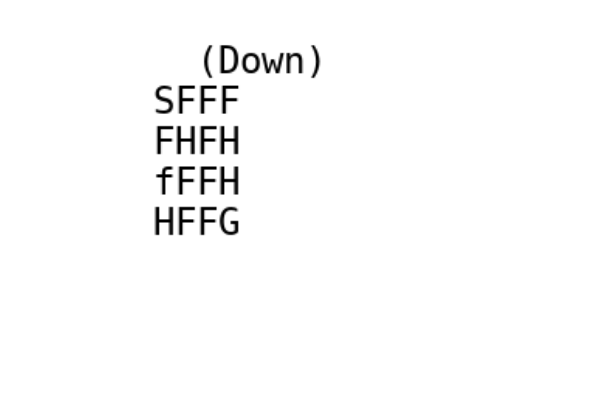
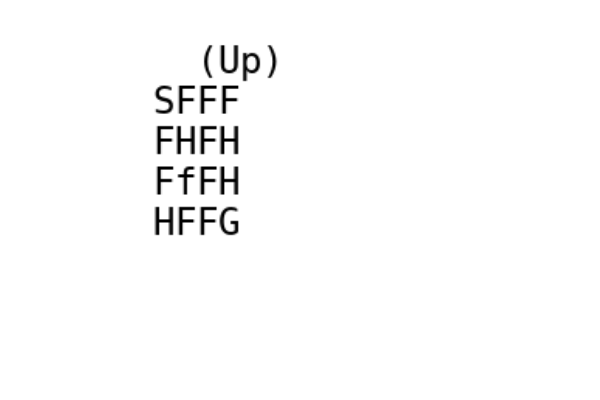
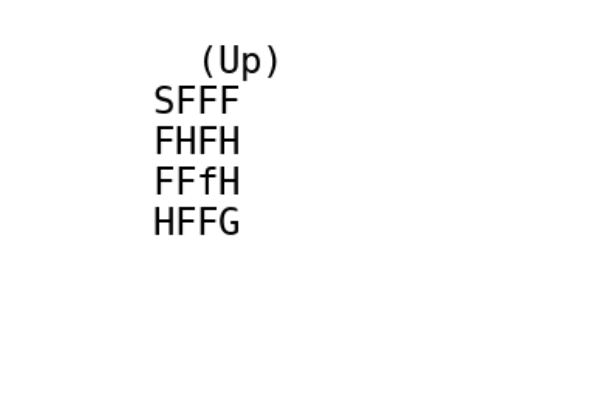
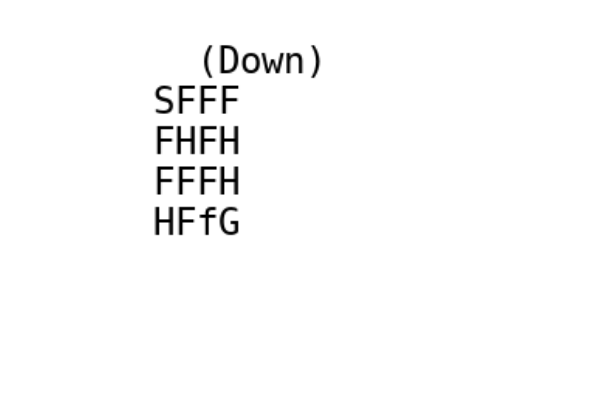
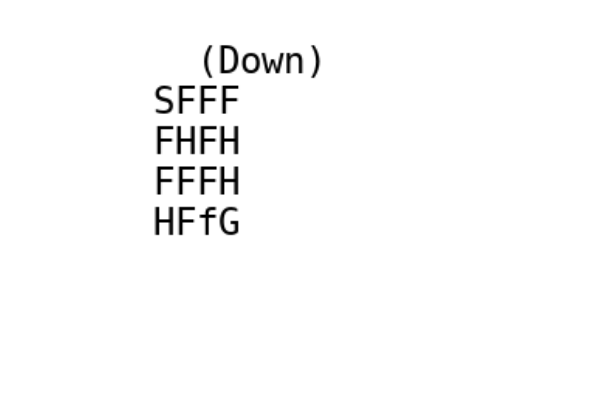
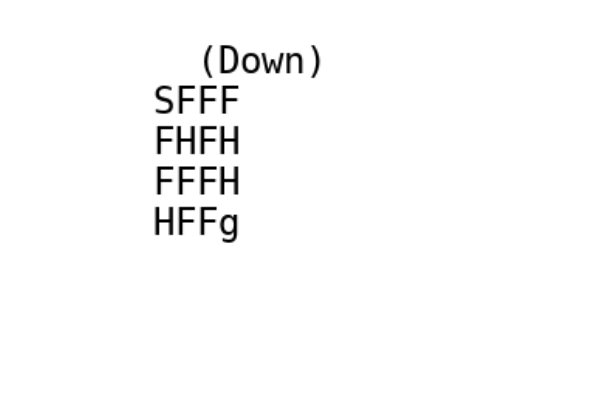
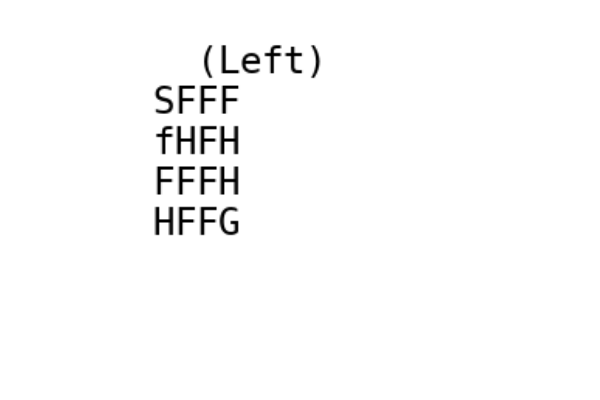
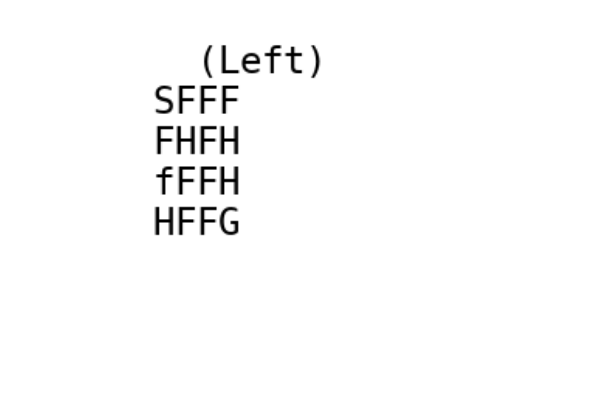
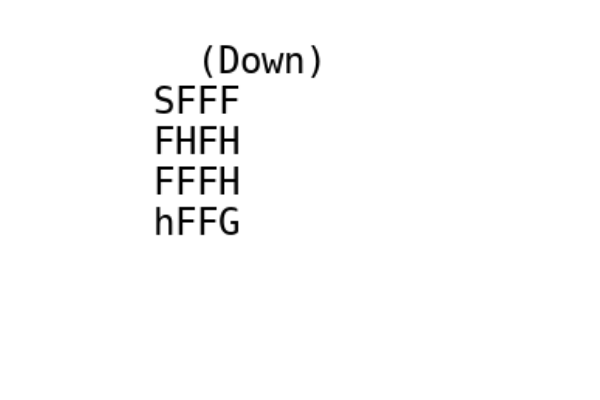
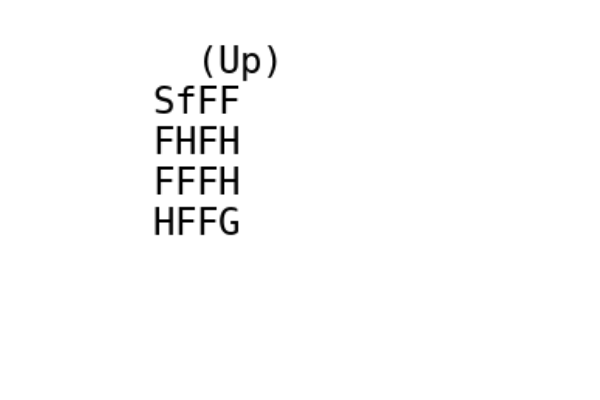
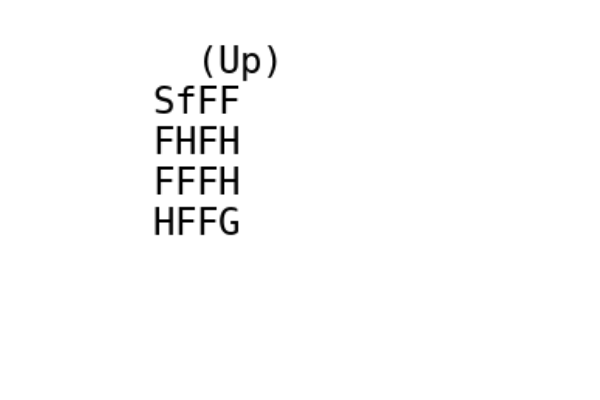
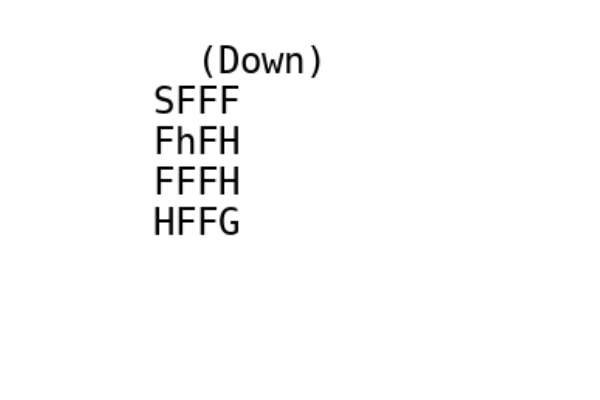
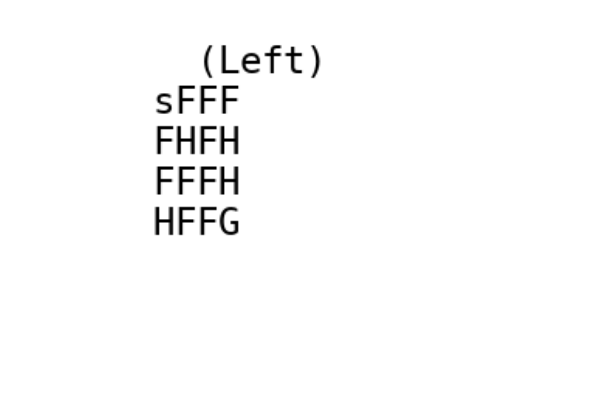
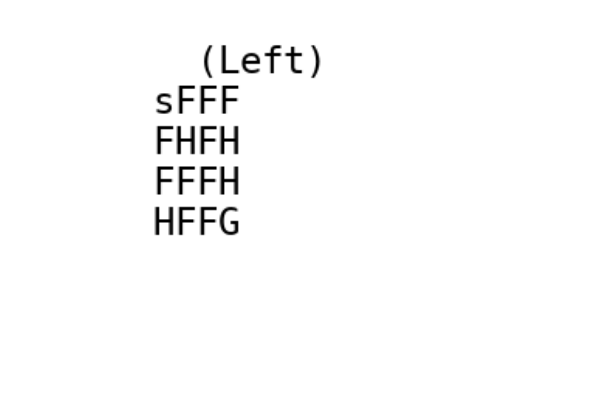
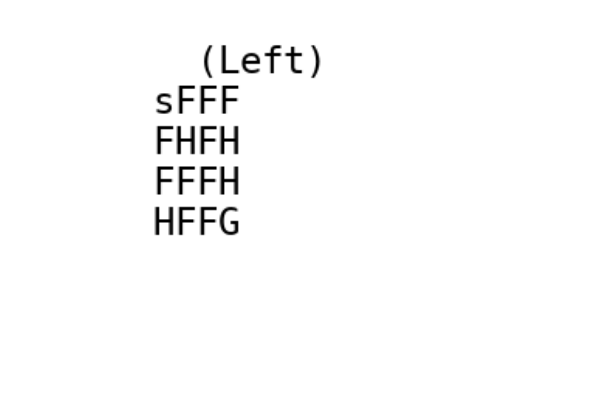
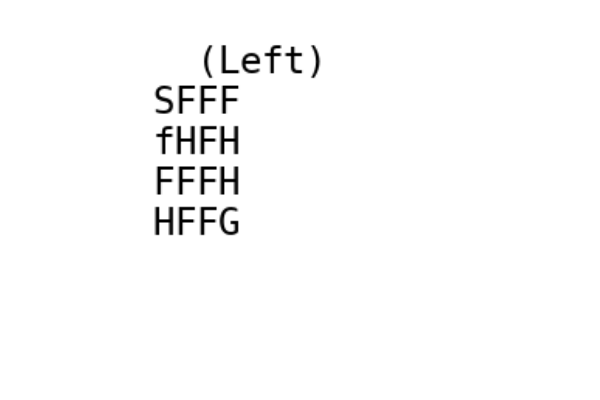
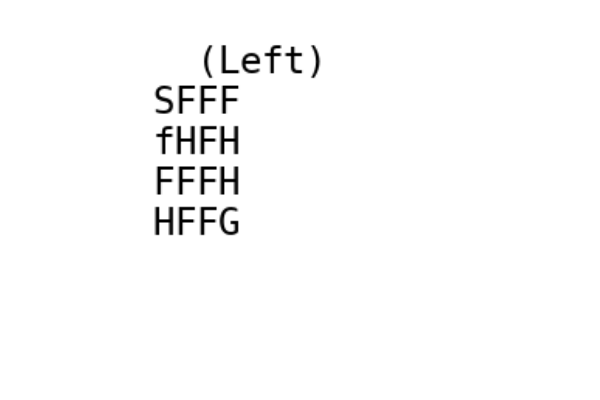
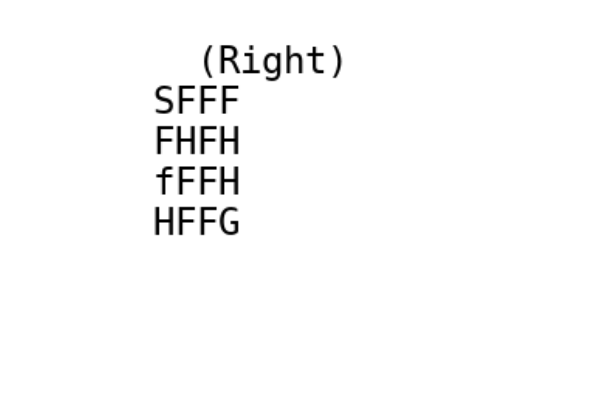
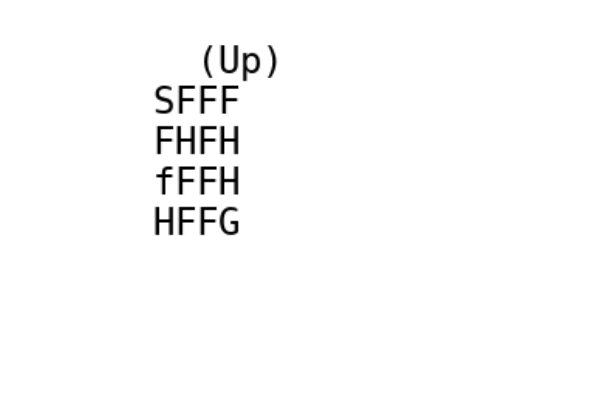
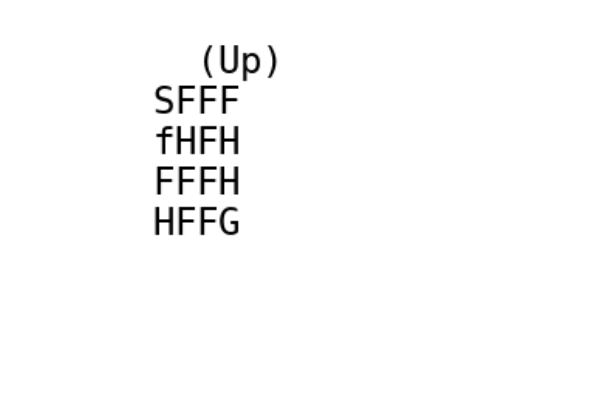
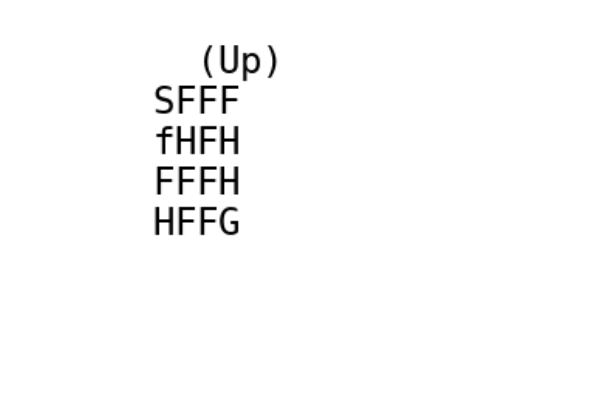
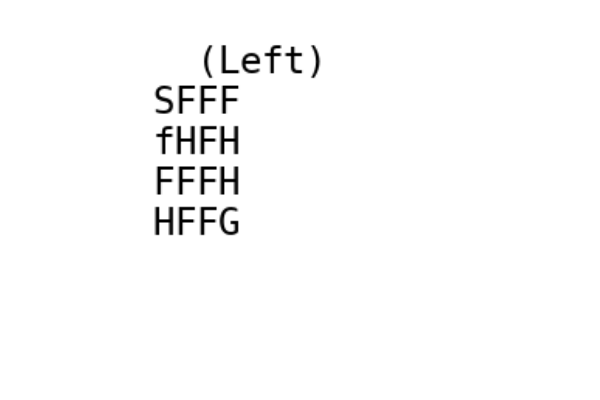
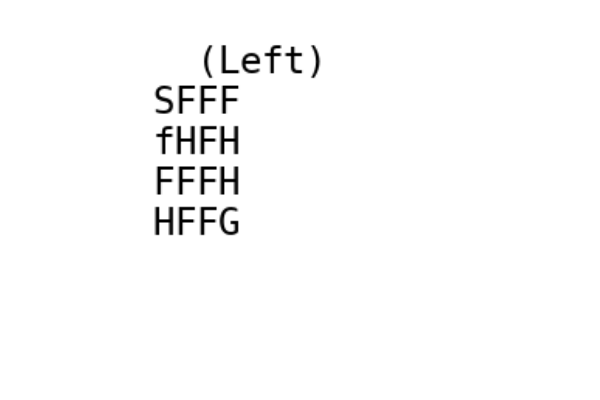
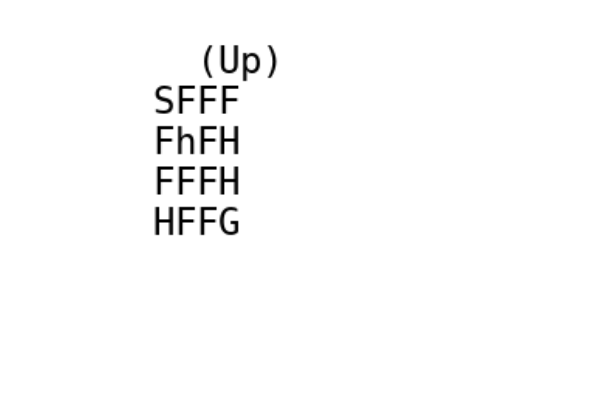
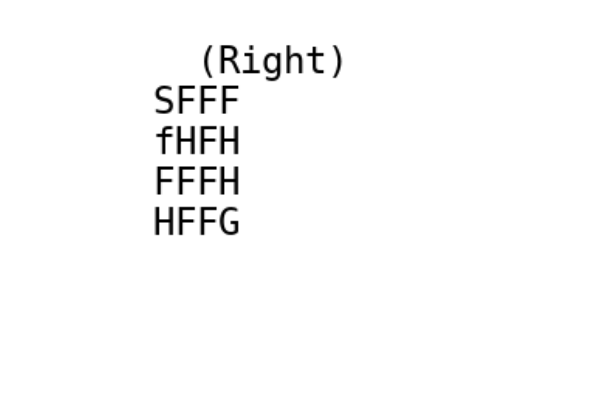
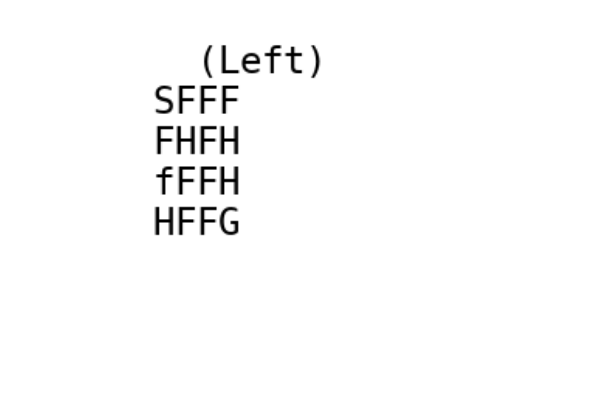
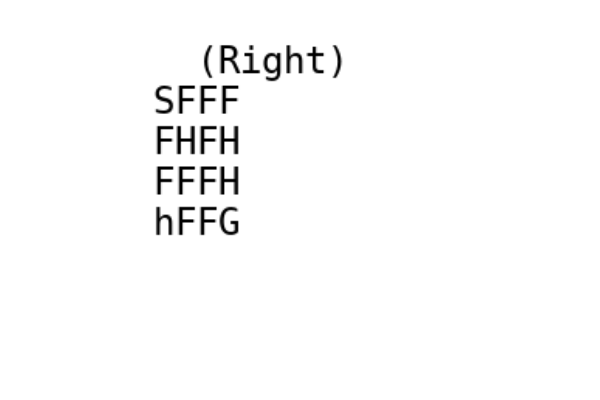
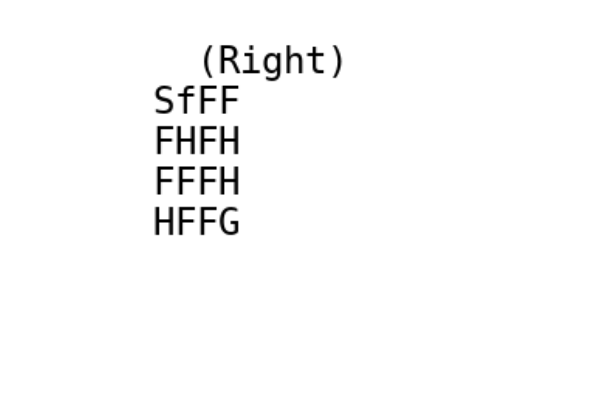
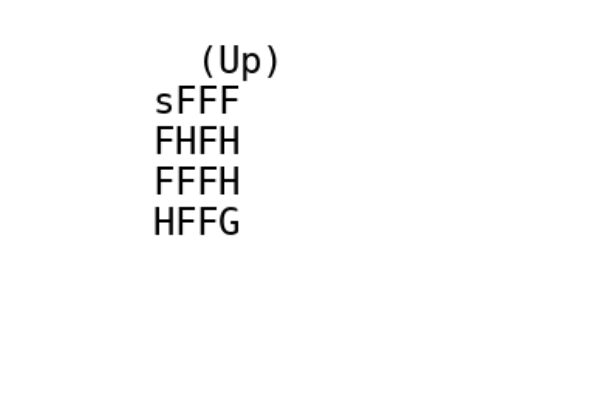
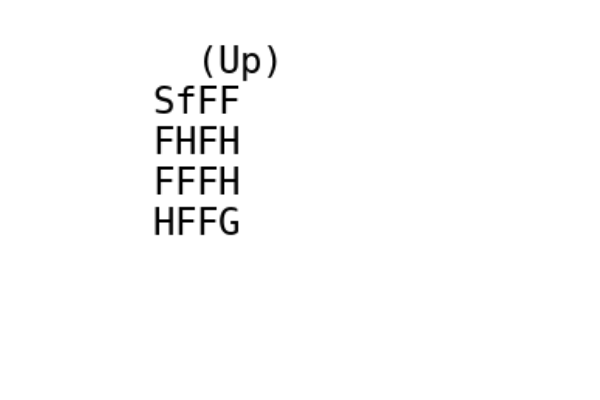
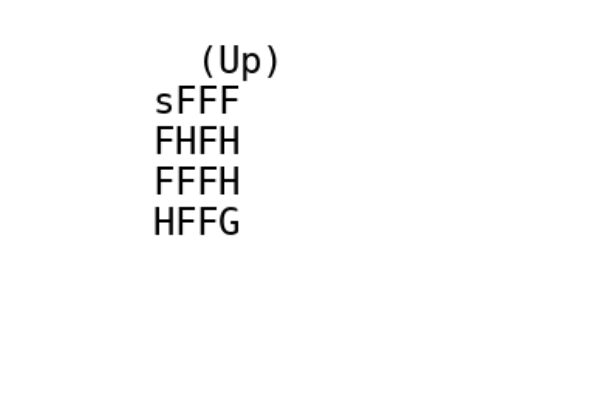
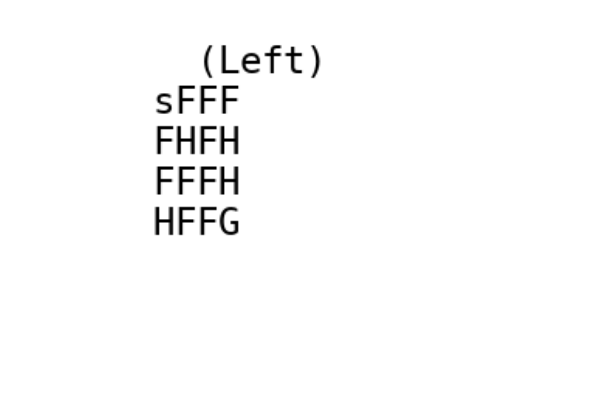
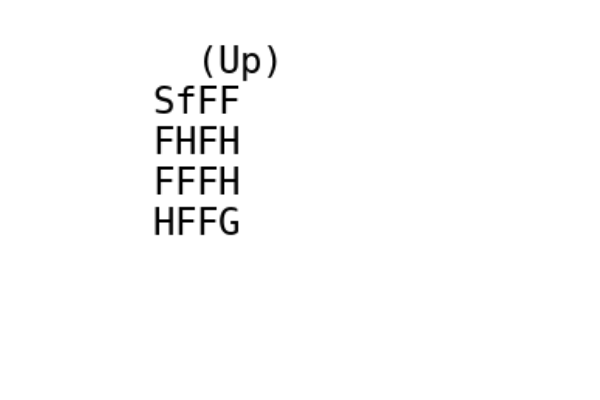
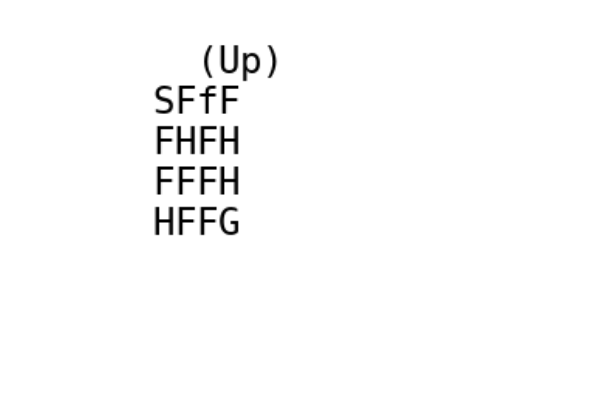
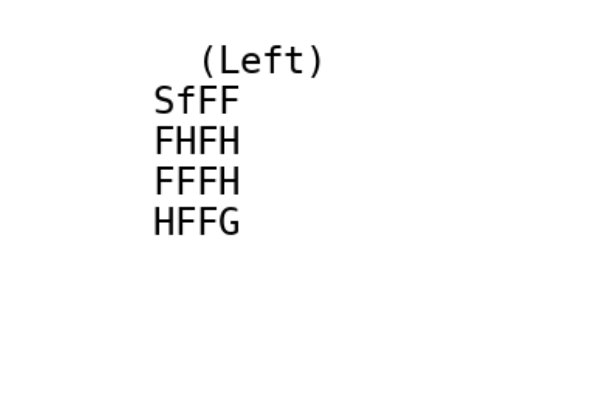
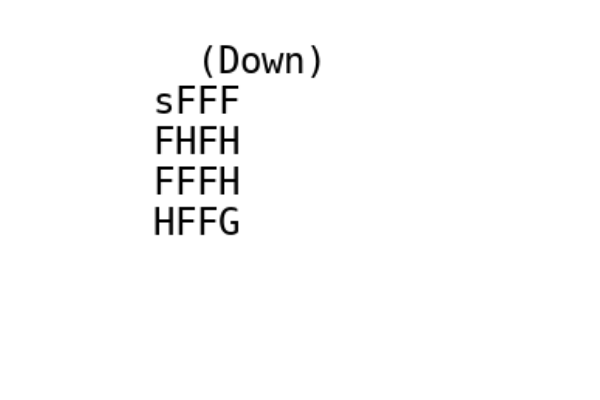
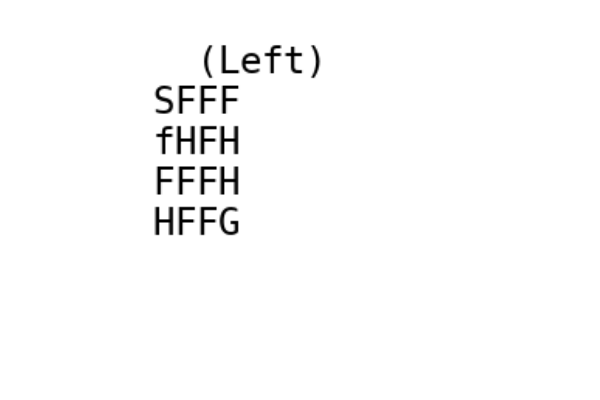
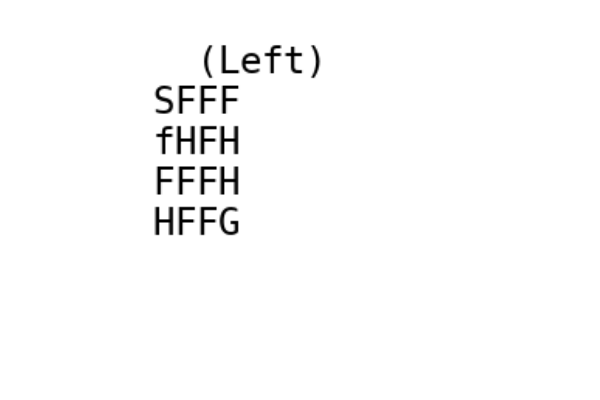
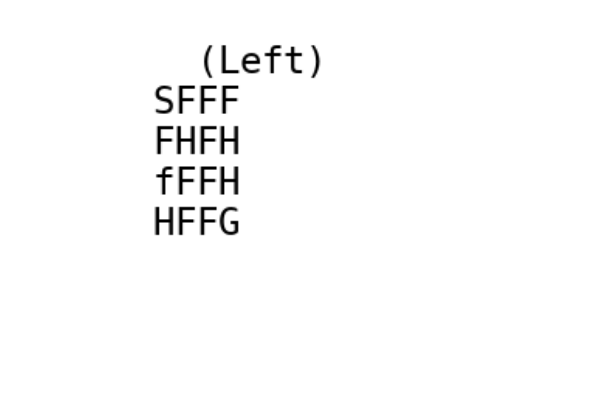
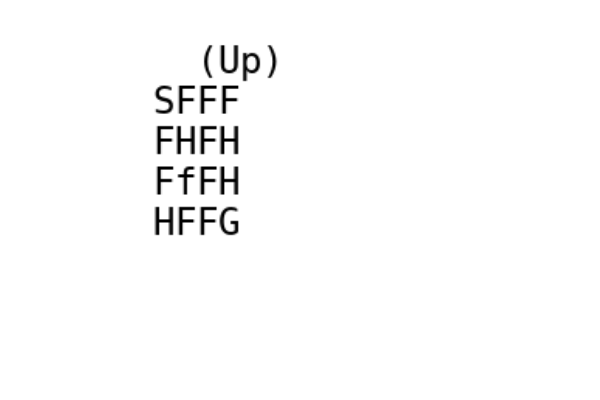
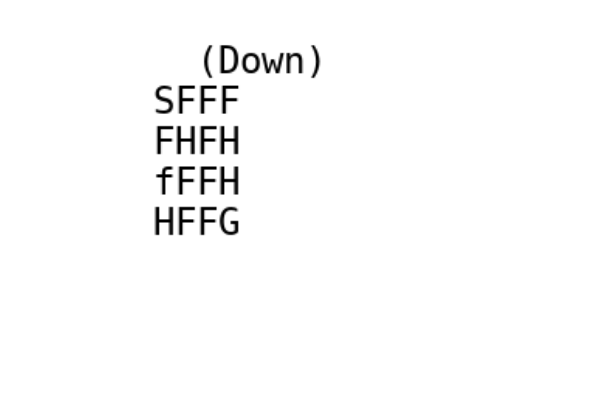
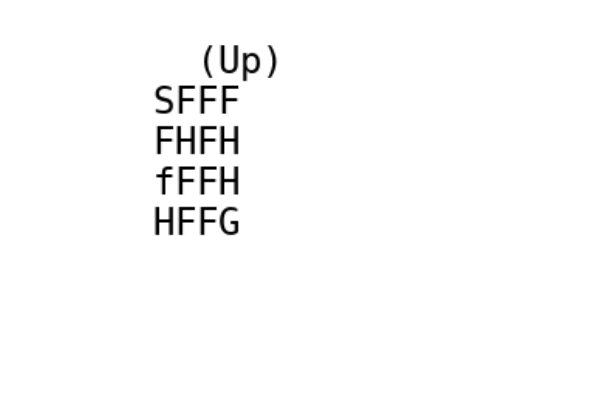
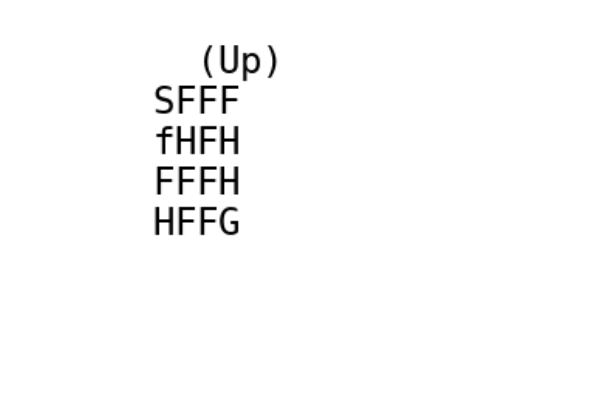
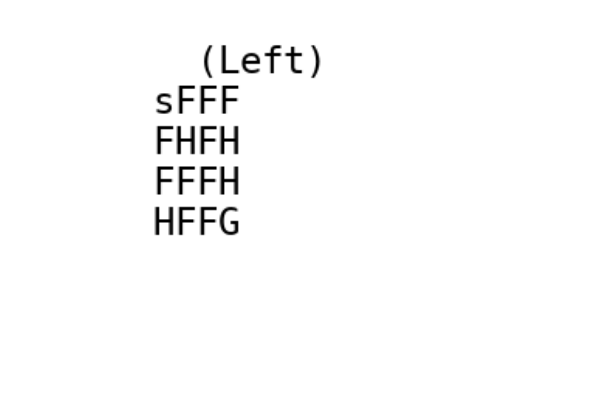
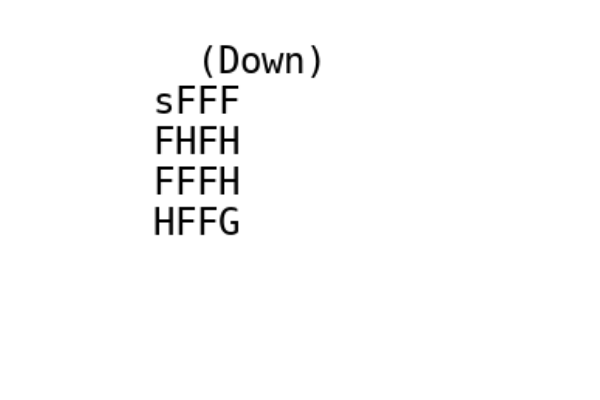
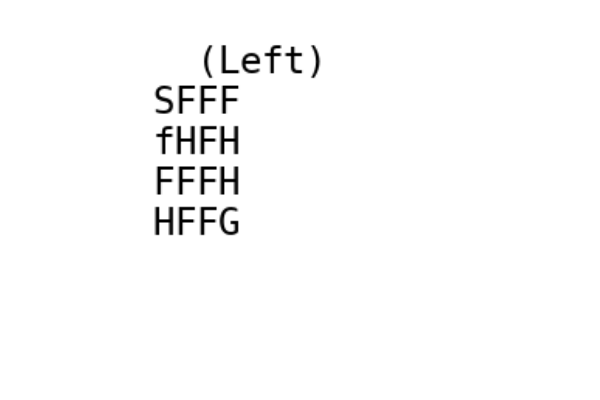
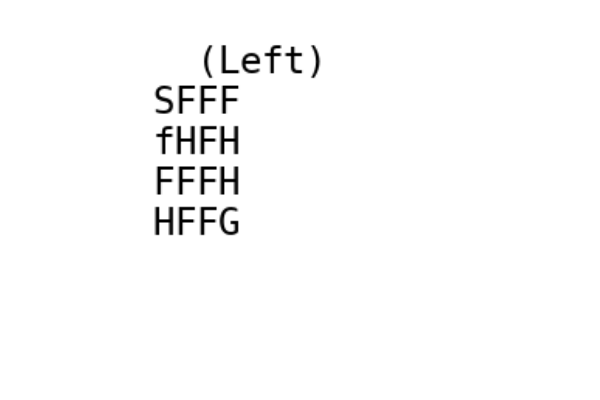
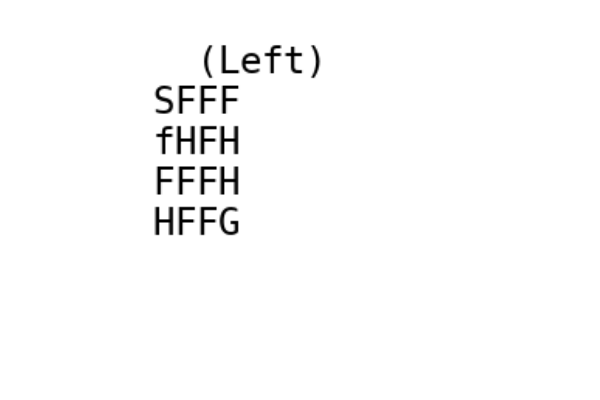
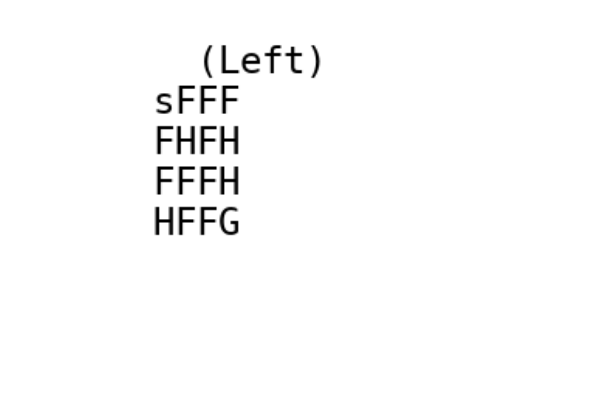
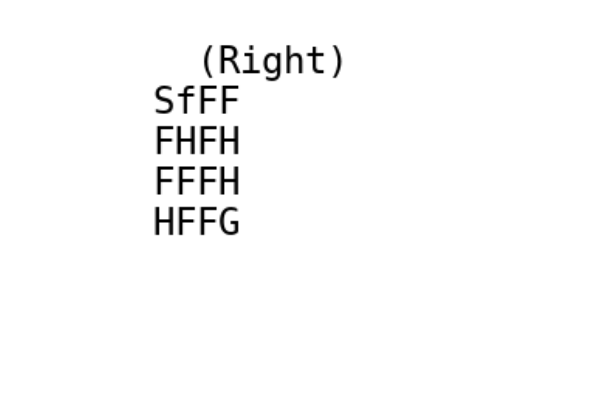
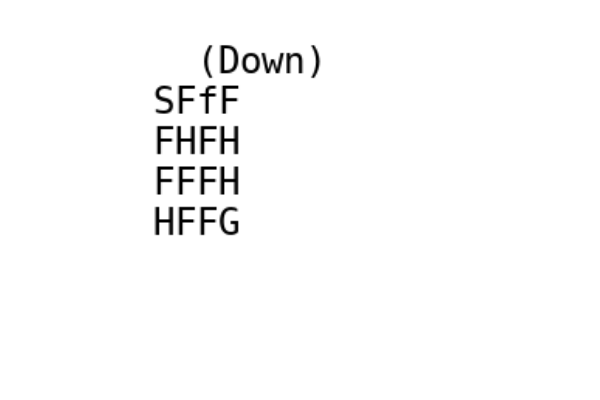
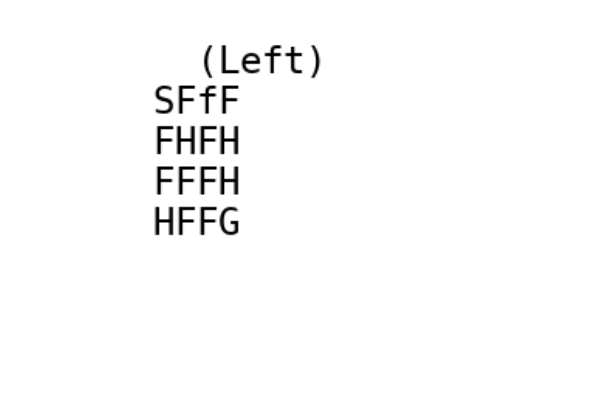
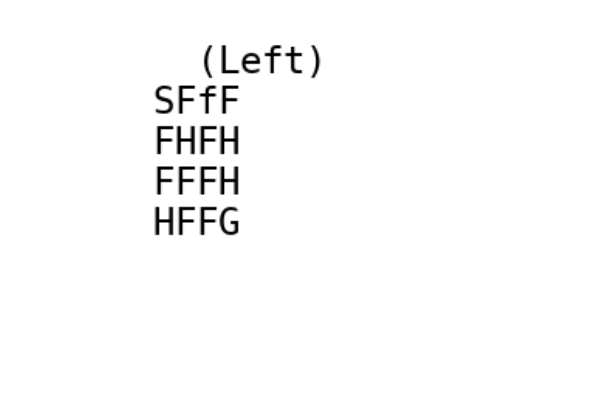
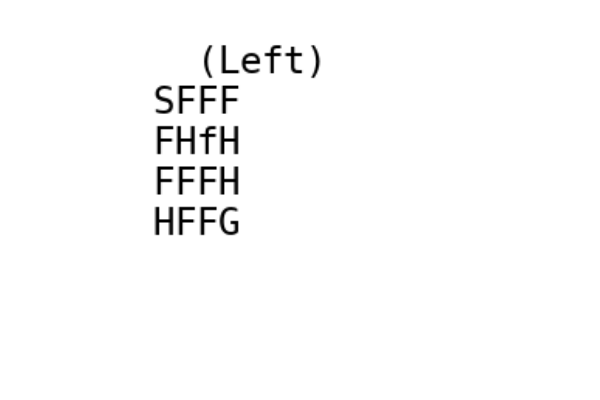
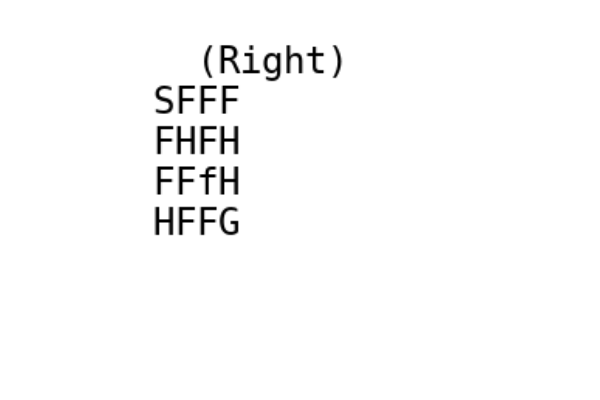
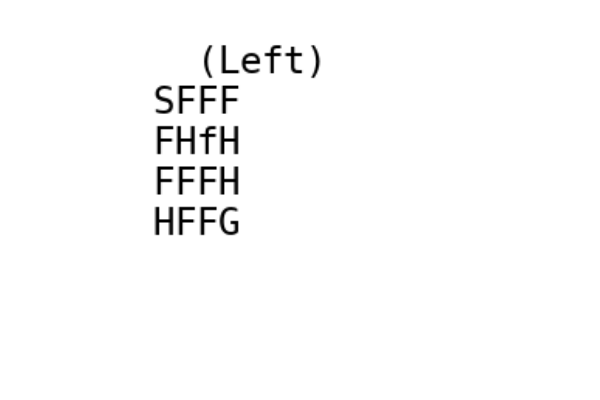
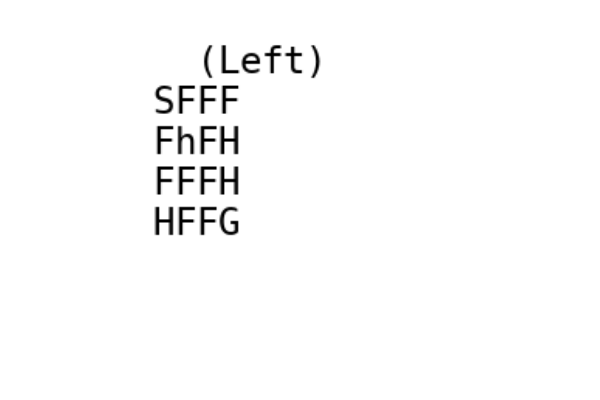
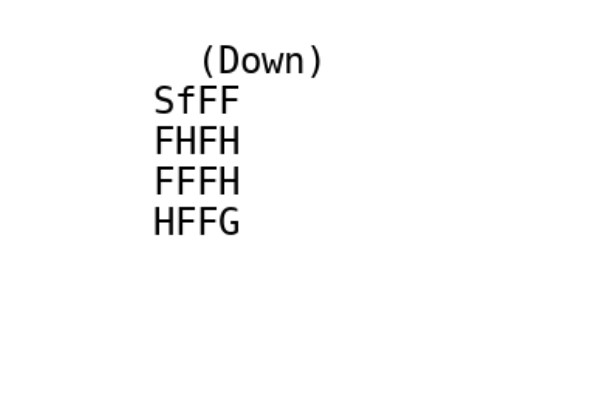
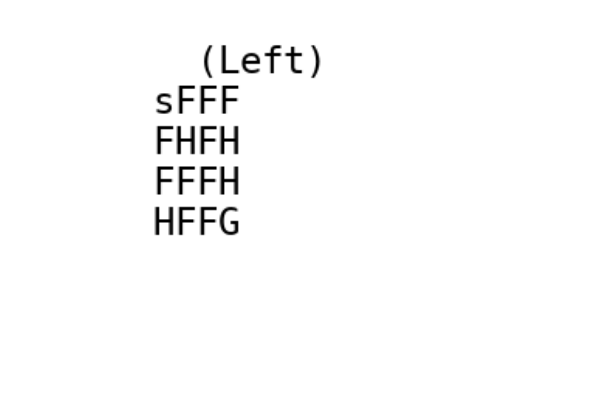
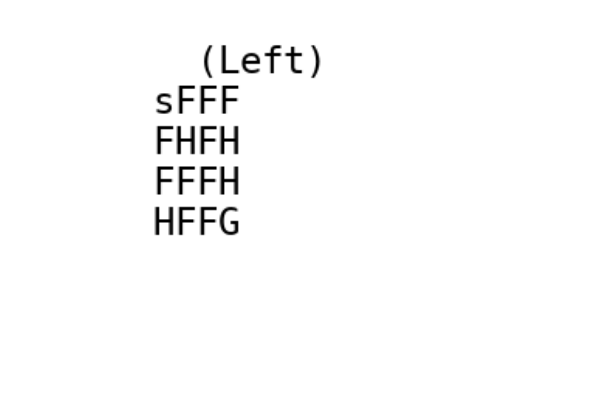
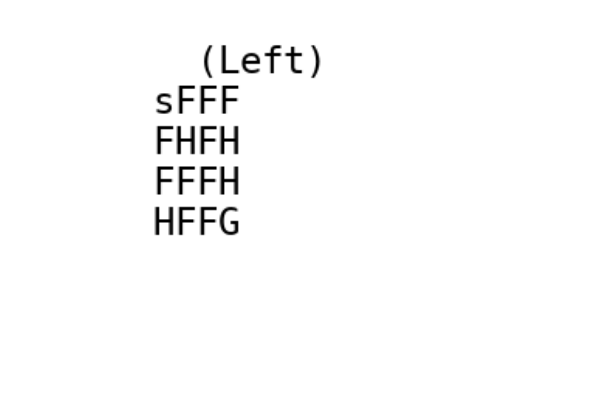
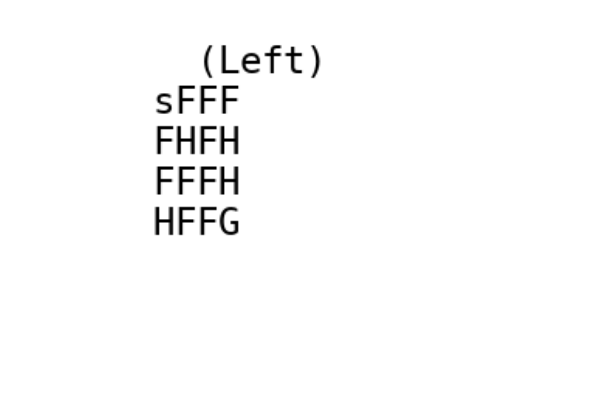
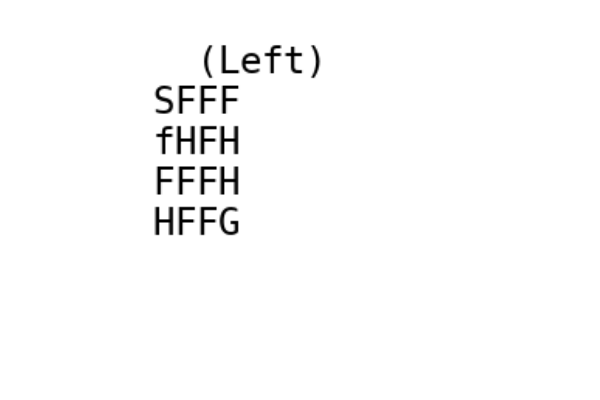
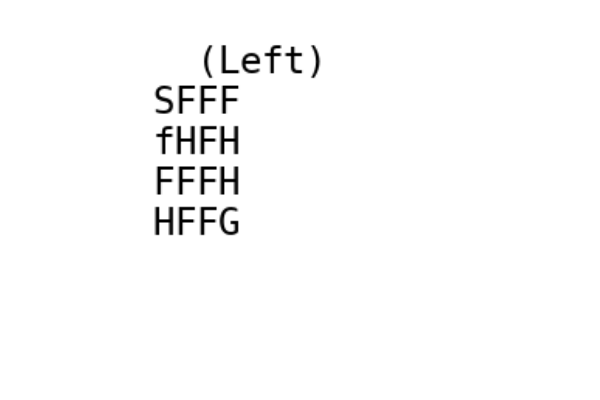
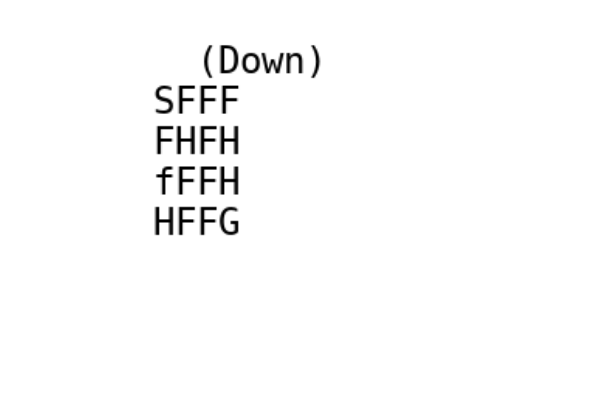
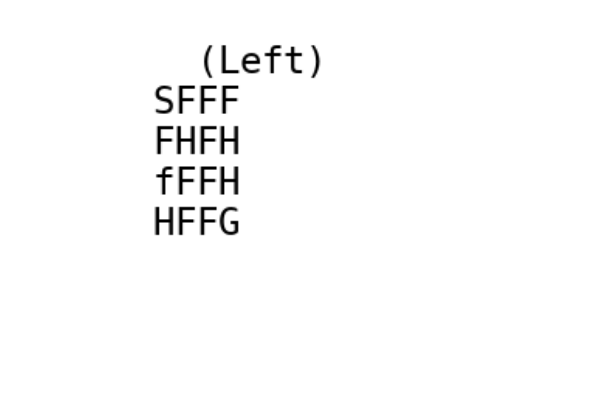
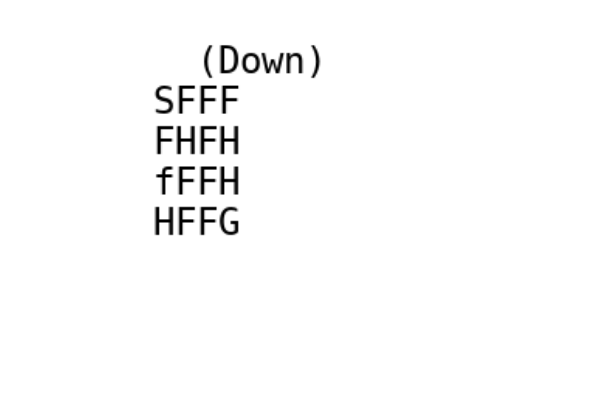
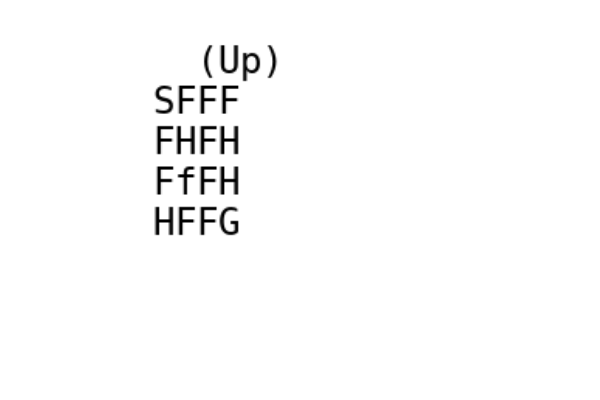
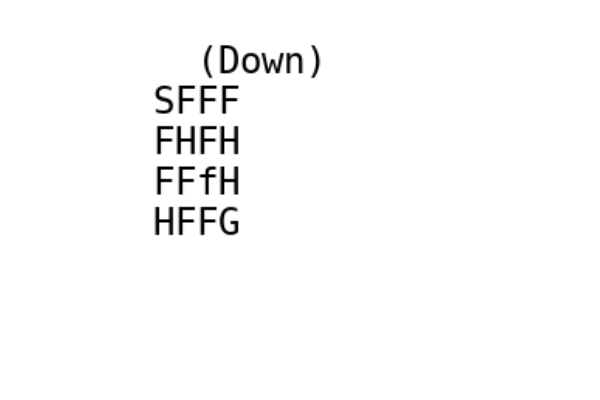
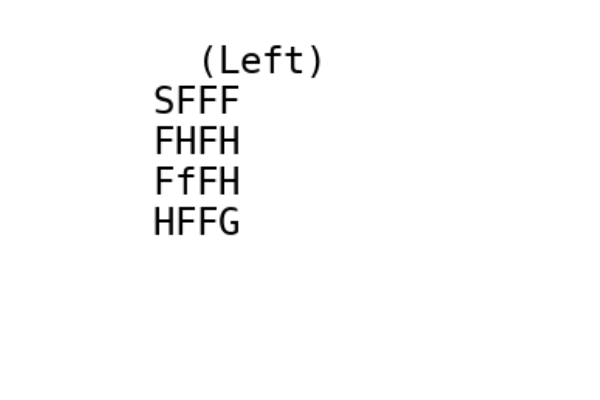
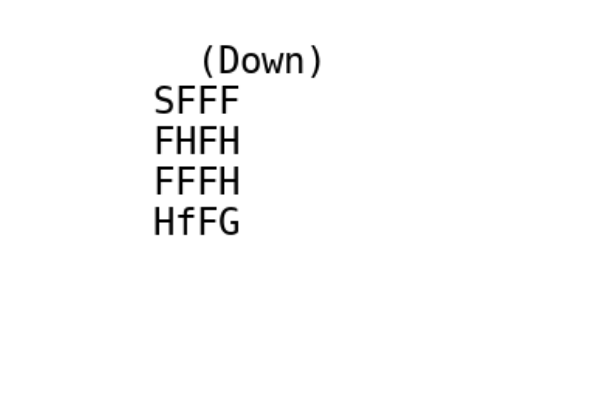
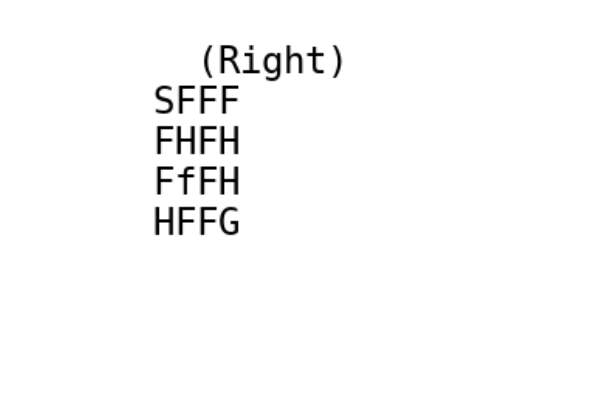
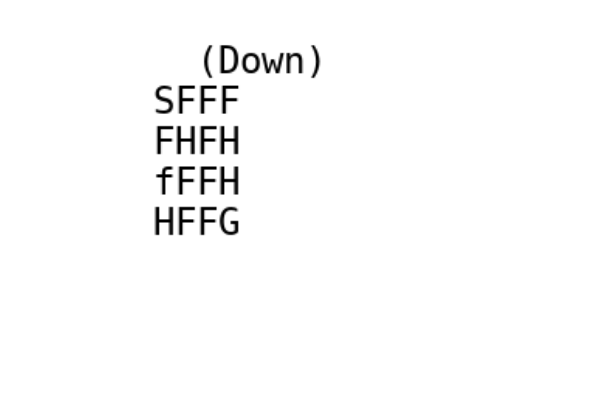
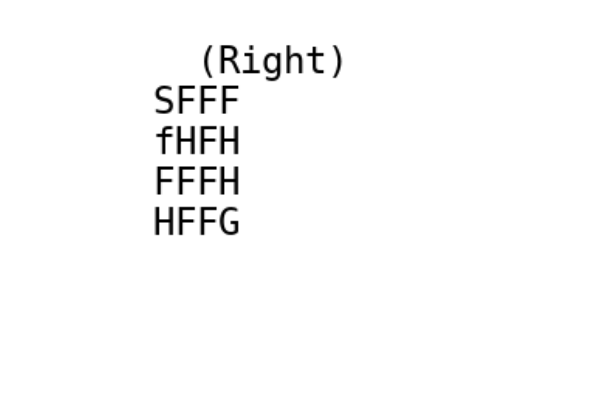
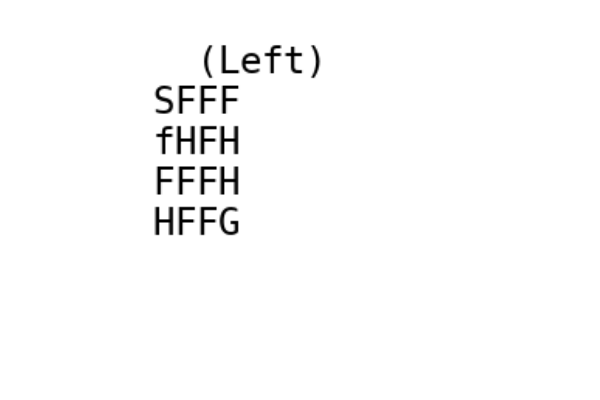
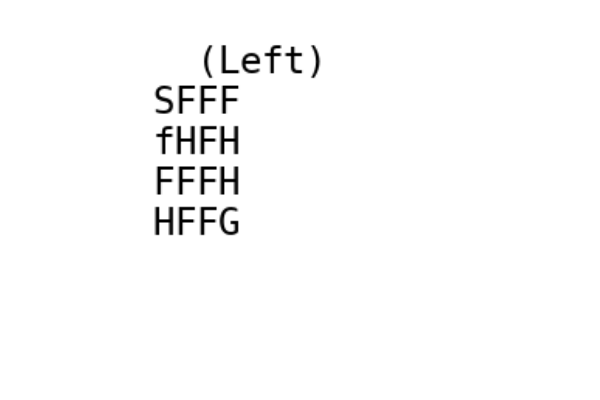
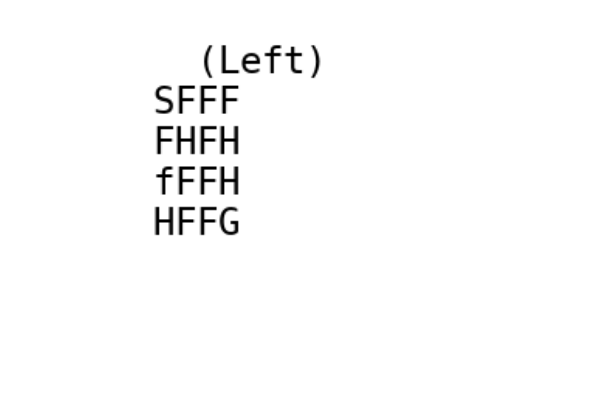
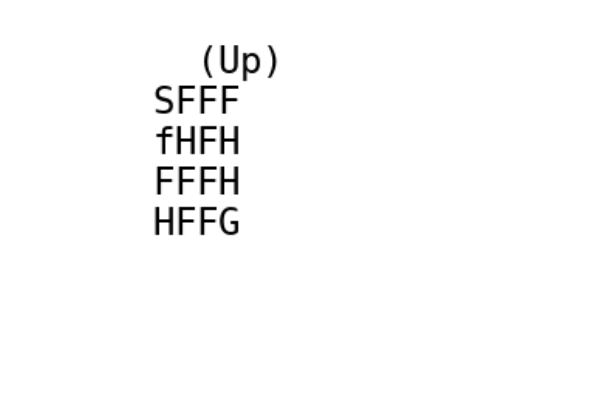
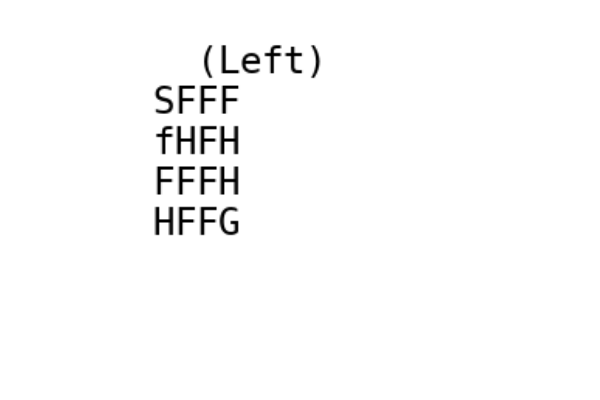
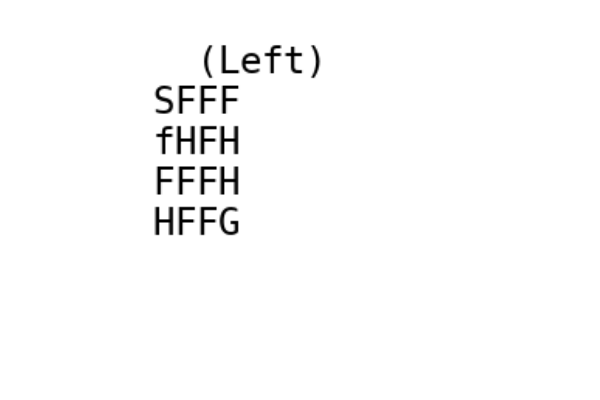
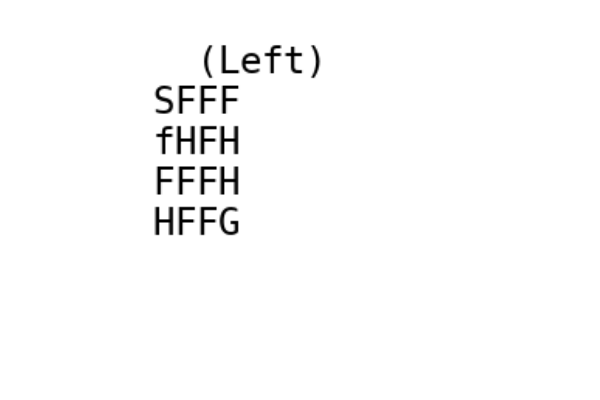
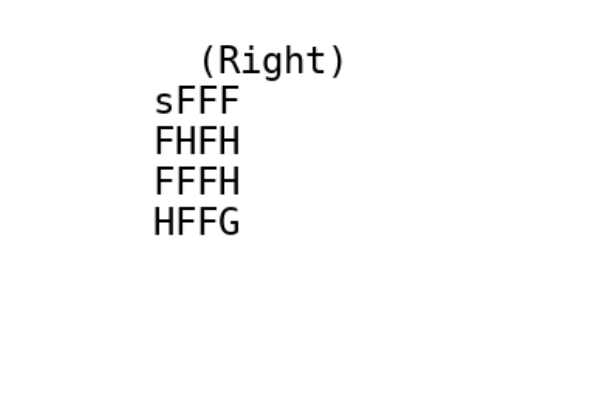
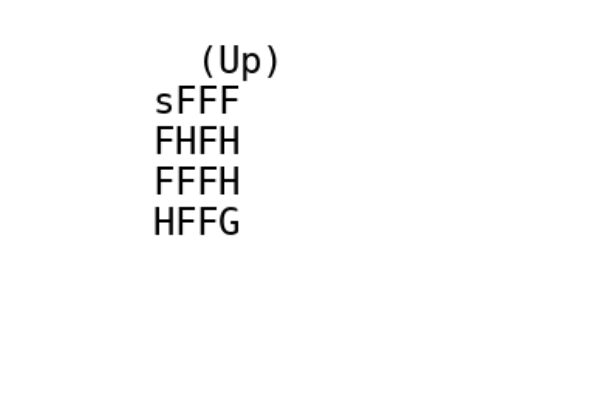
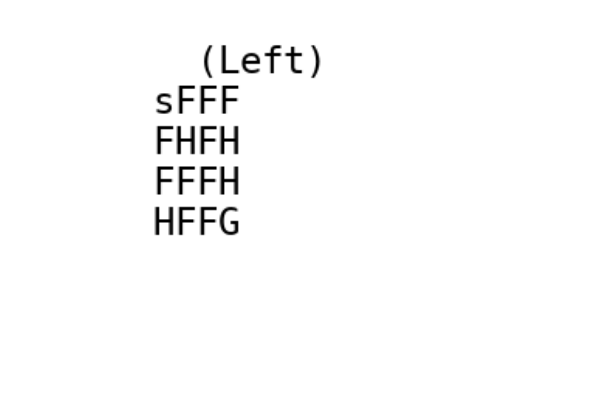
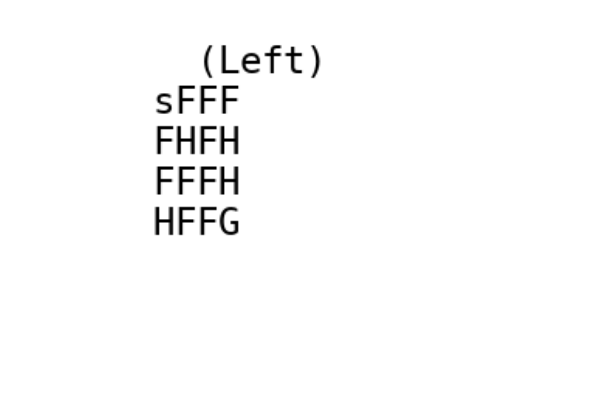
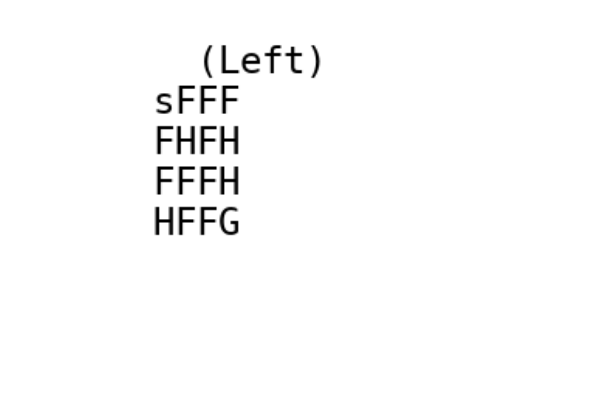
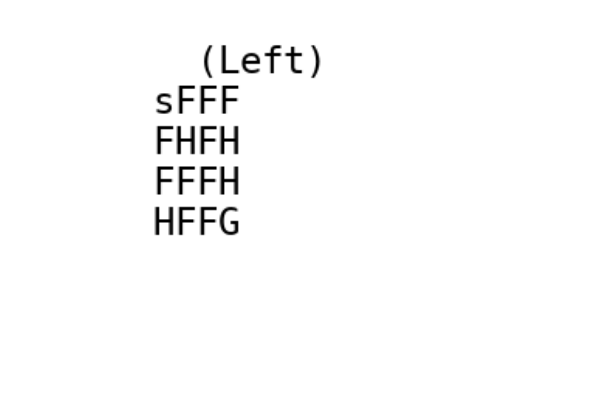
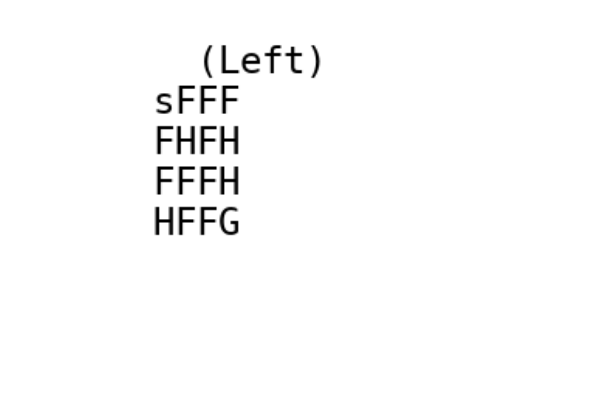
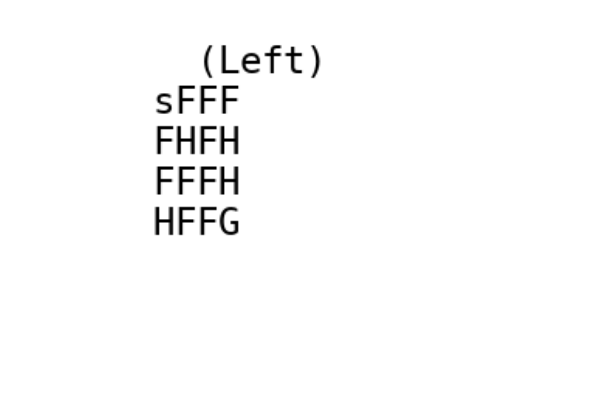
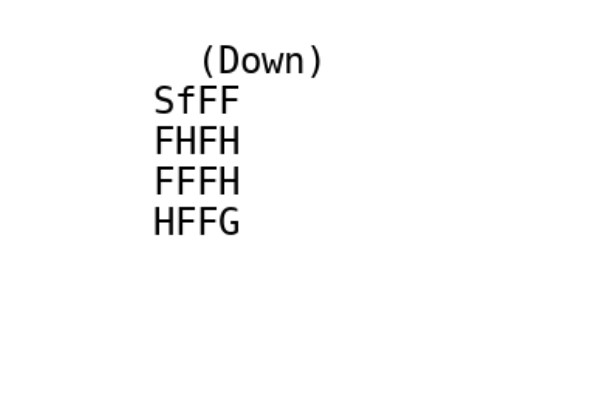
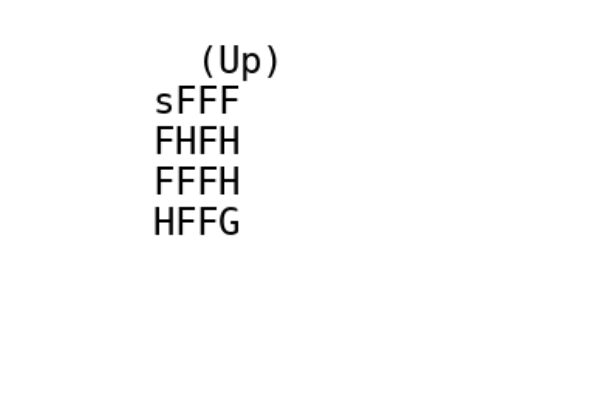
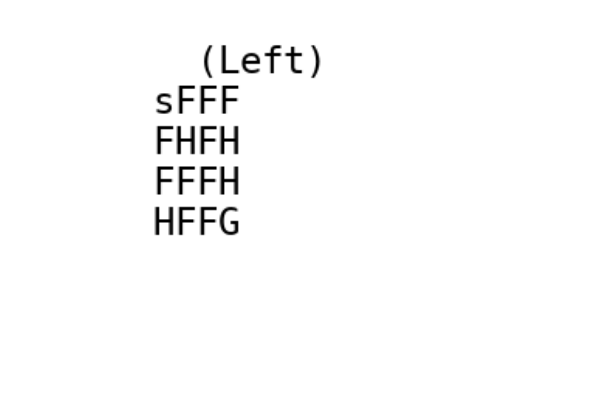
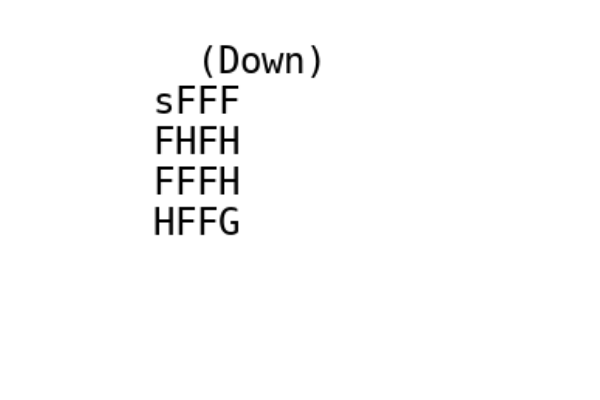
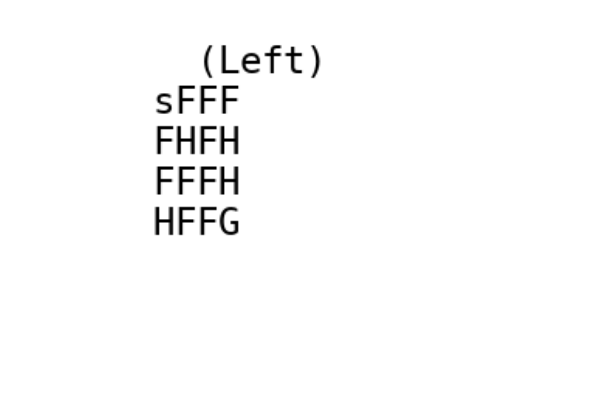
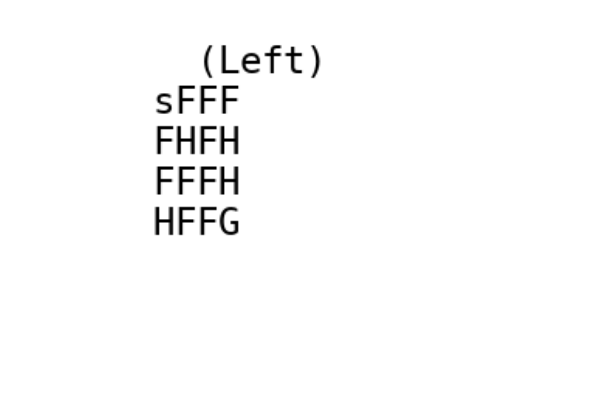
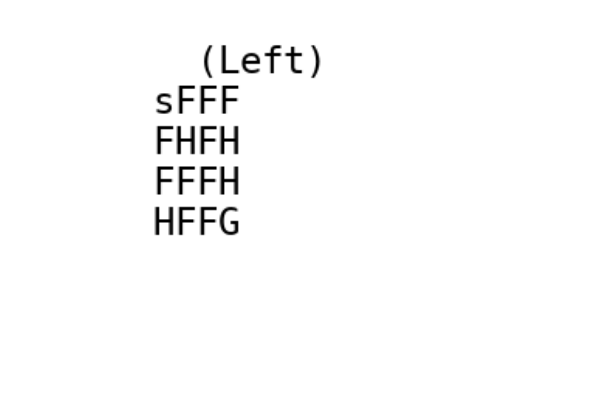
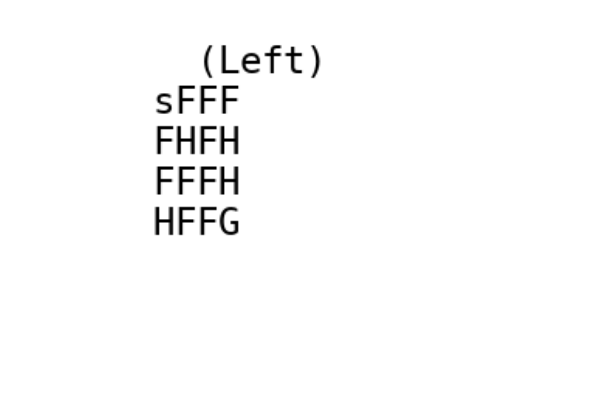
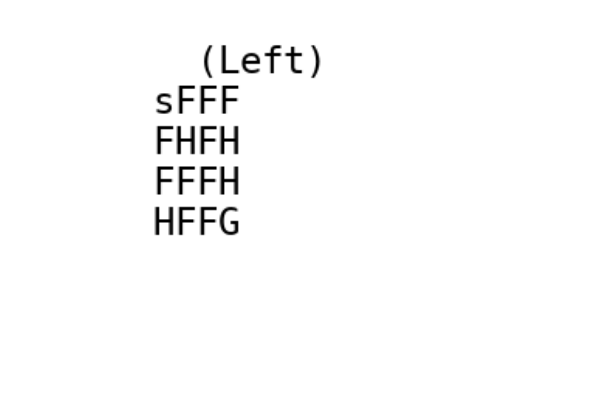
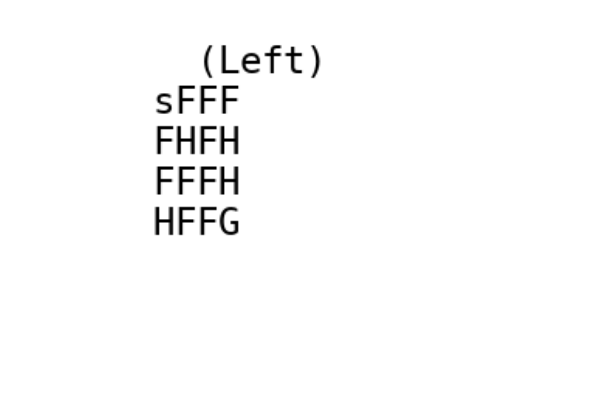
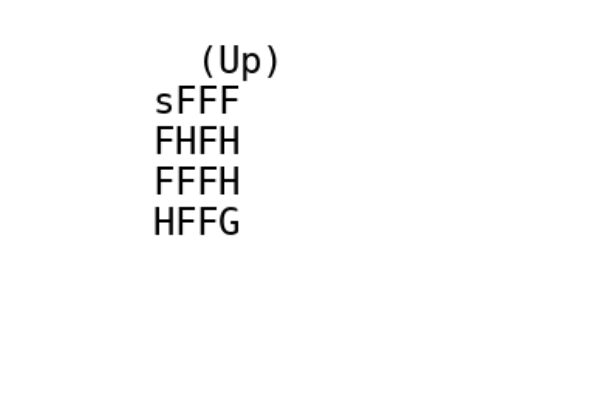
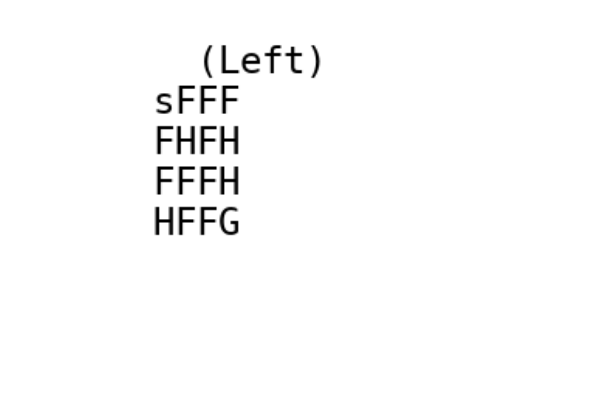
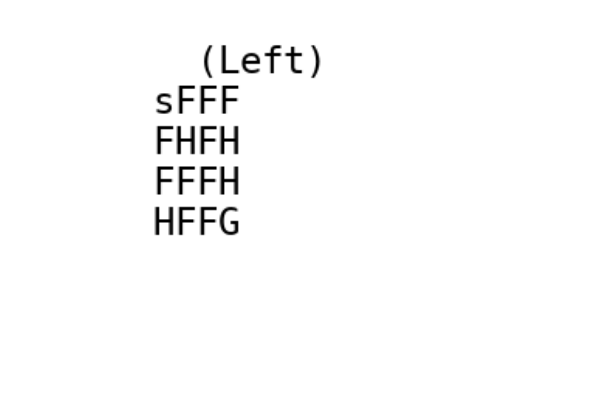
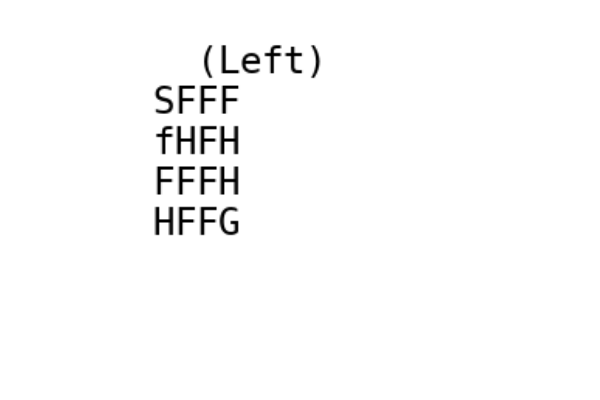
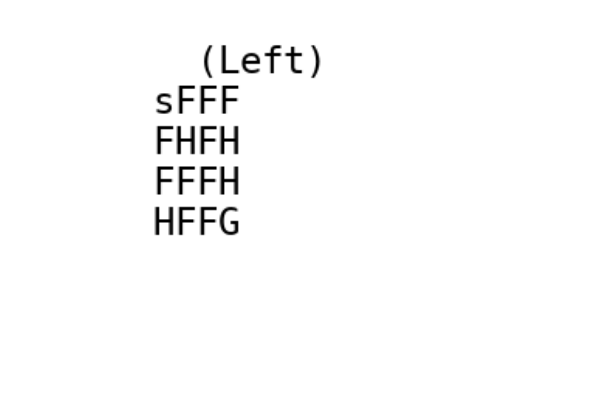
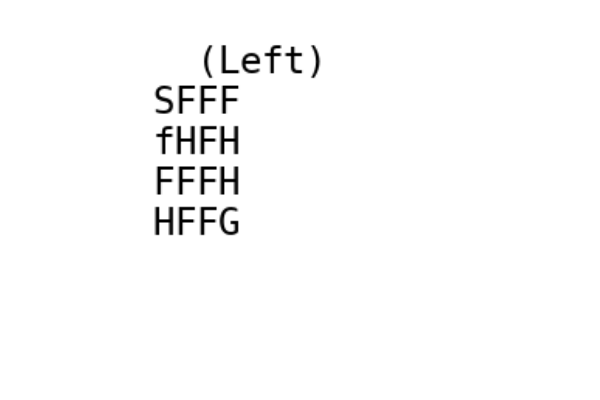


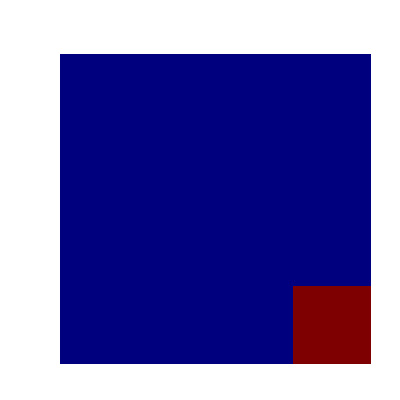
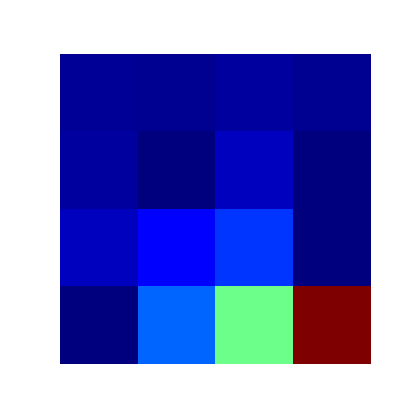
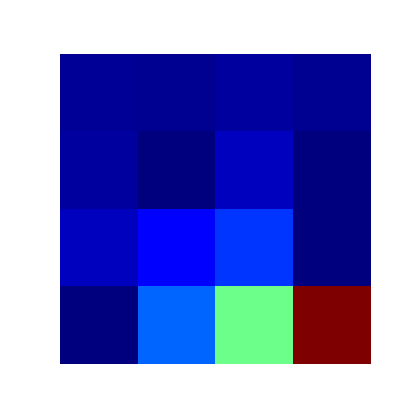
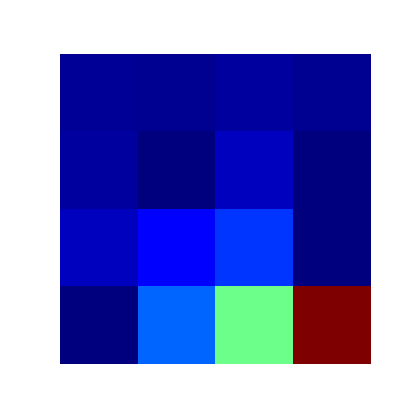
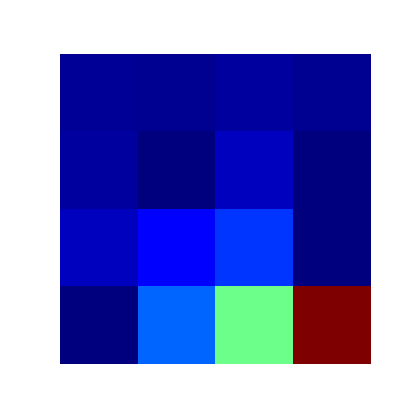
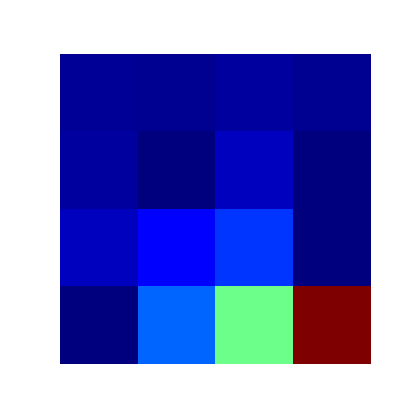
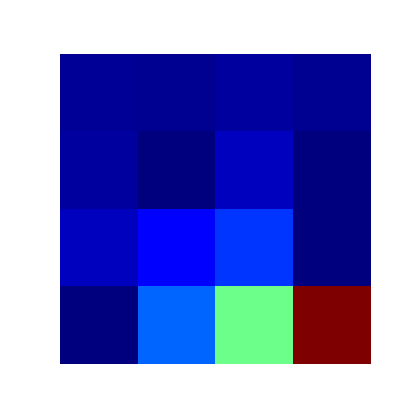
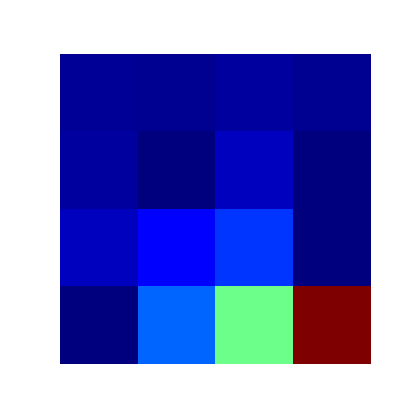
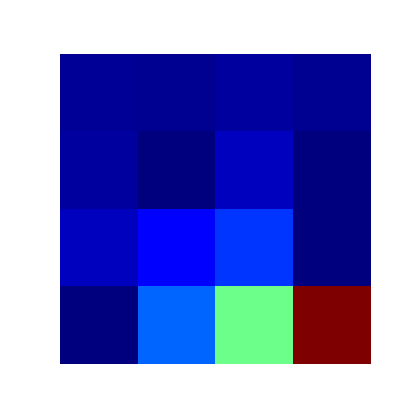
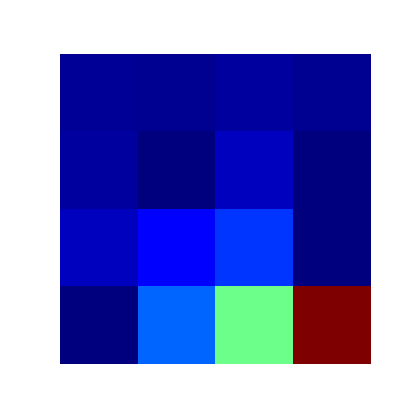
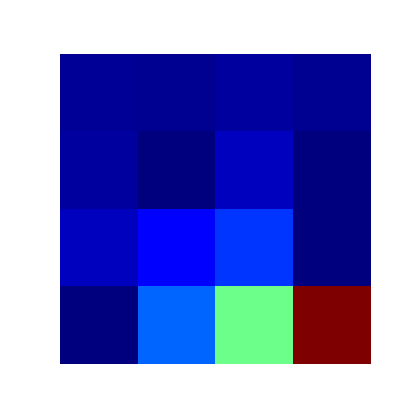
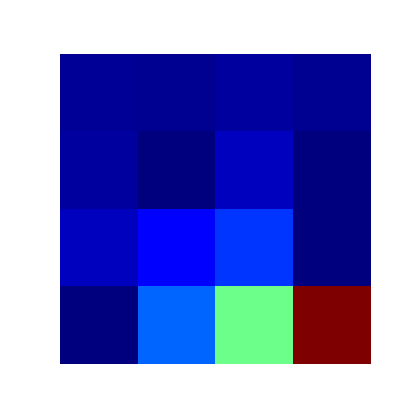
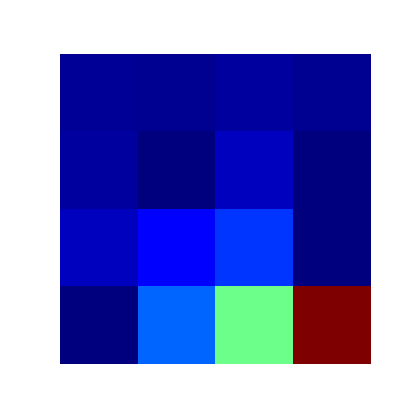
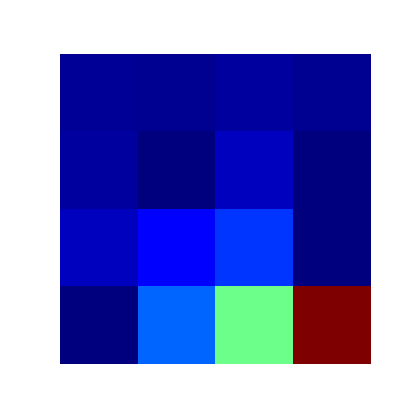
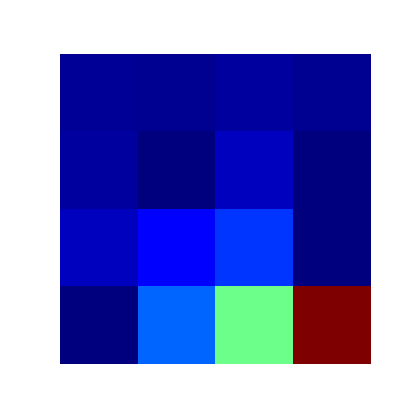
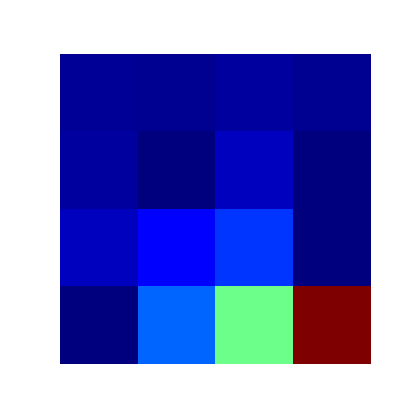
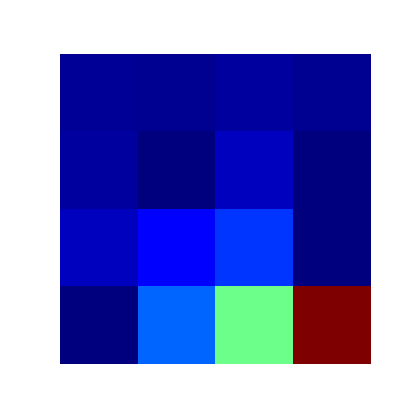
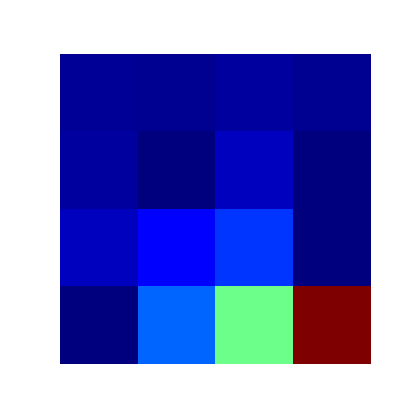
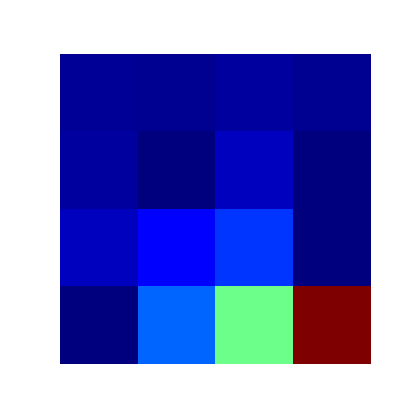
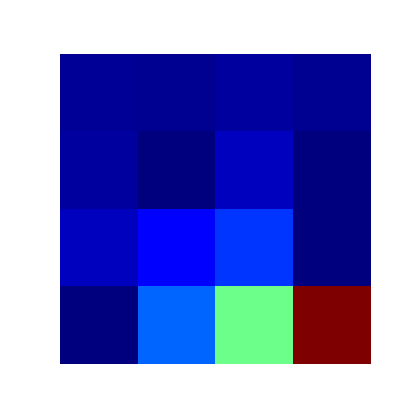
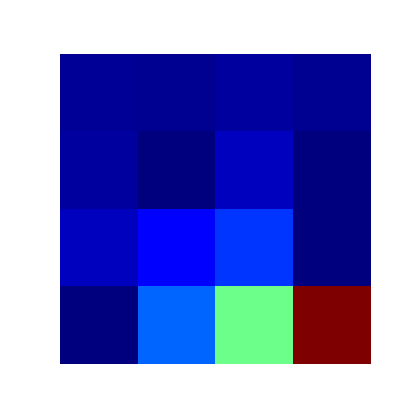
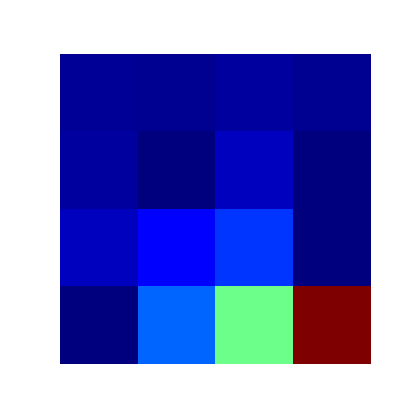
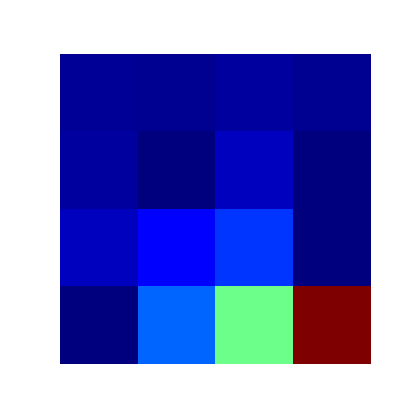
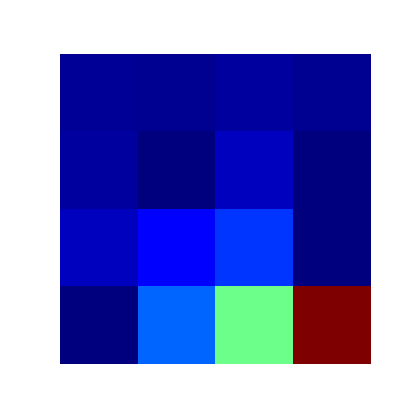
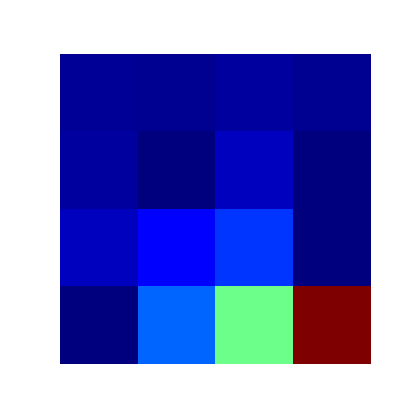
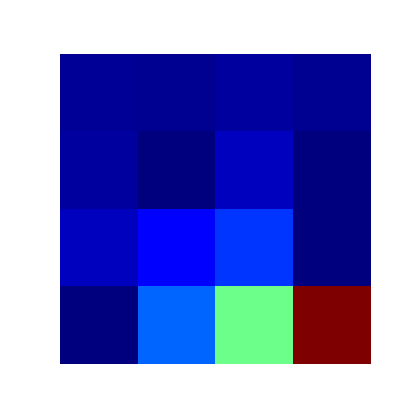
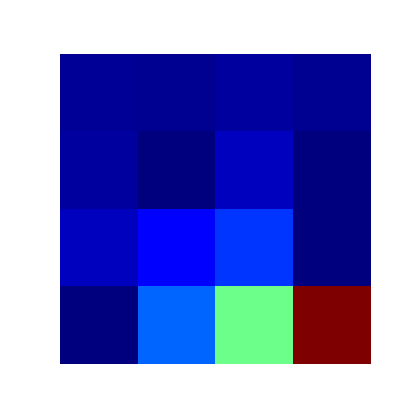
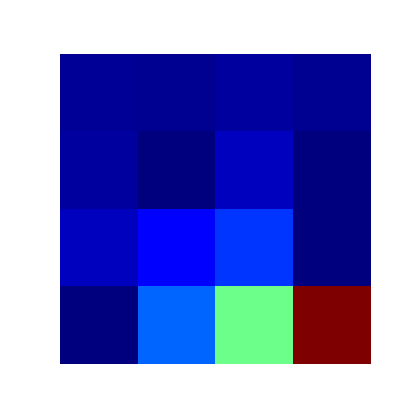
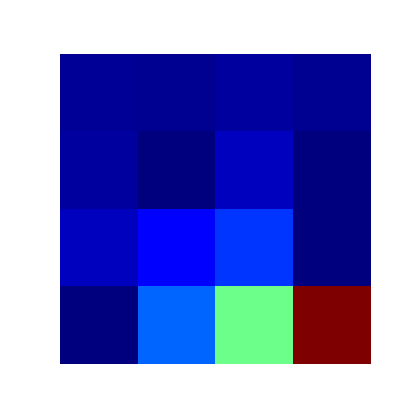
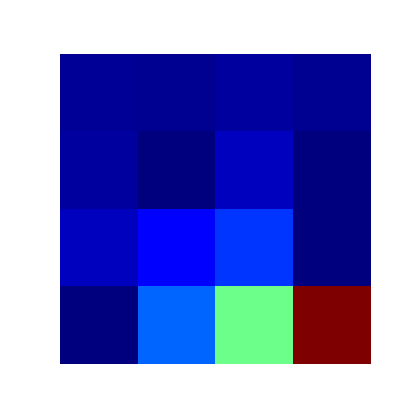
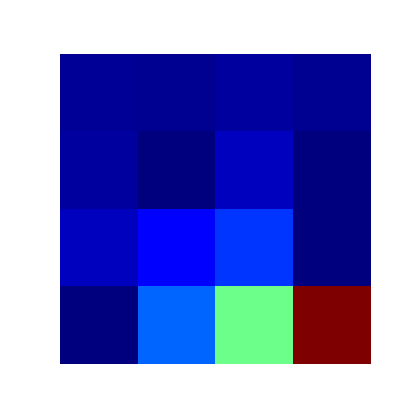
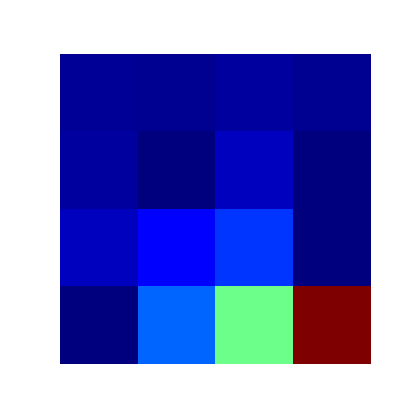
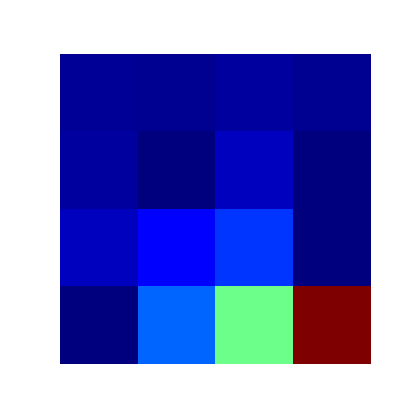
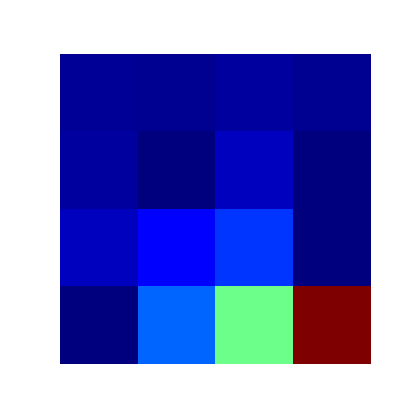
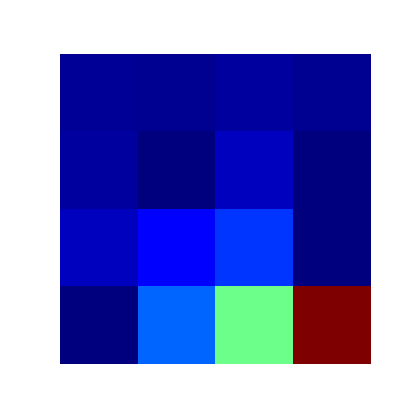
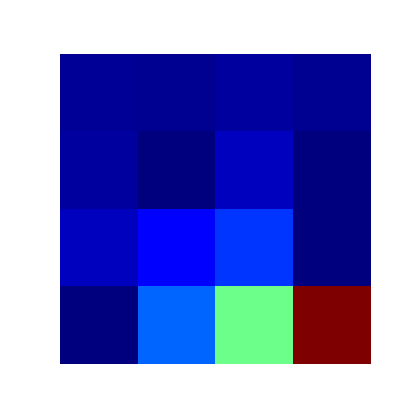
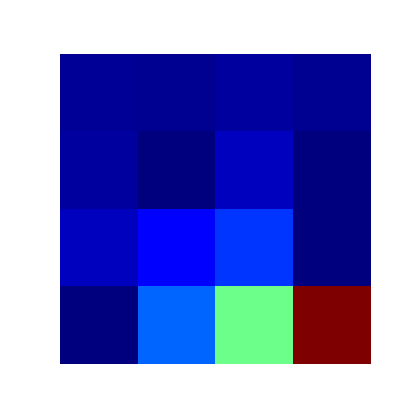
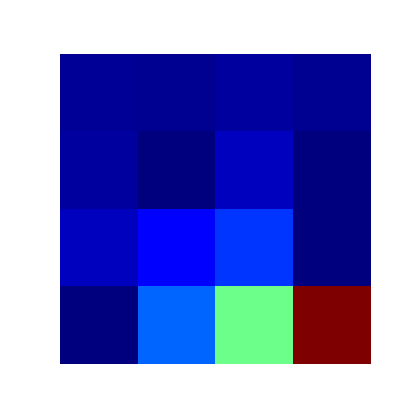
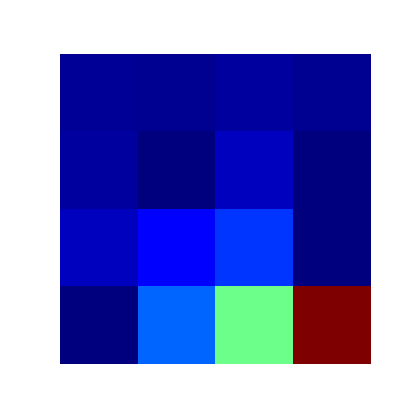
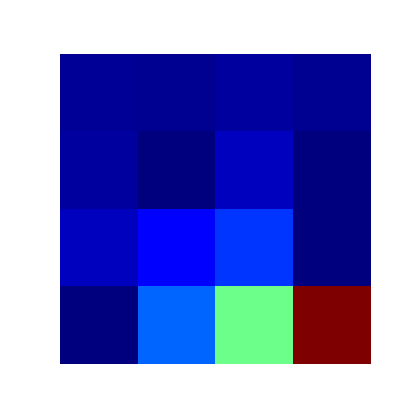
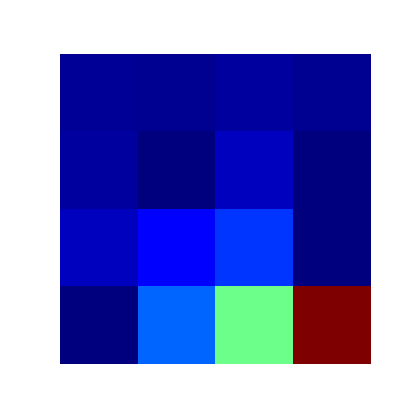
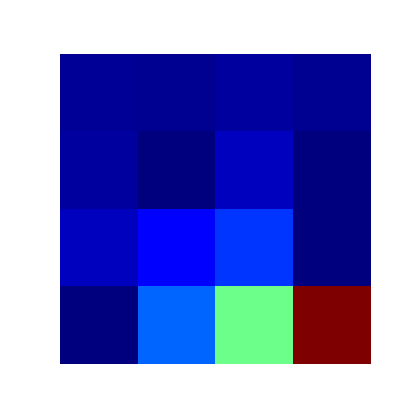
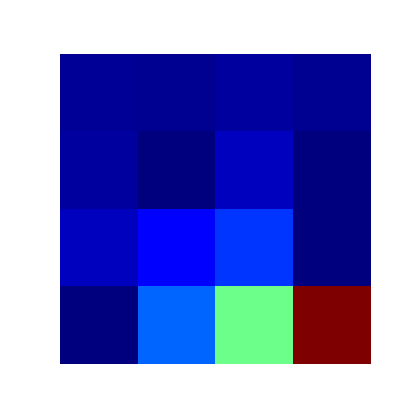
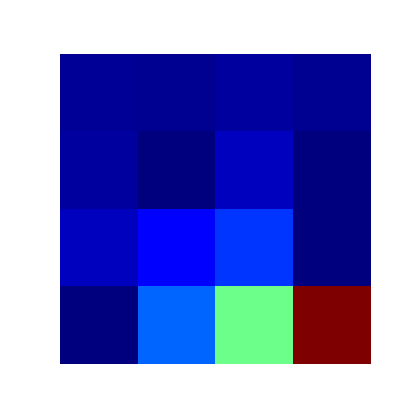
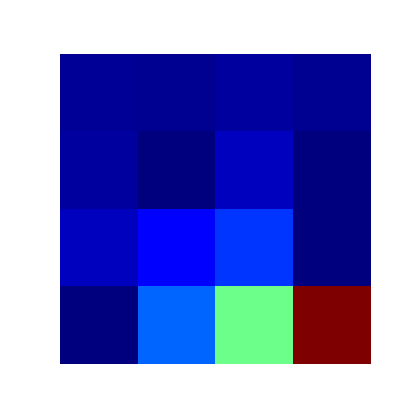
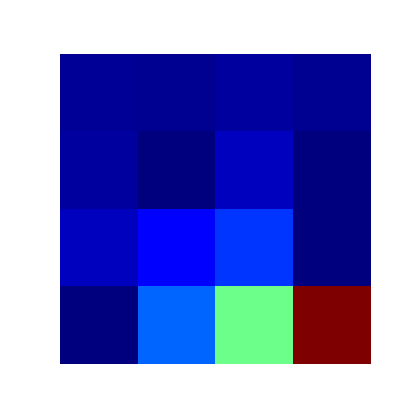
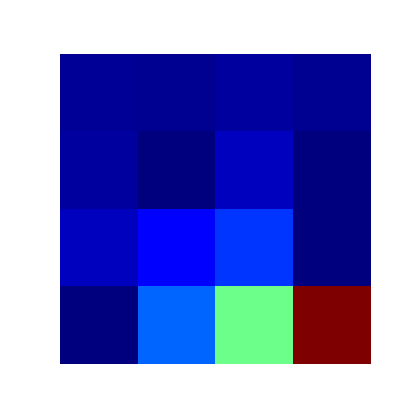
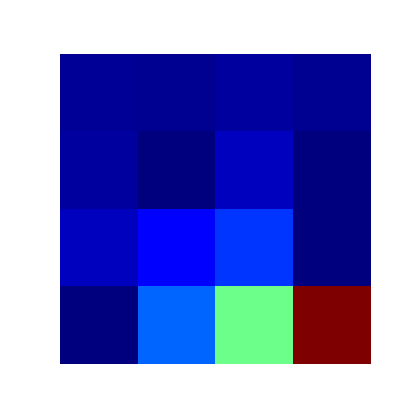
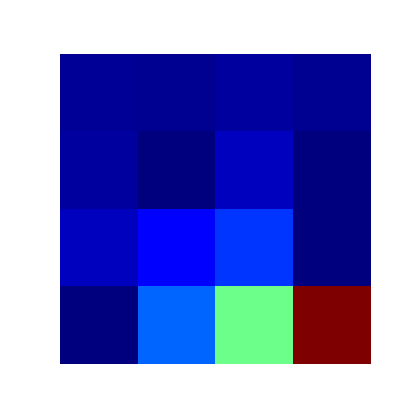
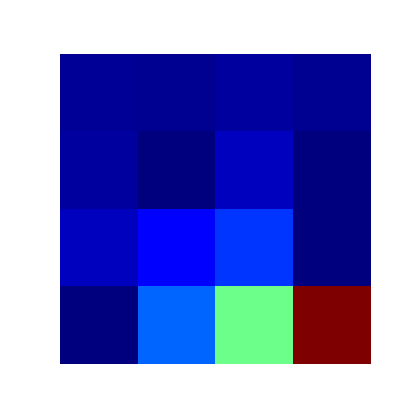
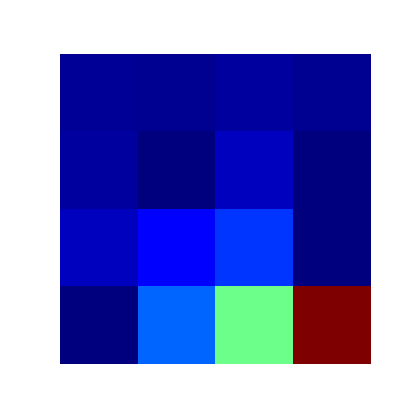
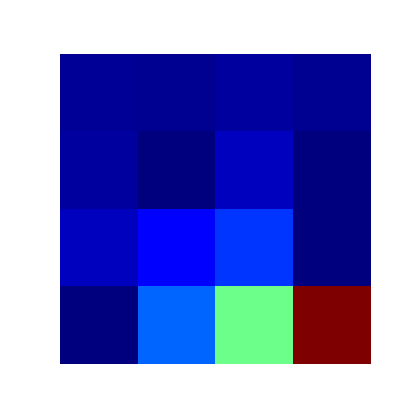
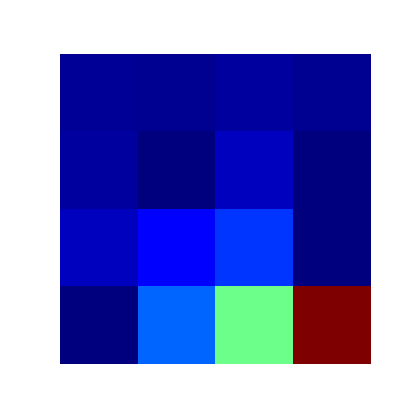
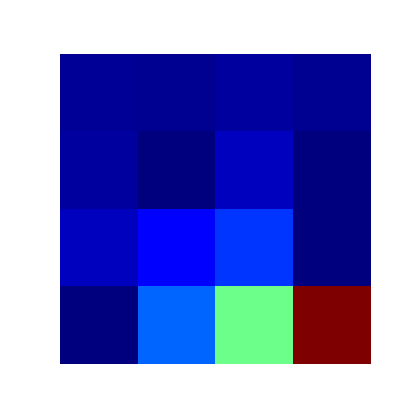
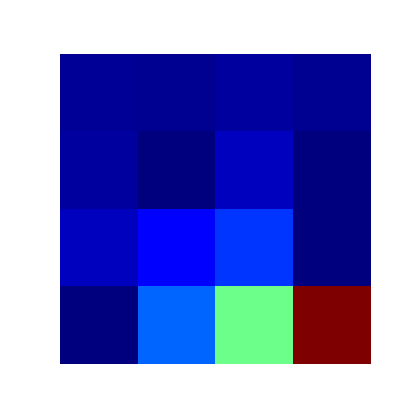
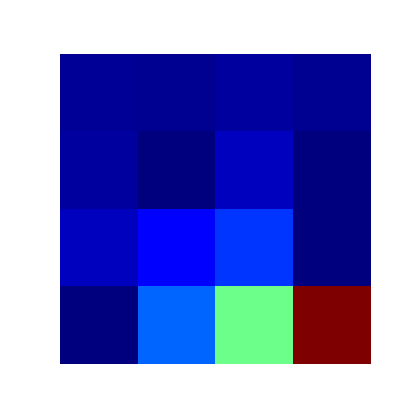
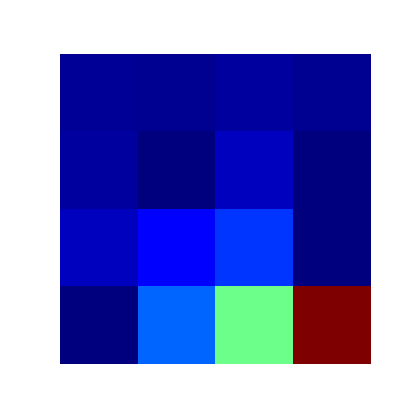
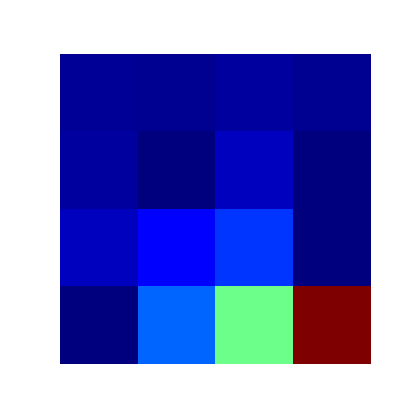
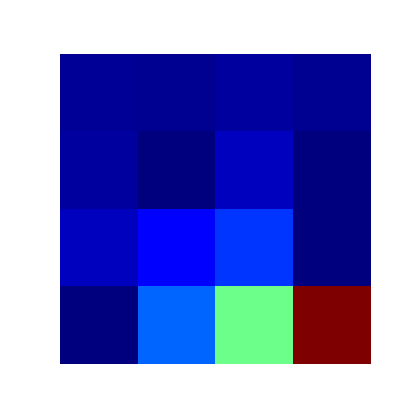
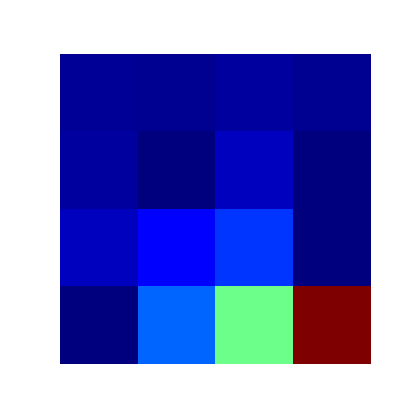
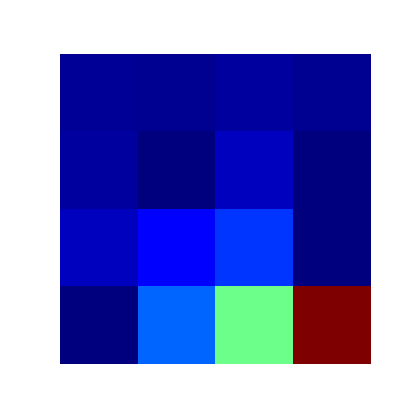
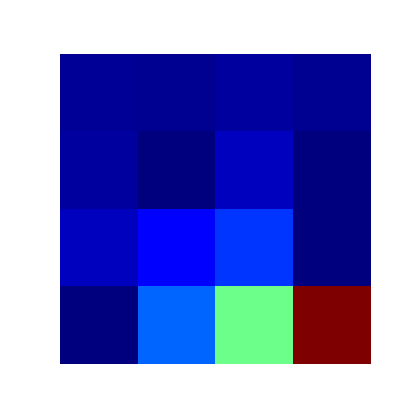
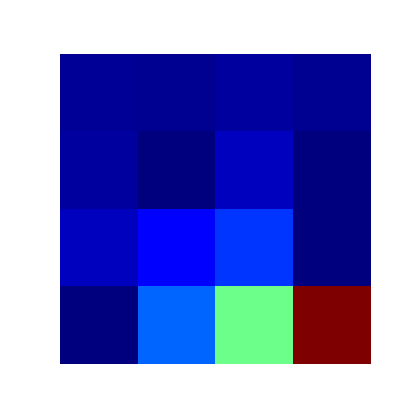
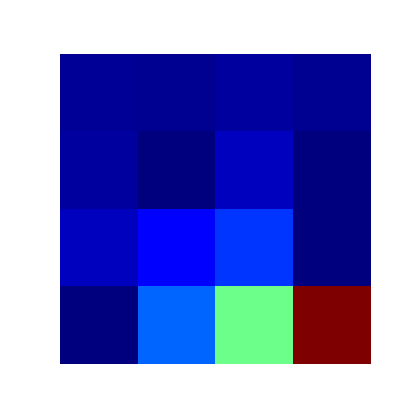
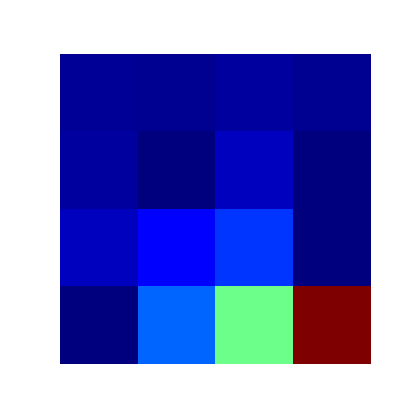
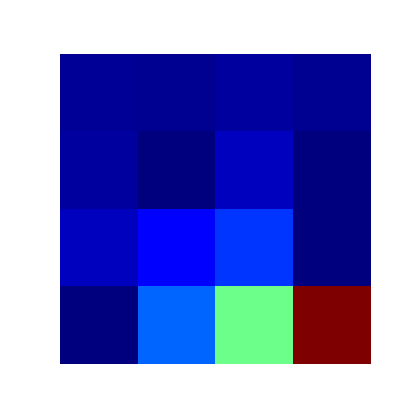
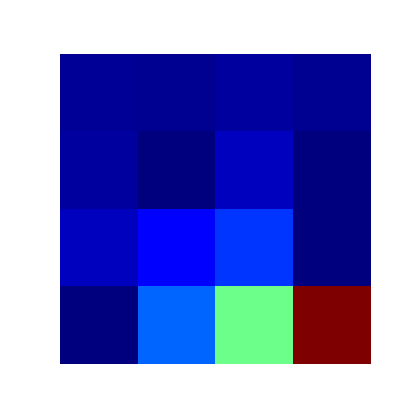
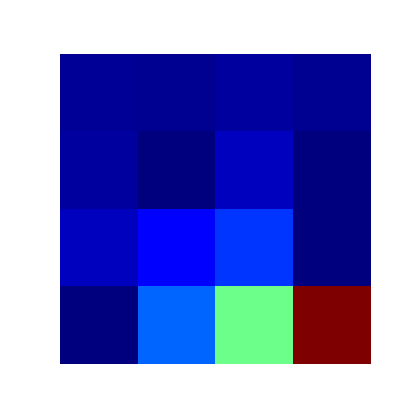
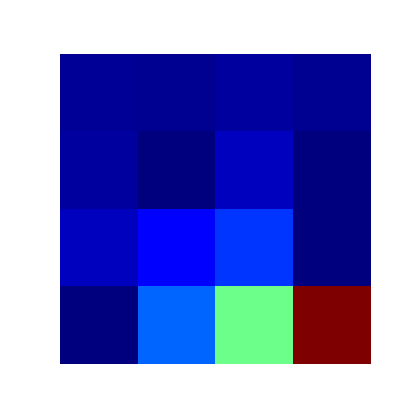
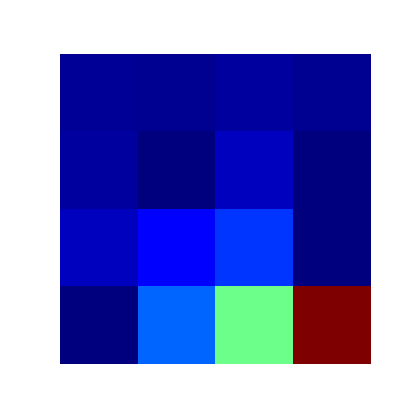
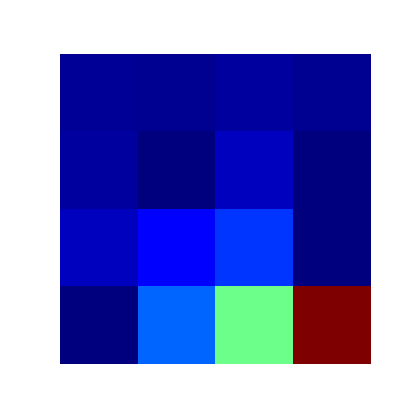
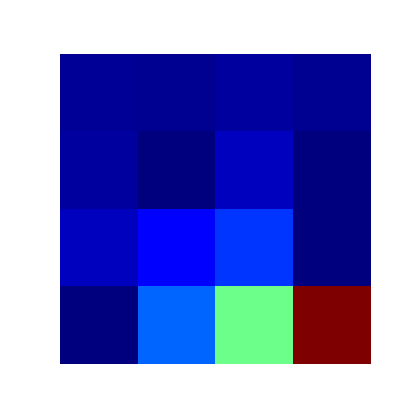
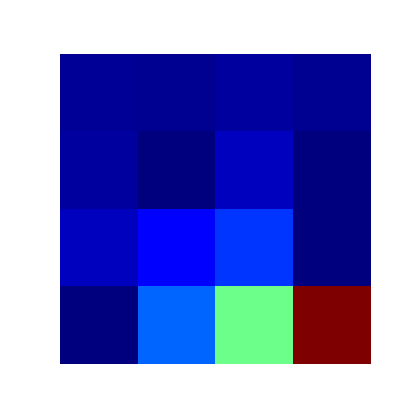
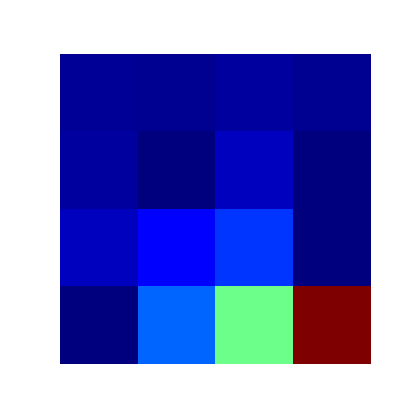
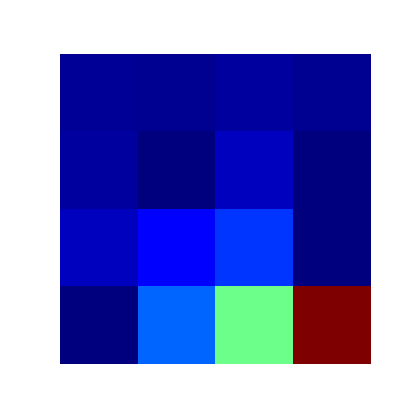
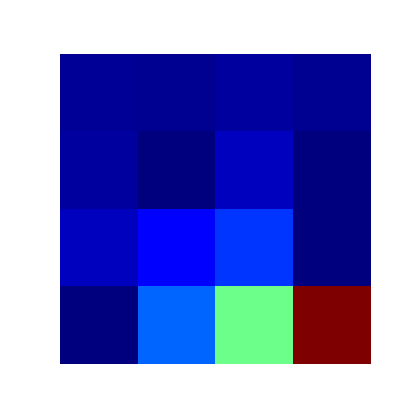
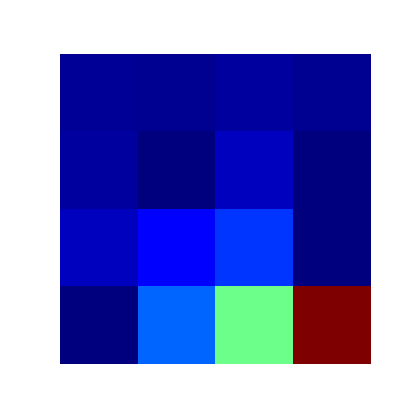
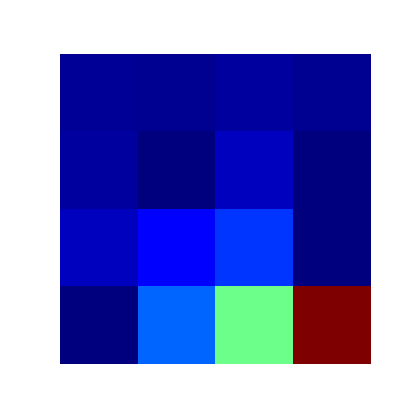
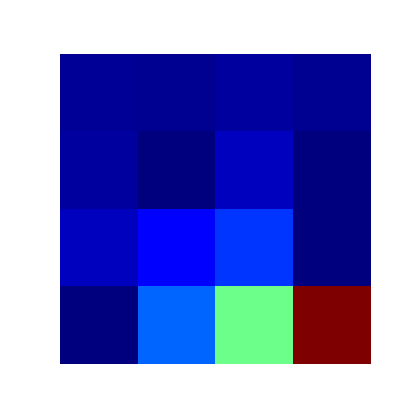
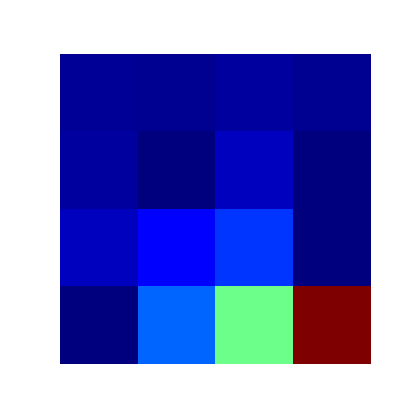
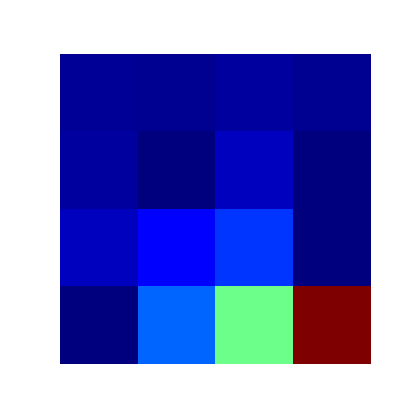
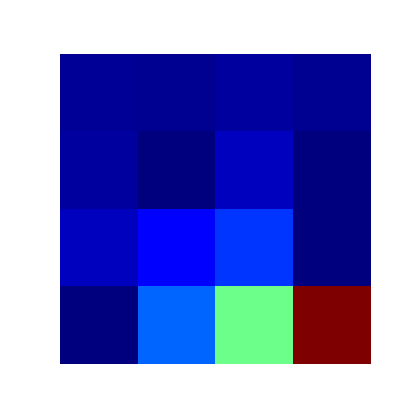
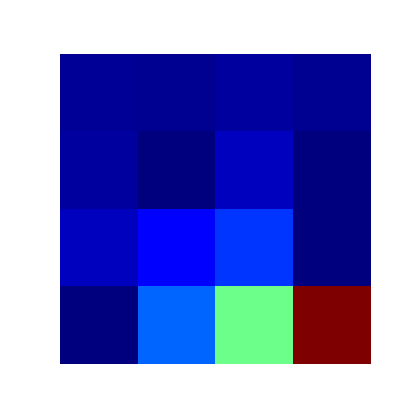


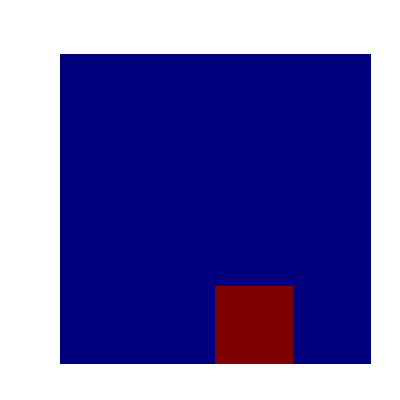
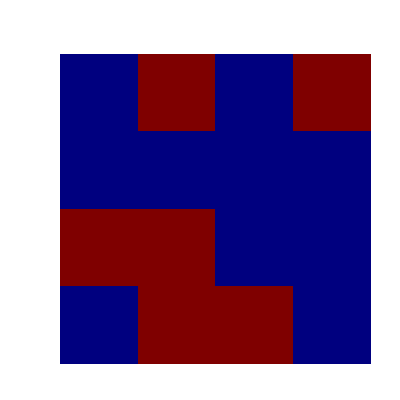
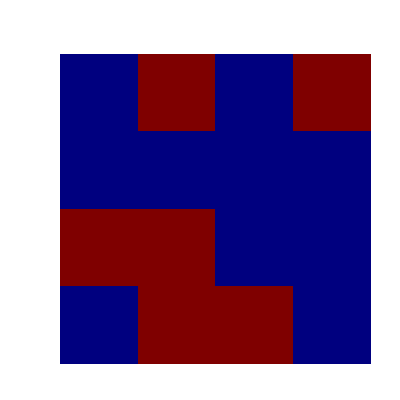
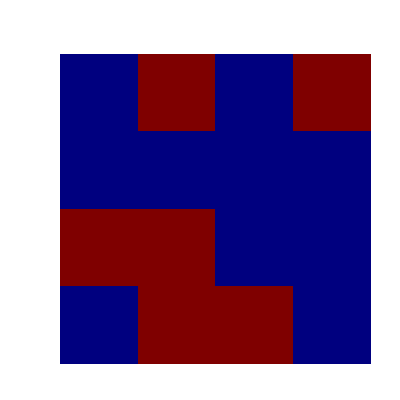
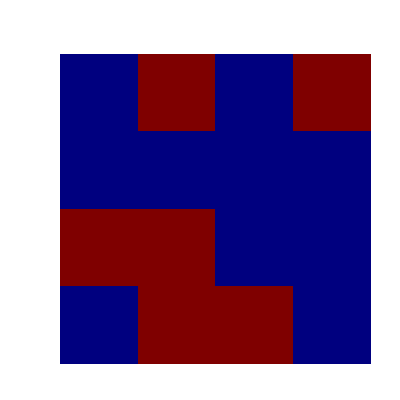
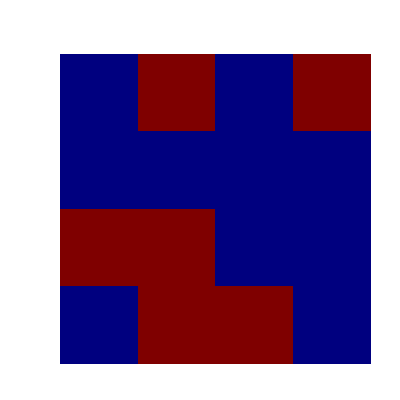
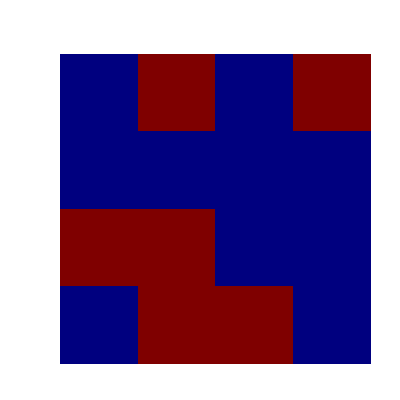
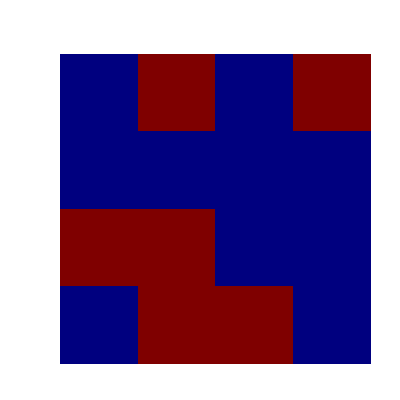
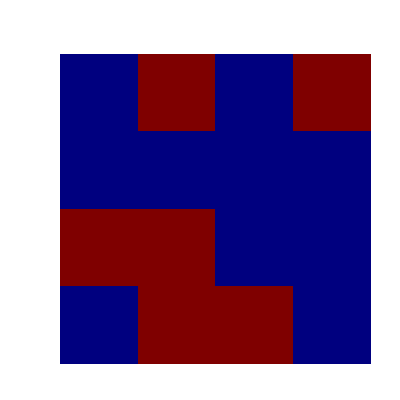
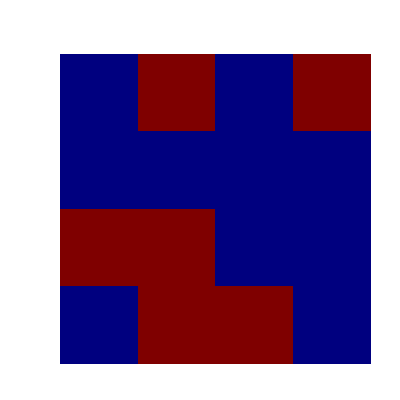
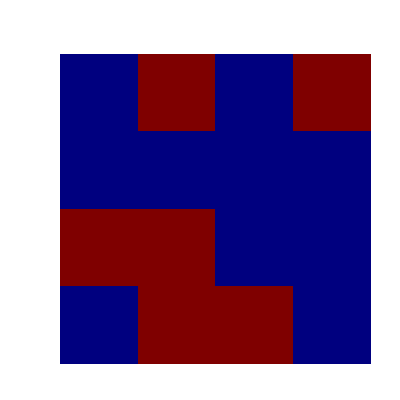
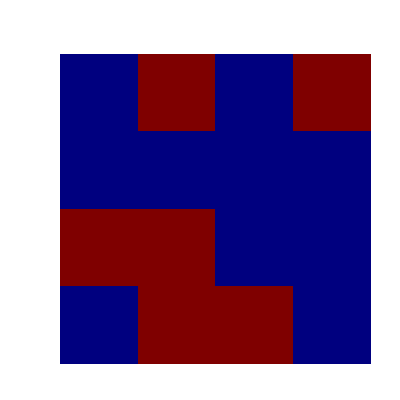
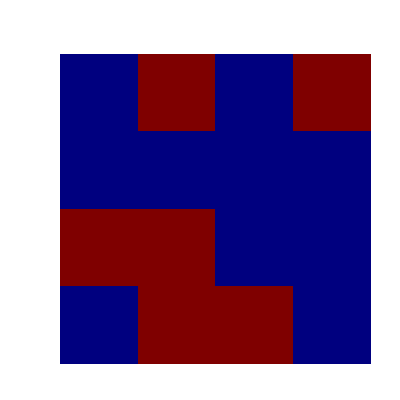
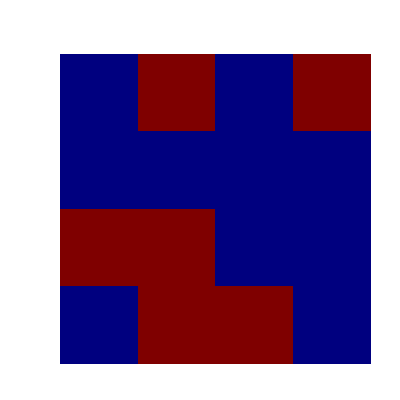
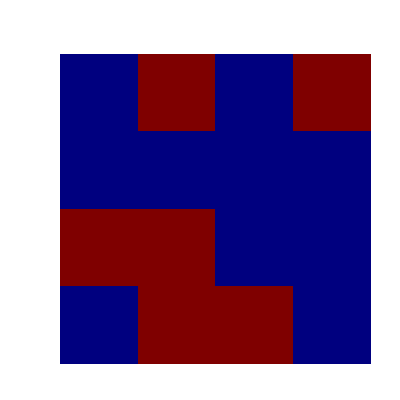
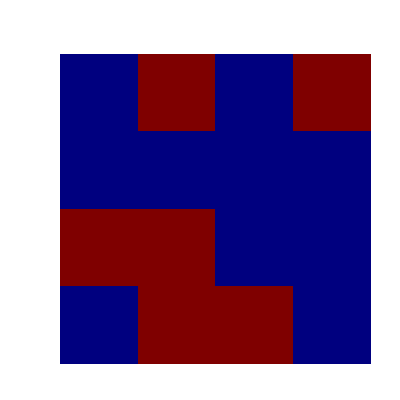
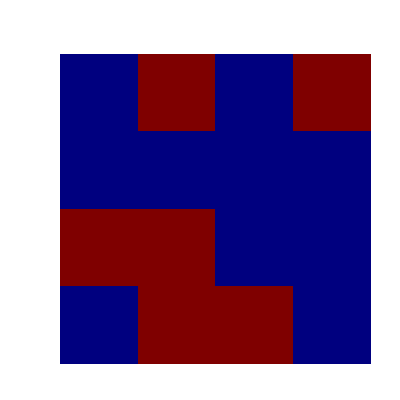
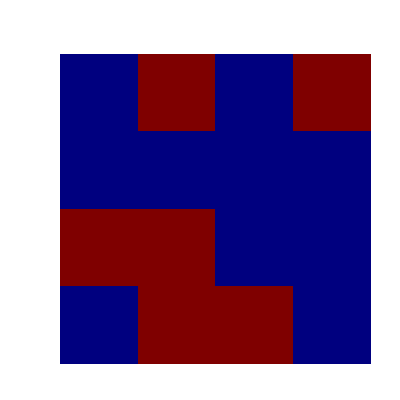
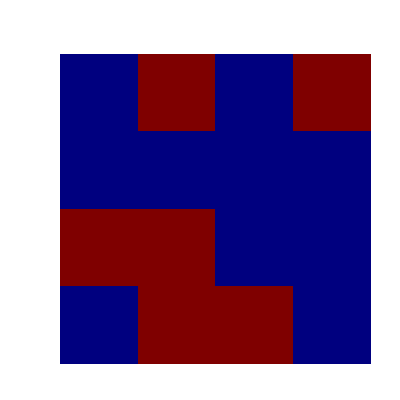
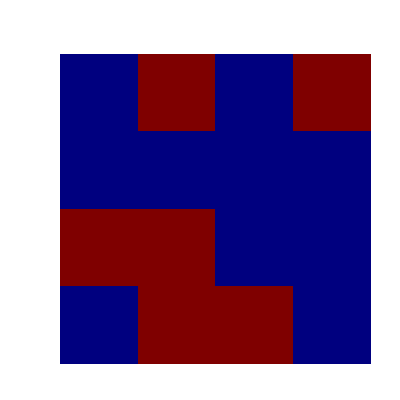
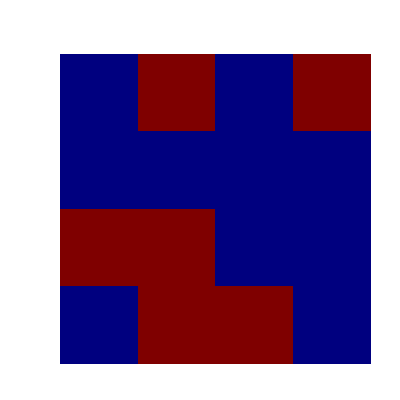
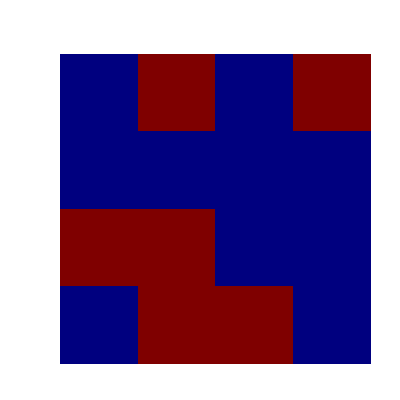
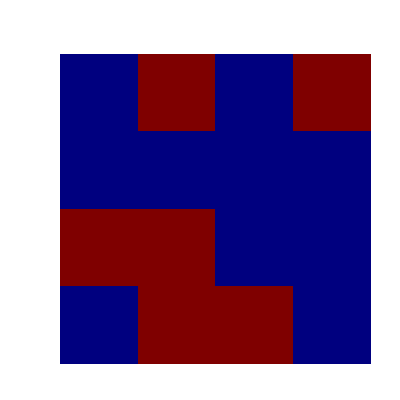
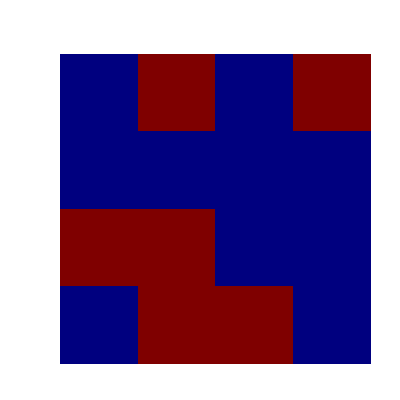
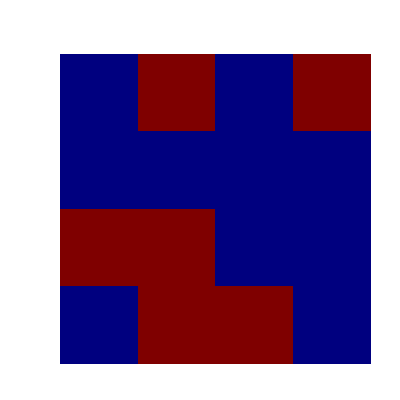
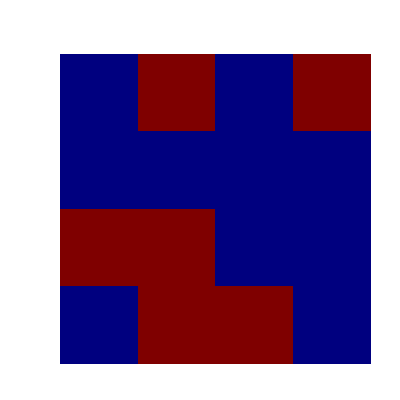
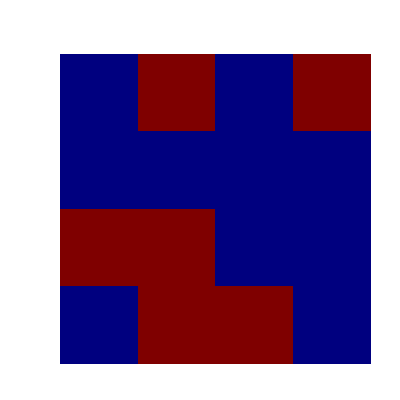
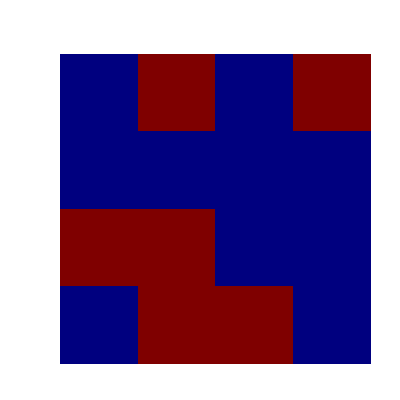
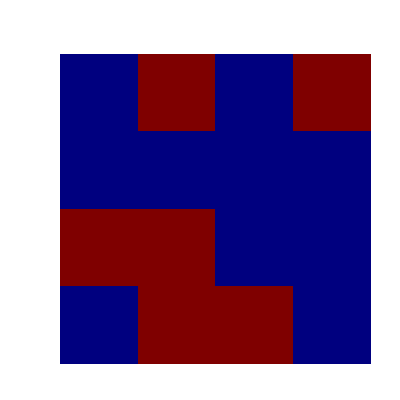
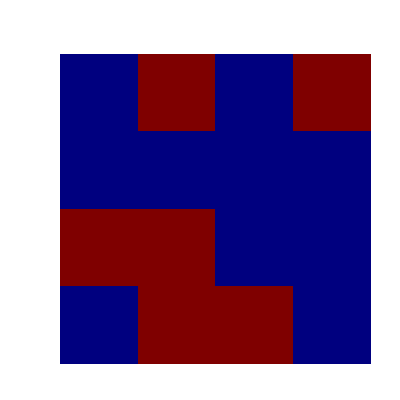
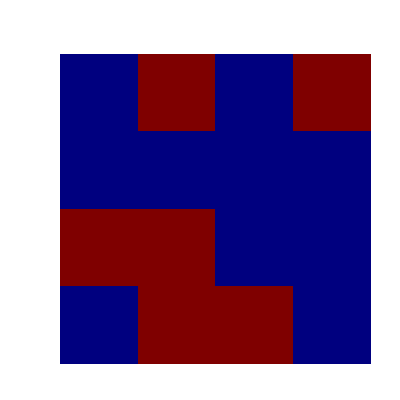
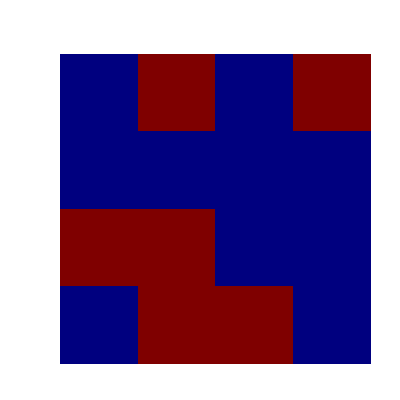
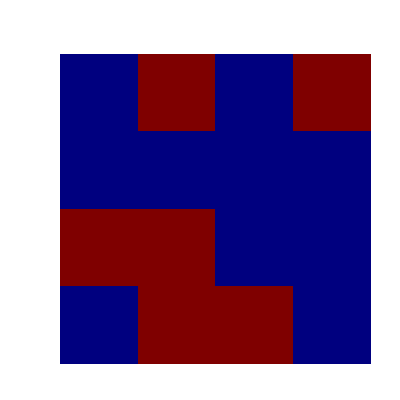
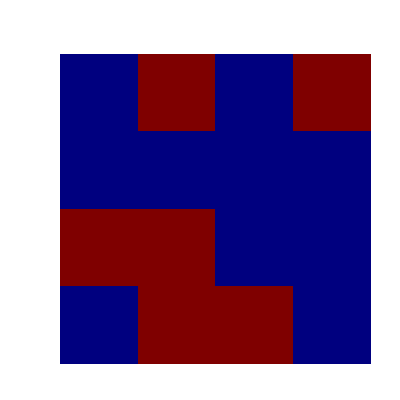
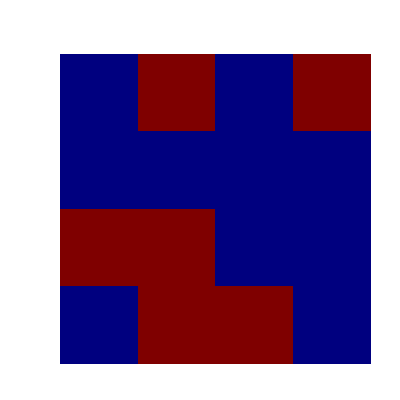
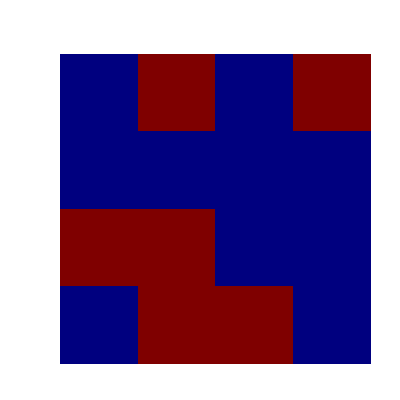
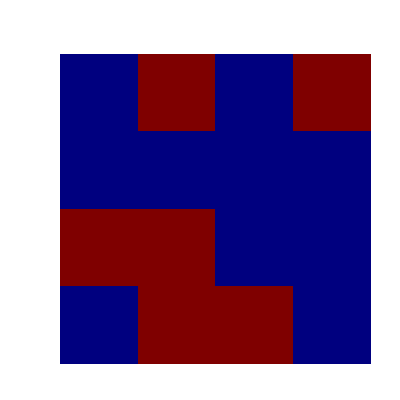
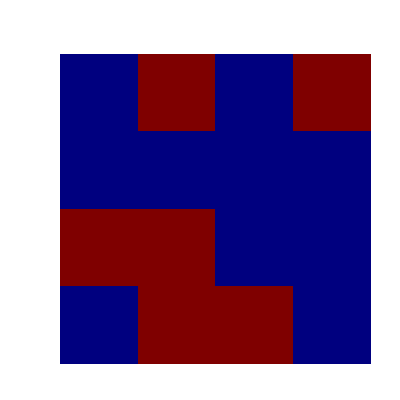
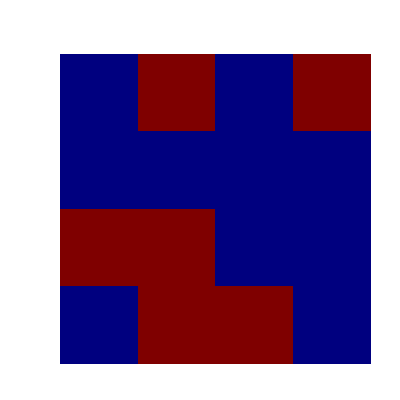
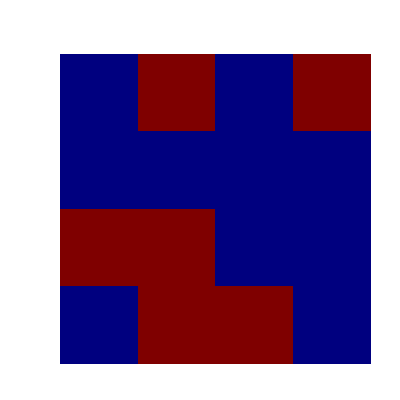
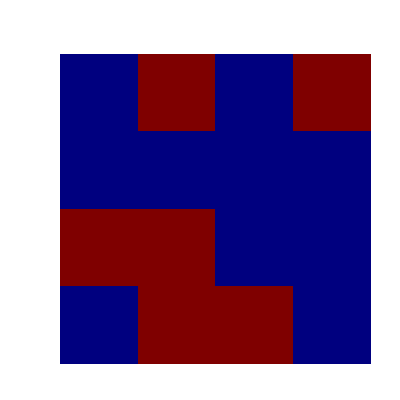
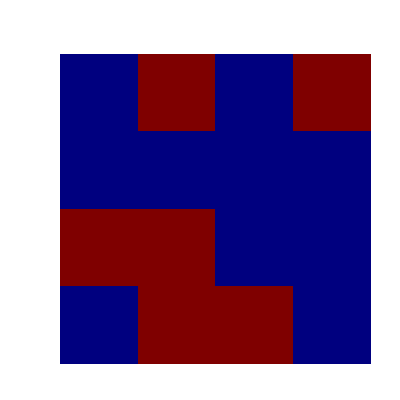
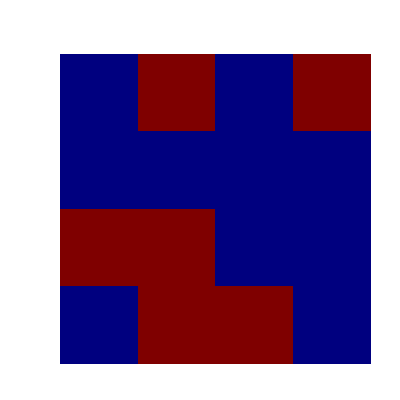
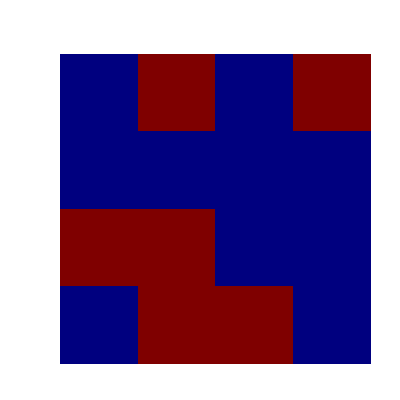
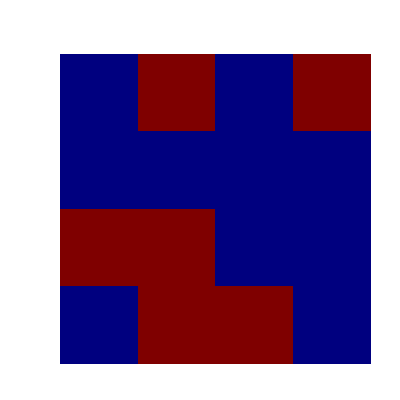
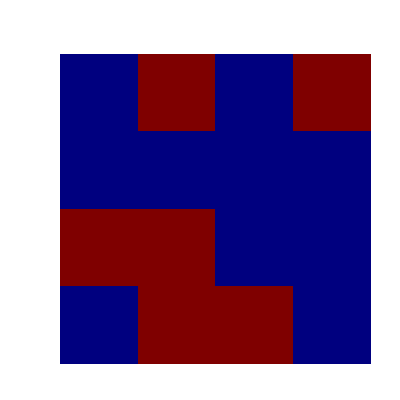
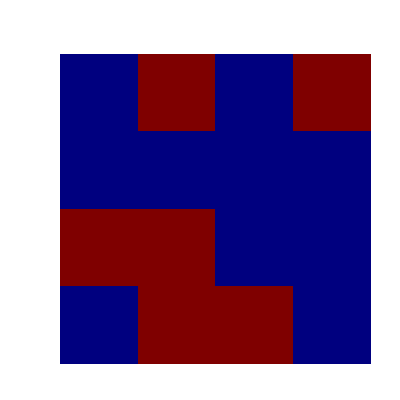
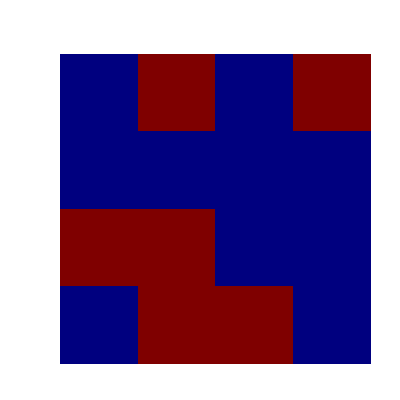
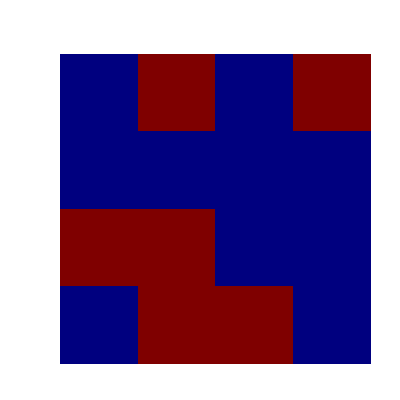
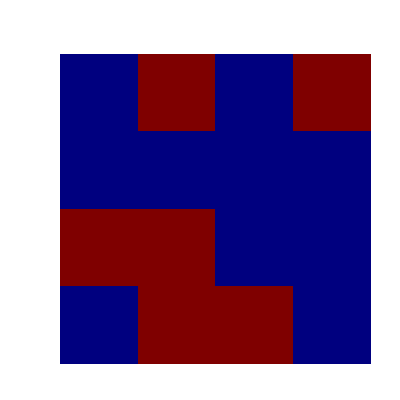
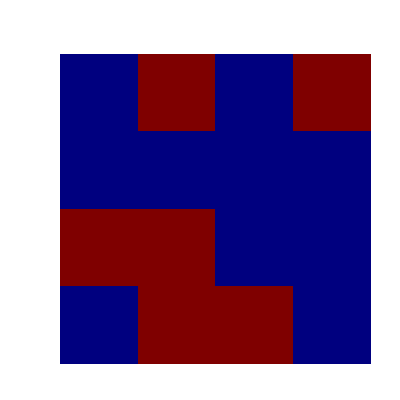
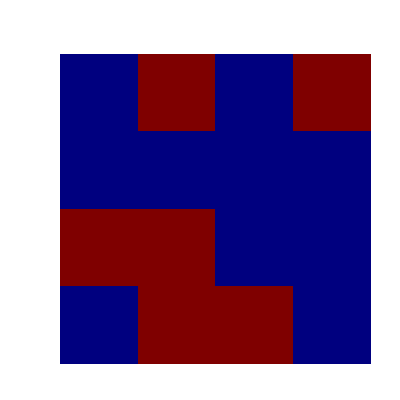
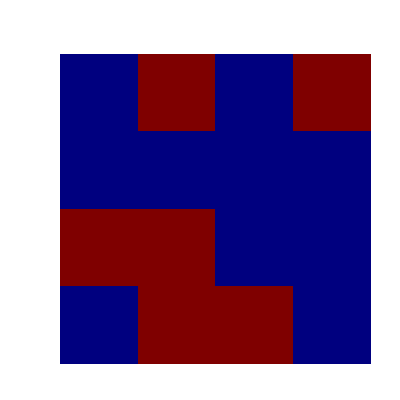
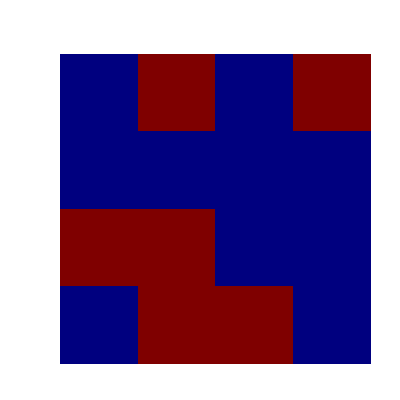
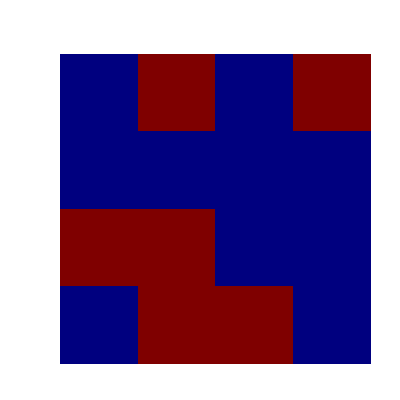
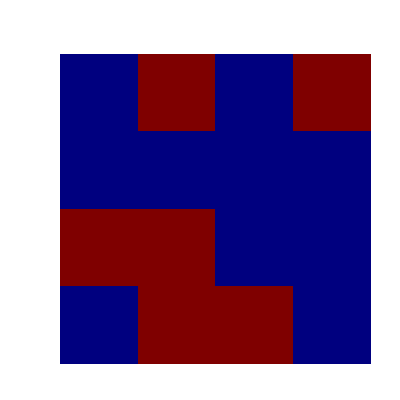
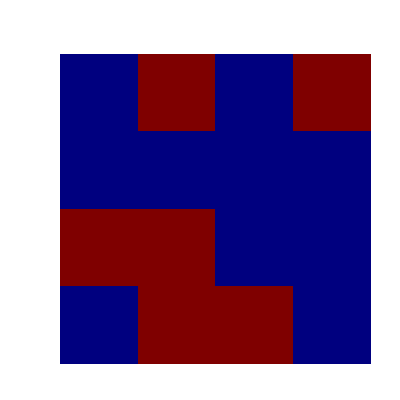
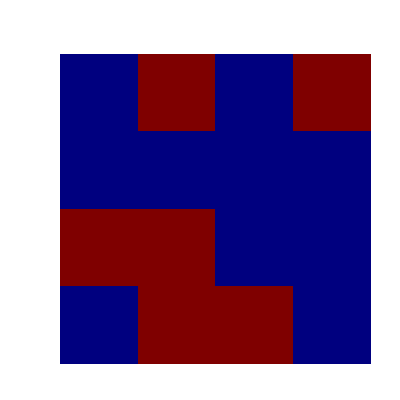
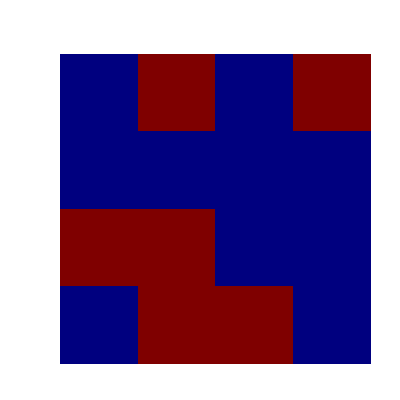
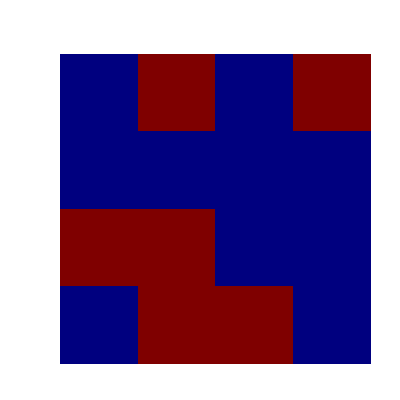
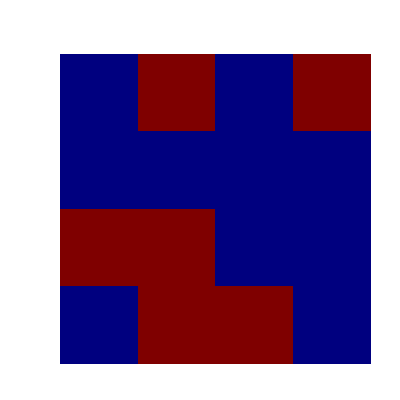
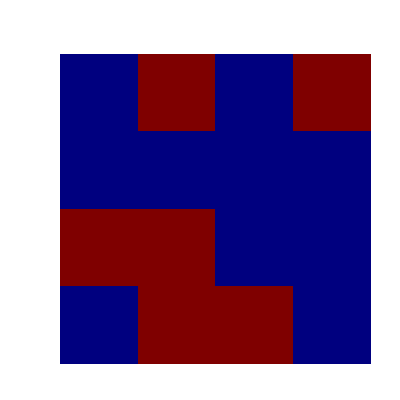
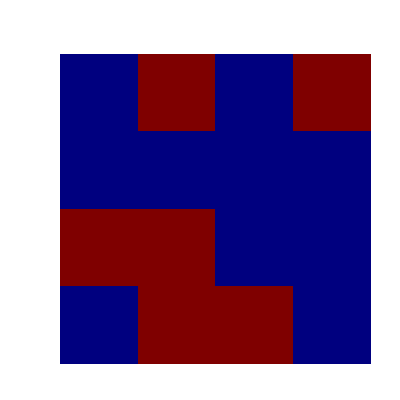
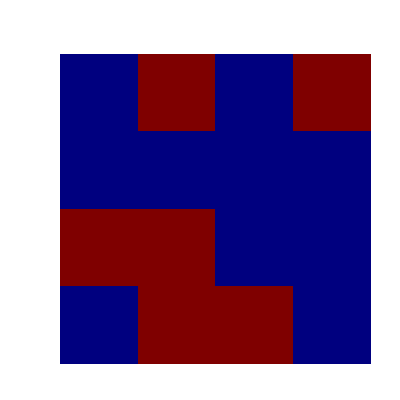
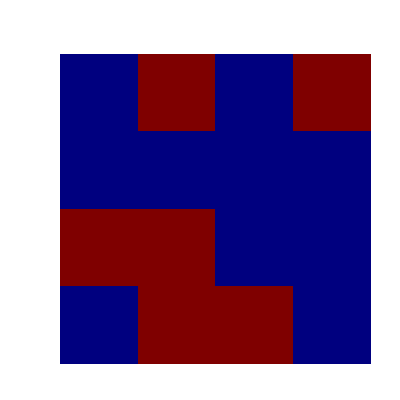
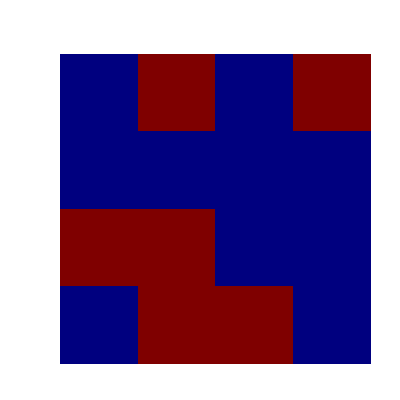
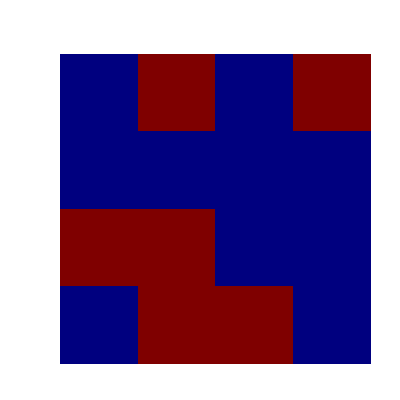
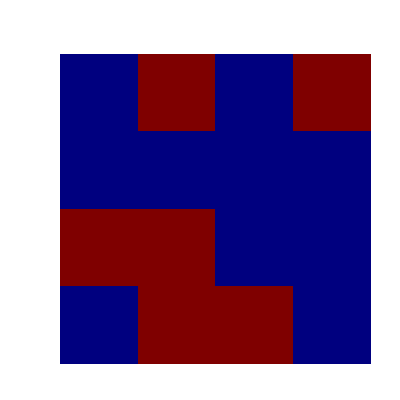
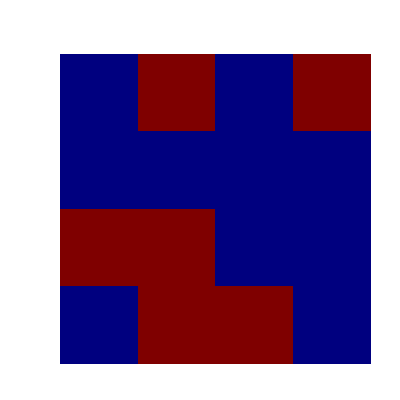
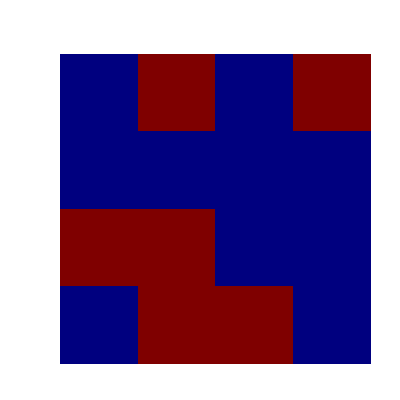
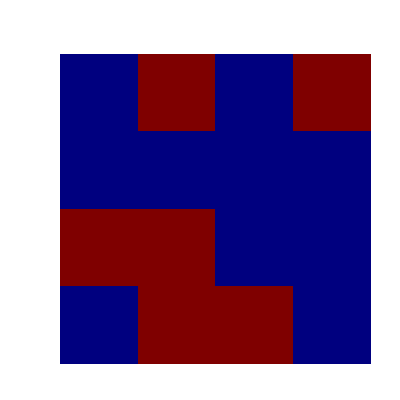
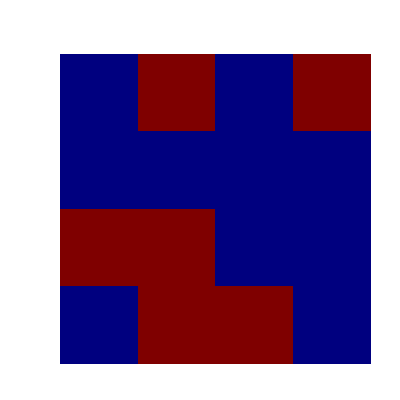
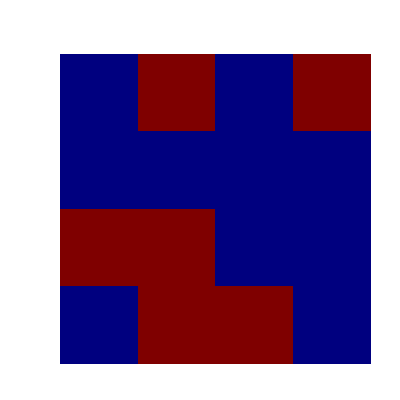
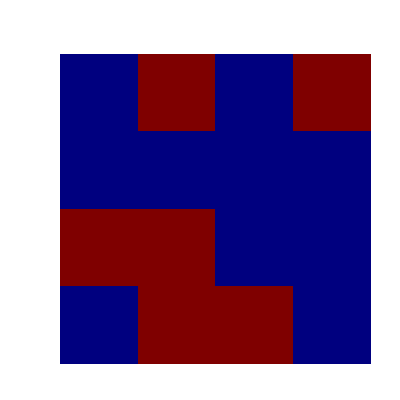
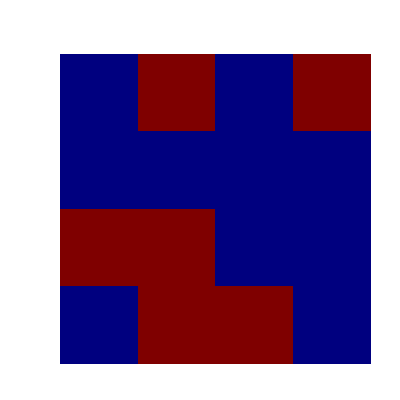
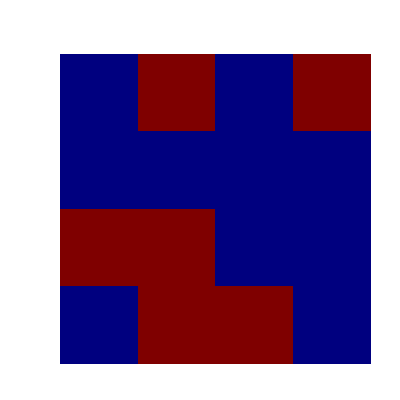
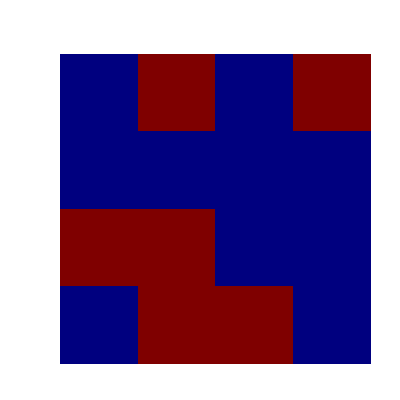
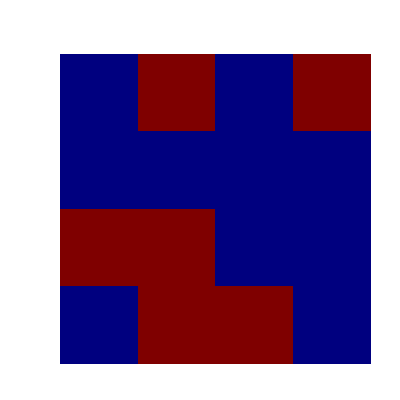
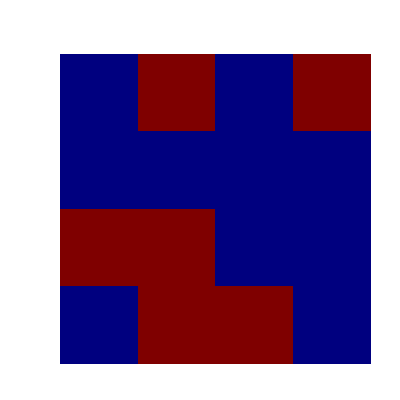
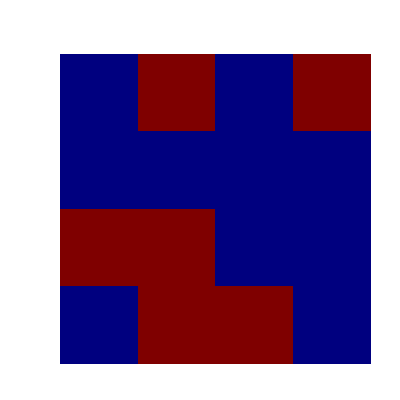
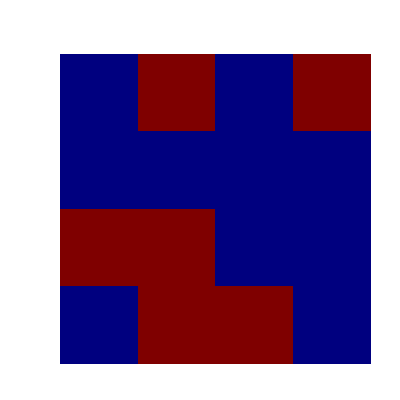
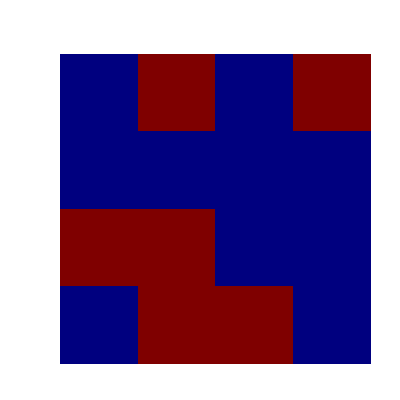
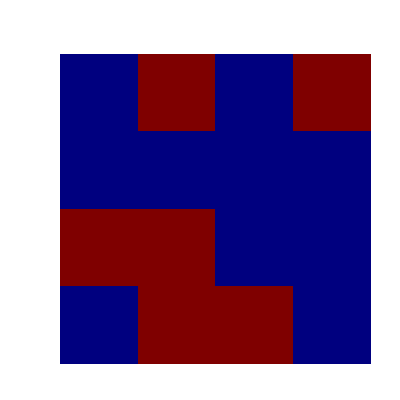

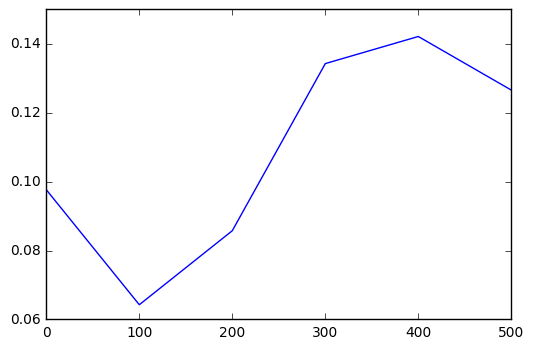

In [112]:
import value_iter_agent as agent
  

def run_episode():
  env = gym.make(ENV)
  observation = env.reset()
  env_text = env.render(mode=RENDER_MODE[ENV]).getvalue()
  frames = [render.text_to_array(env_text)]
  
  ag = agent.ValueIterAgent((4, 4), 4)
  
  action = env.action_space.sample()
  max_actions = []
  values = []
  
  smoothed_reward = utils.Ewma()
  NUM_STEPS = 10000
  episode_r = 0
  for i in range(NUM_STEPS):
    obs, reward, done, info = env.step(action)
    episode_r += reward
    action = ag.act(obs, reward, done)
    if reward or i % 1000 == 0:
      print(i, reward)
      print(ag._value)
      values.append(np.copy(ag._value))
      #print(ag._policy)
      max_actions.append(np.copy(np.argmax(ag._policy, axis=-1)))
      print(max_actions[-1])

    env_text = env.render(mode=RENDER_MODE[ENV]).getvalue()
    if i > NUM_STEPS - 200:
      frames.append(render.text_to_array(env_text))
    #print(obs, reward, info)
    if done:
      smoothed_reward.add(episode_r)
      episode_r = 0
      env.reset()
  env.render(close=True)
  
  reward_history = smoothed_reward.history()
  plt.plot(reward_history[0], reward_history[1])
  plt.figure()
  
  print(ag._env_tx[0, 2, 0])
  #if RENDER_MODE[ENV] == RENDER_RGB:
  render.display_frames_as_gif(frames)
  if max_actions:
    render.display_mat_as_gif(values)
    render.display_mat_as_gif(max_actions)
run_episode()

In [50]:
import value_iter_agent as agent

ag = agent.ValueIterAgent((4, 4), 4)
for i in range(10):
  ag.act(3, 10)
  print(ag._value)

(3, 0, 0)
(3, 1, 1)
(2, 0, 2)
(3, 0, 3)
[[  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [ 10.   0.   0.   0.]]
(3, 0, 0)
(3, 1, 1)
(2, 0, 2)
(3, 0, 3)
[[  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [ 14.5   0.    0.    0. ]]
(3, 0, 0)
(3, 1, 1)
(2, 0, 2)
(3, 0, 3)
[[  0.      0.      0.      0.   ]
 [  0.      0.      0.      0.   ]
 [  0.      0.      0.      0.   ]
 [ 16.525   0.      0.      0.   ]]
(3, 0, 0)
(3, 1, 1)
(2, 0, 2)
(3, 0, 3)
[[  0.        0.        0.        0.     ]
 [  0.        0.        0.        0.     ]
 [  0.        0.        0.        0.     ]
 [ 17.43625   0.        0.        0.     ]]
(3, 0, 0)
(3, 1, 1)
(2, 0, 2)
(3, 0, 3)
[[  0.          0.          0.          0.       ]
 [  0.          0.          0.          0.       ]
 [  0.          0.          0.          0.       ]
 [ 17.8463125   0.          0.          0.       ]]
(3, 0, 0)
(3, 1, 1)
(2, 0, 2)
(3, 0, 3)
[[  0.           0.           0.       